# Data Cleaning and Visualization Overview
In the initial phase of our mini project, we focused on refining the dataset through meticulous data cleaning and visualization techniques. Our objective was to enhance the quality and coherence of the data, making it more suitable for subsequent analysis. This section encapsulates our methodology and key steps in achieving a refined dataset.

## Data Cleaning
Our data cleaning process comprised handling missing values, encoding categorical features, and ensuring data integrity. Notably, we employed strategic approaches to replace null values, fostering a more complete and robust dataset. Categorical features were encoded to numerical values, facilitating machine learning model compatibility.

## Visualization
Visualization played a pivotal role in understanding the characteristics of the data and identifying patterns. Through well-crafted plots and graphs, we delved into the distribution of features, relationships between variables, and the impact of categorical features on our target variable.

## Key Steps:
1. **Handling Class Imbalance:** Class imbalance is handled using oversampling of minority class.
1. **Handling Null Values:** Robust techniques were employed to replace missing values, ensuring data completeness and reliability.
2. **Categorical Feature Encoding:** Transformation of categorical features into numerical representations for seamless integration into machine learning models.
3. **Strategic Plotting:** Visualization techniques such as histograms, scatter plots, and bar graphs were leveraged to gain insights into the distribution and relationships within the dataset.
<hr>

In [69]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading the Dataset ####

In [70]:
df = pd.read_csv("weatherAUS.csv")
original_df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [71]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

The dataset contains a total of 23 distinct features and 145,460 observations.
<hr>

#### Looking at various types of features that may be present in the given dataset ####

In [72]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


`numerical_feature`, which contains the column names of the DataFrame df where the data type is not 'O' (i.e., not an object or a string). This list includes features that are numeric in nature, such as integers or floats. There are total of 16 `numerical_feature`.

`discrete_feature` is created, which includes the features from `numerical_feature` but only those where the number of unique values is less than 25. This suggests that these features are likely to be discrete rather than continuous, as they have a relatively small number of distinct values. There are total of 2 `discrete_feature`.

`continuous_feature` list is created by taking the elements from `numerical_feature` that are not present in the discrete_feature list. These are the numerical features that are not considered discrete, implying they may have a larger range of values and are likely continuous. There are total of 14 `continuous_feature`.

`categorical_feature` list is created by taking the columns from the DataFrame df that are not in the `numerical_feature` list. These are likely features with non-numeric data types (e.g., strings or objects), suggesting they are categorical in nature. There are total of 7 `categorical_feature`.
<hr>

### Data imbalance

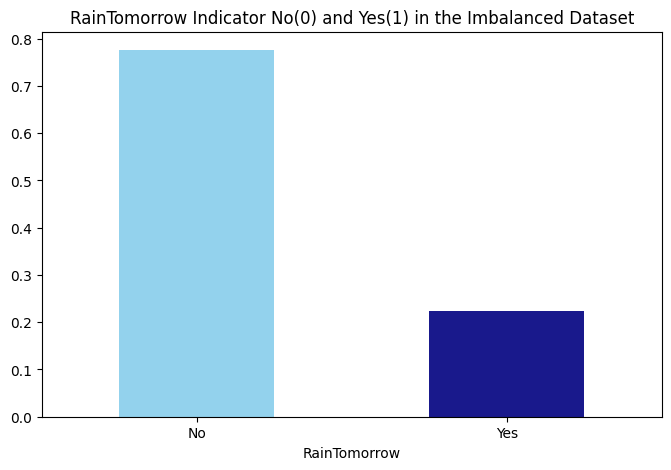

In [73]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that presence of "0" and "1" are almost in the ratio 78:22. So there is a class imbalance and we have to handle it. For tackling class imbalance, we will use **oversampling of minority class** here. Since the size of the data set is quite small, undersampling of majority class would not make much sense here. 

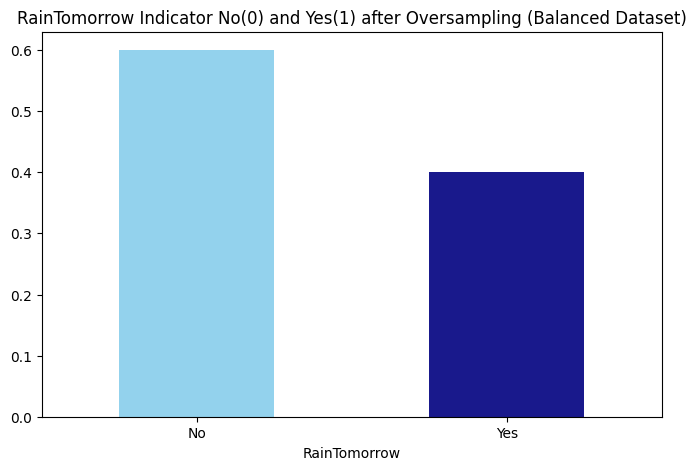

In [74]:
from sklearn.utils import resample

no = df[df.RainTomorrow == "No"]
yes = df[df.RainTomorrow == "Yes"]
yes_oversampled = resample(yes, replace=True, n_samples=int(2*len(no)/3), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<hr>

### Examining the percentage of null values and handling it ###

In [75]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date              0.000000
Location          0.000000
MinTemp           0.484608
MaxTemp           0.213206
Rainfall          1.278690
Evaporation      43.127380
Sunshine         47.578592
WindGustDir       6.846514
WindGustSpeed     6.789405
WindDir9am        6.860111
WindDir3pm        2.837485
WindSpeed9am      1.006200
WindSpeed3pm      1.933536
Humidity9am       1.376047
Humidity3pm       2.640052
Pressure9am       9.868378
Pressure3pm       9.862939
Cloud9am         37.202763
Cloud3pm         39.317415
Temp9am           0.719025
Temp3pm           1.995540
RainToday         1.278690
RainTomorrow      0.000000
dtype: float64

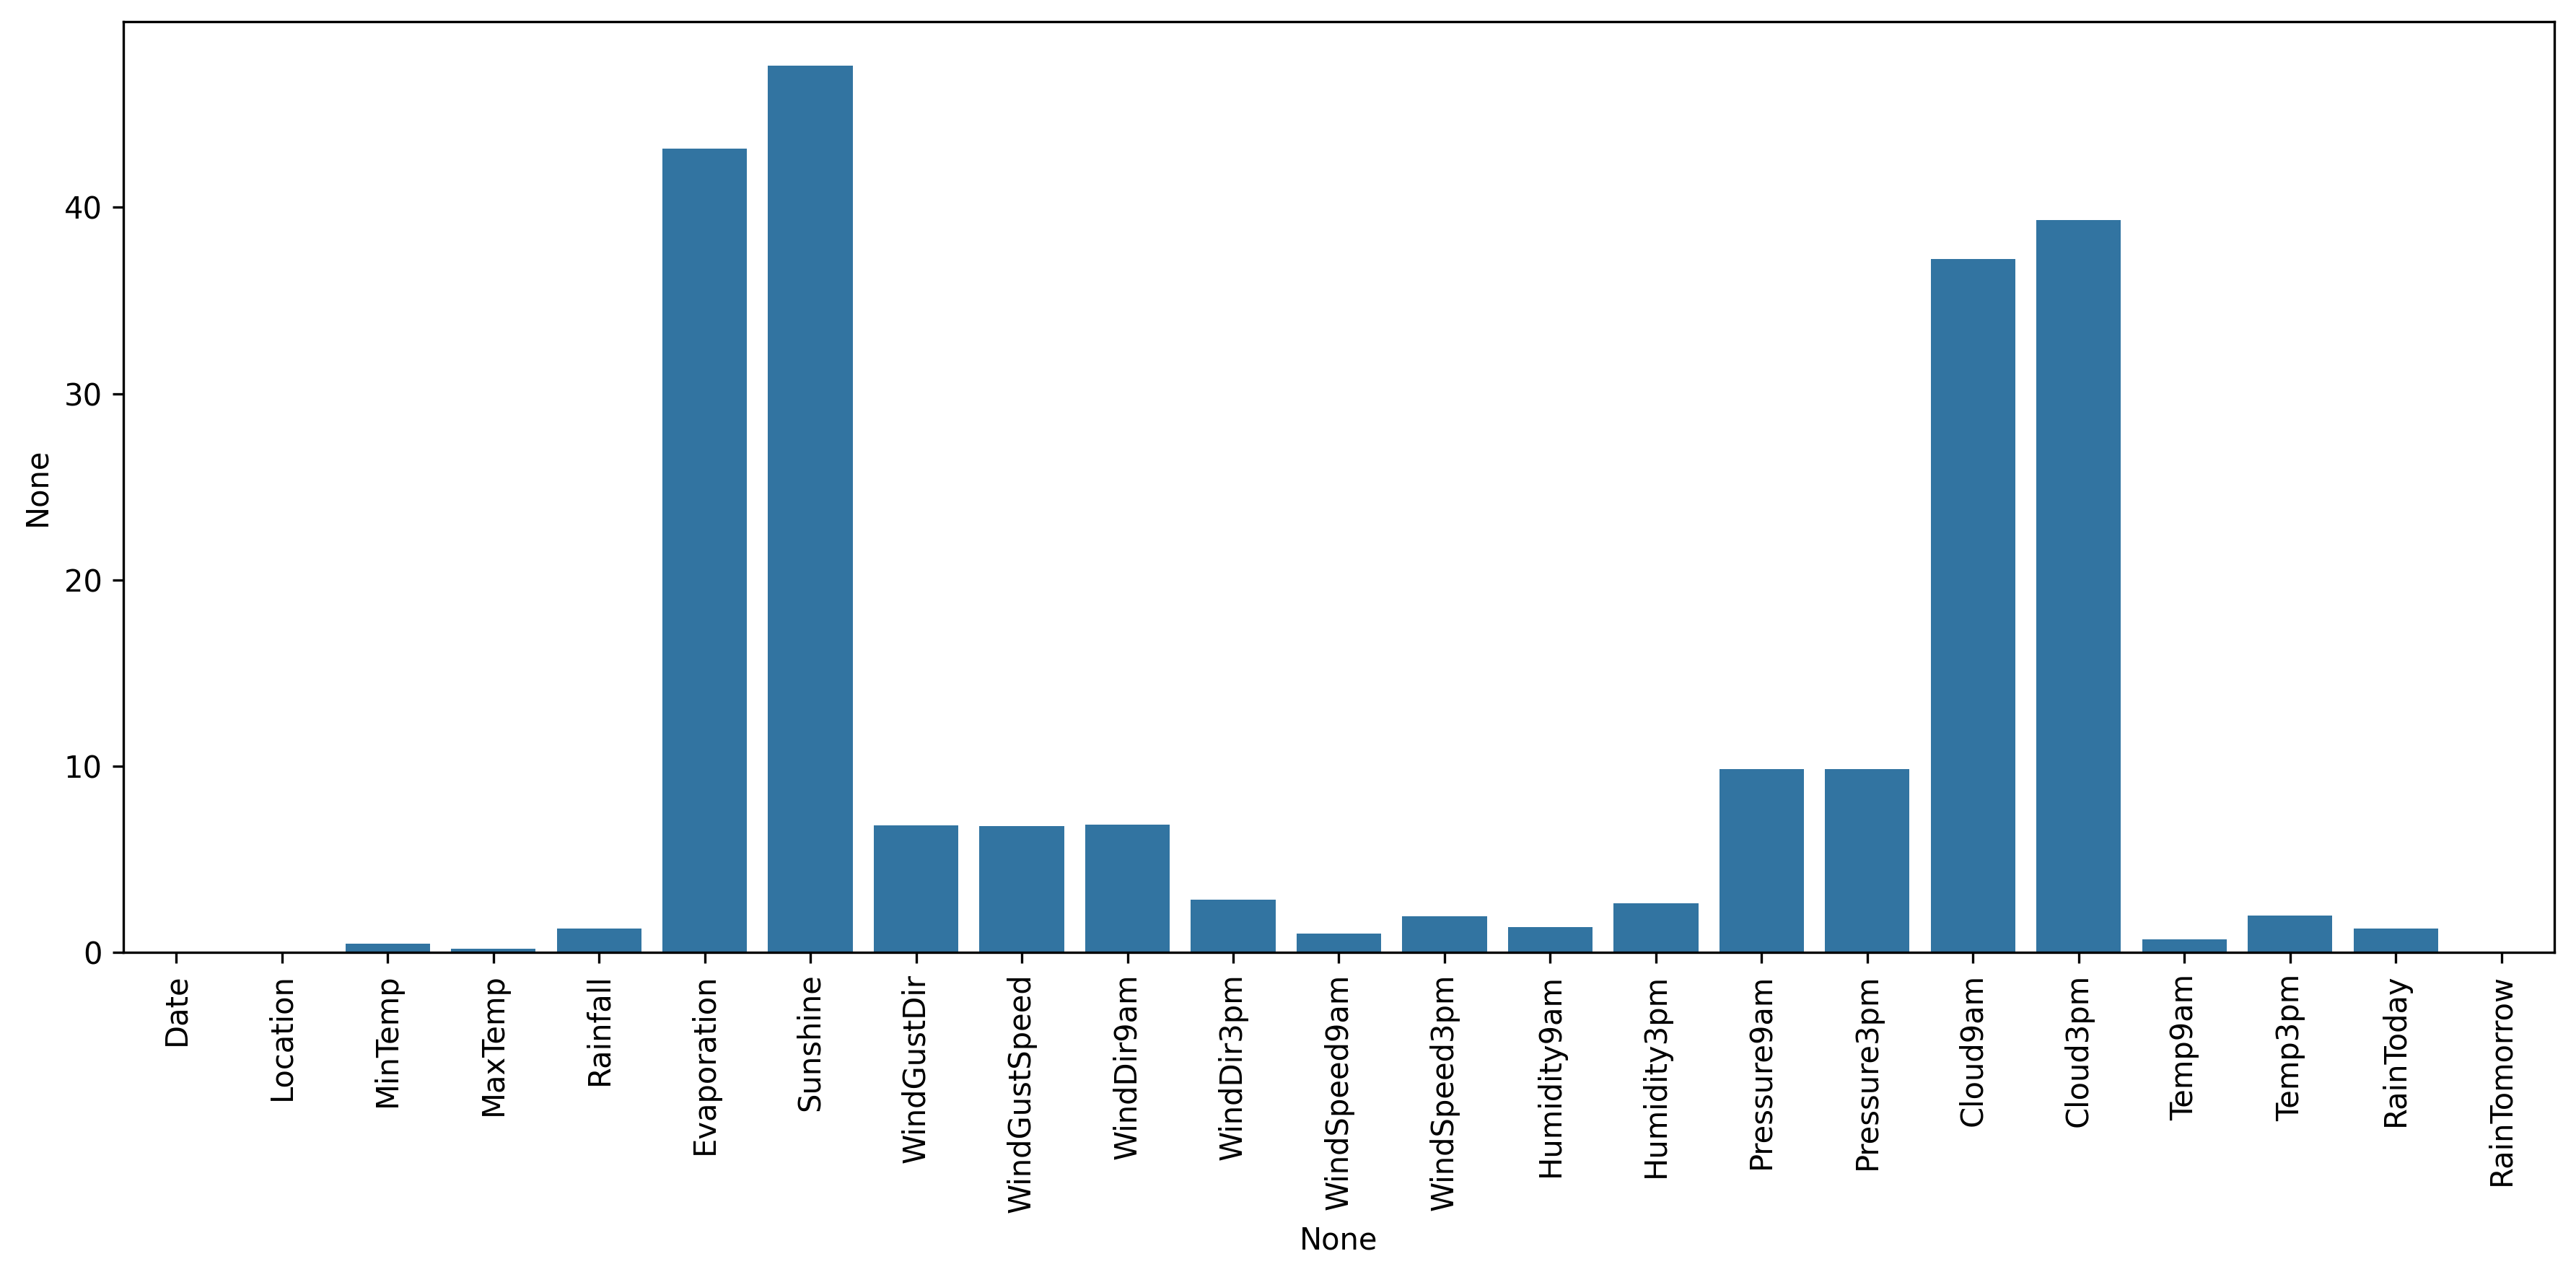

In [76]:
# Create a barplot for the column vs percentage of null values 
plt.figure(figsize=(12, 6), dpi=300)  # Adjust the figure size
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center') # to rotate the labels of x axis for better view
plt.tight_layout()

Creating a function to handle null values

In [77]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [78]:
# Let's look at the numerical_features
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Handling null values for the features that has approximately more than 40% of null values 
<br>
We have chosen to randomly fill these features

In [79]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")


In [80]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.484608
MaxTemp          0.213206
Rainfall         1.278690
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.846514
WindGustSpeed    6.789405
WindDir9am       6.860111
WindDir3pm       2.837485
WindSpeed9am     1.006200
WindSpeed3pm     1.933536
Humidity9am      1.376047
Humidity3pm      2.640052
Pressure9am      9.868378
Pressure3pm      9.862939
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.719025
Temp3pm          1.995540
RainToday        1.278690
RainTomorrow     0.000000
dtype: float64

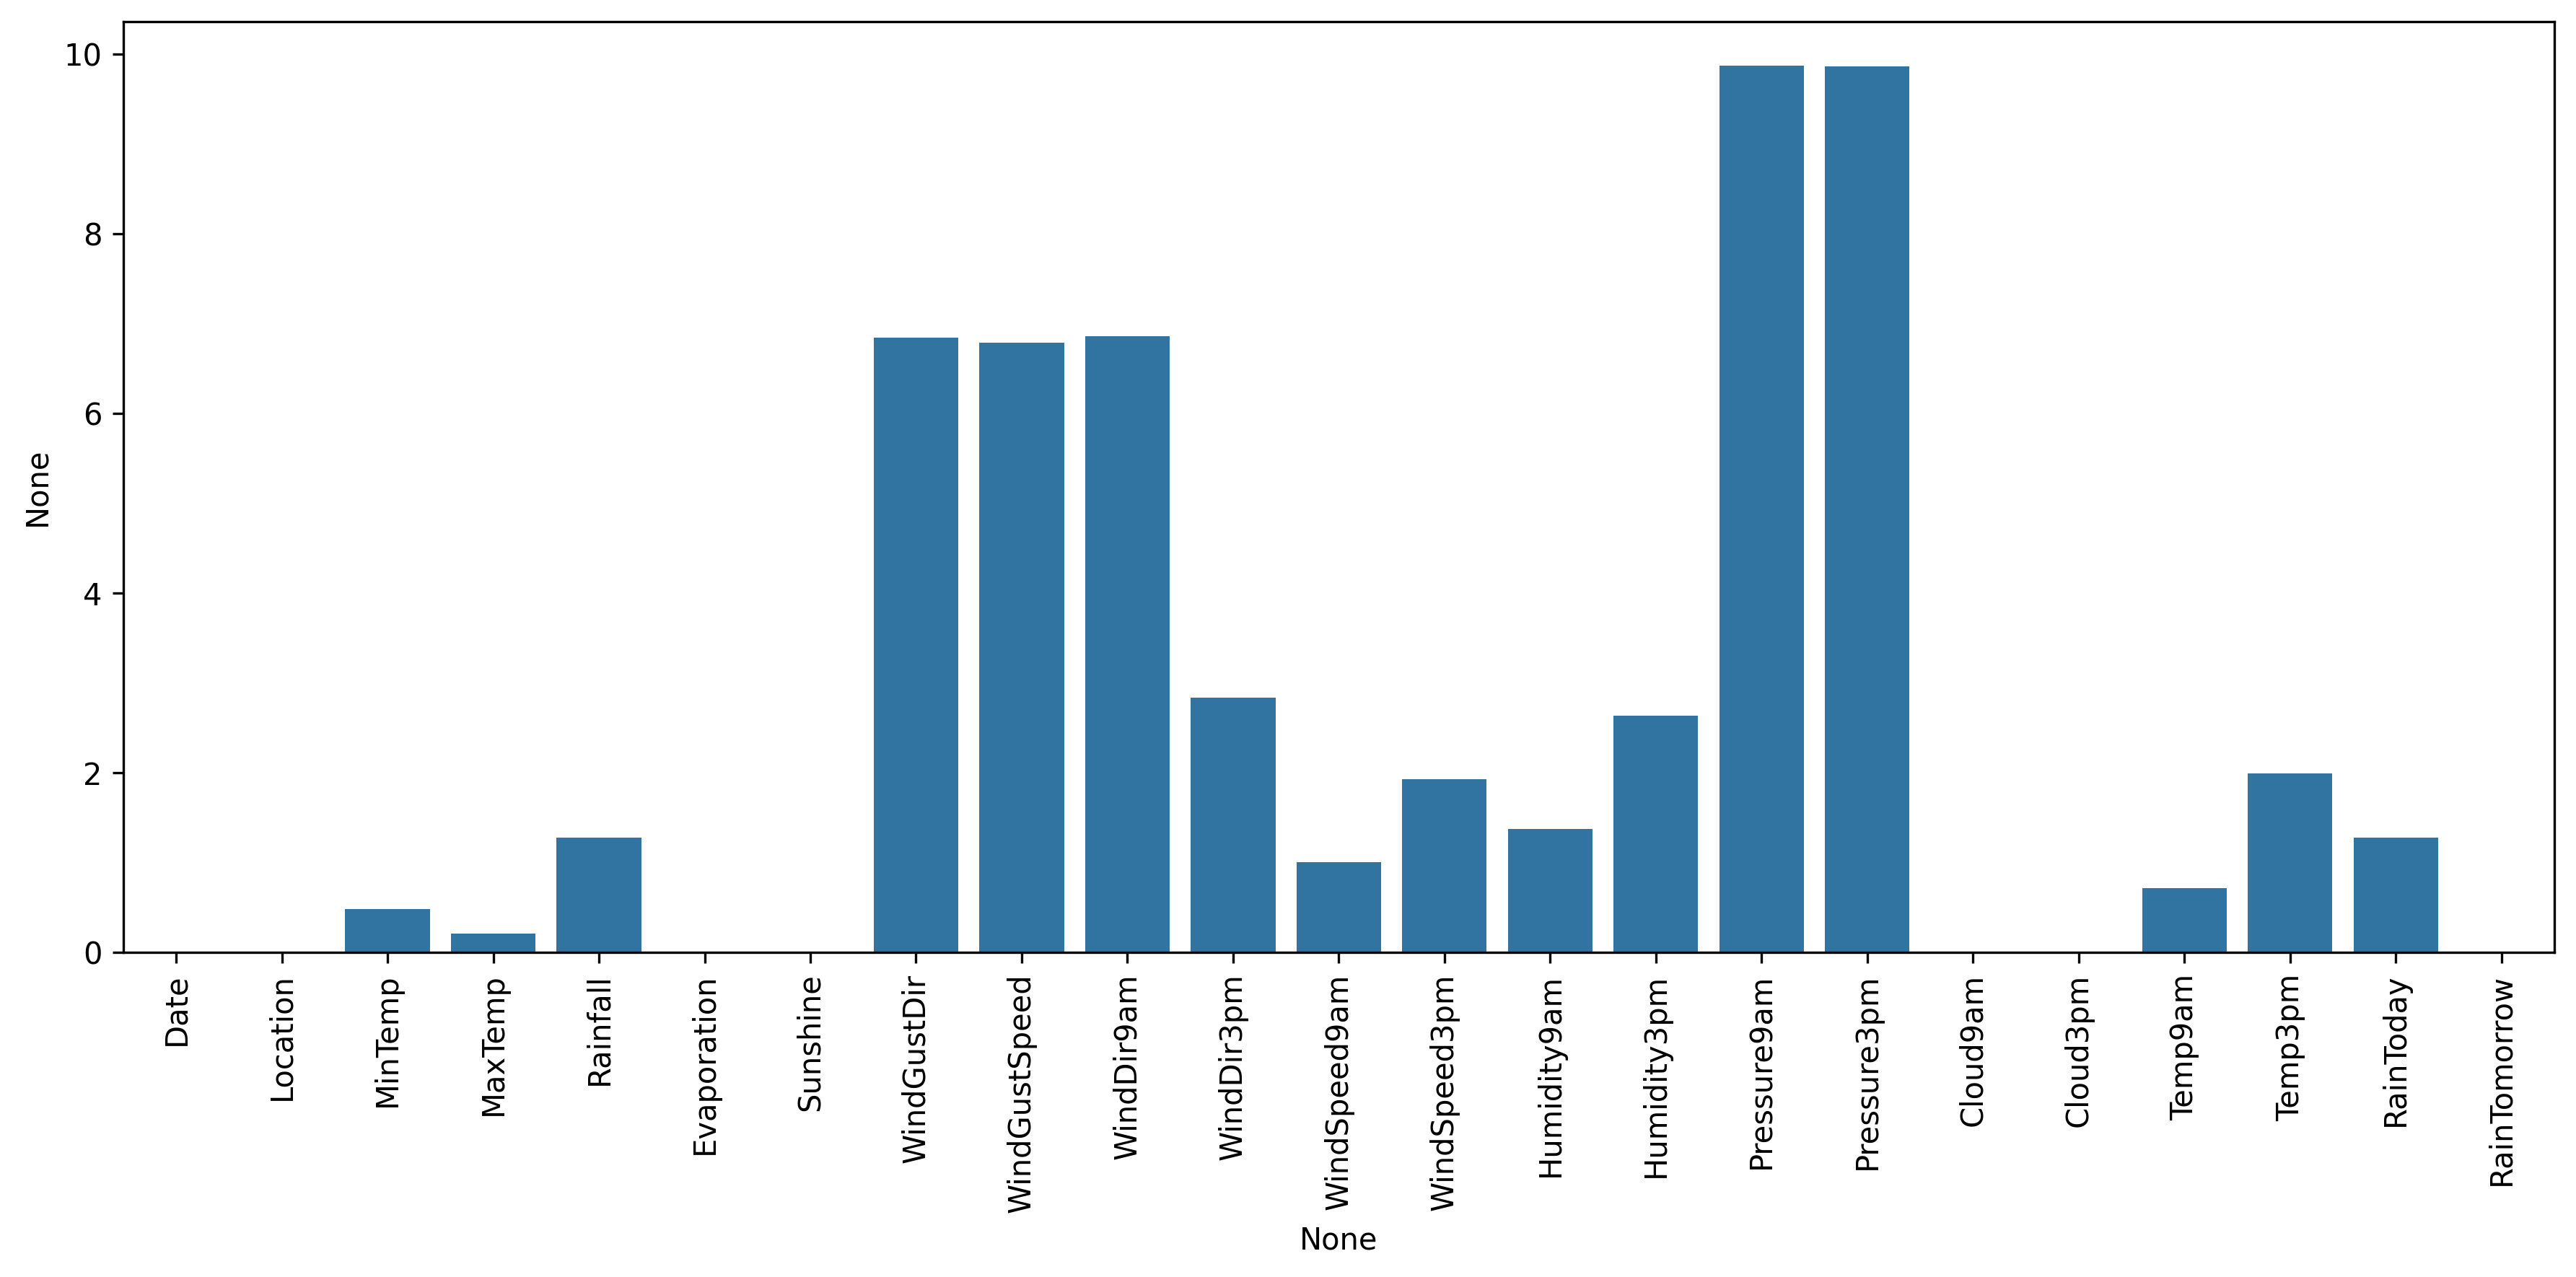

In [81]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

Next for all the continuous_feature we are replacing the null values with its median

In [82]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [83]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.846514
WindGustSpeed    0.000000
WindDir9am       6.860111
WindDir3pm       2.837485
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        1.278690
RainTomorrow     0.000000
dtype: float64

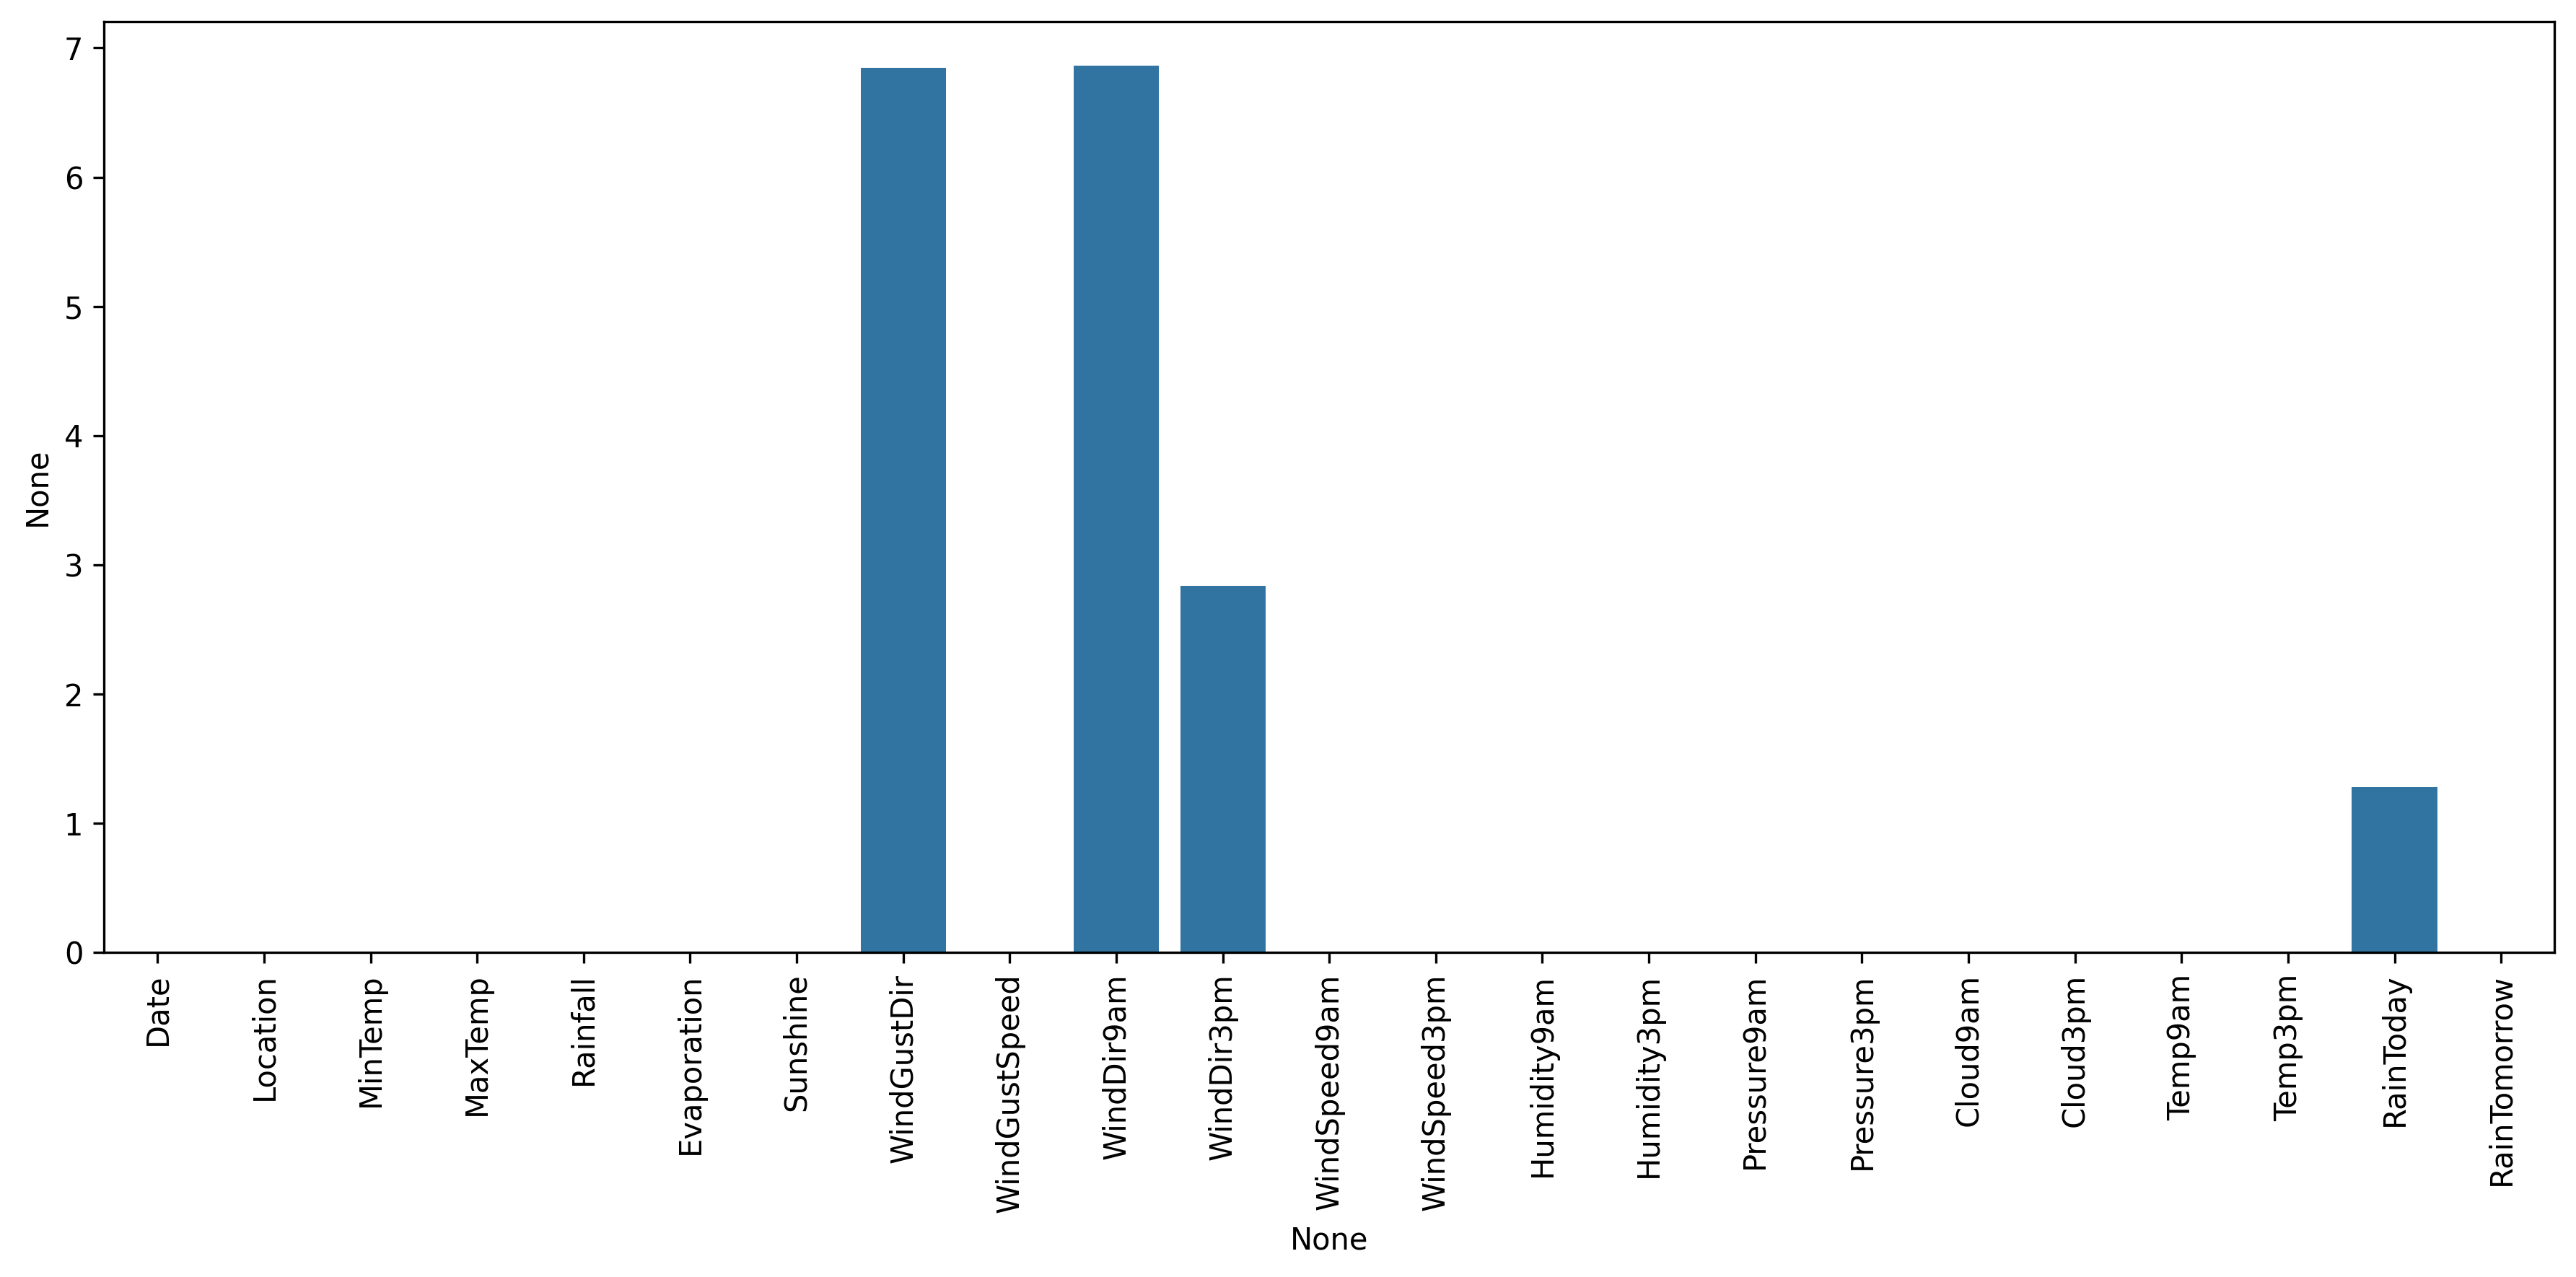

In [84]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

#### We've handled the null values numeric features now we'll proceed to deal with catagorical features, we will even encode  the catagorical data along with this process ####

For the RainToday and RainTomorrow data we have either yes or no therefore we can replace this data with 0 and 1 which means no and yes respectively.

In [85]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01        Albury     13.4     22.9       0.6          8.0   
1       2008-12-02        Albury      7.4     25.1       0.0          5.6   
2       2008-12-03        Albury     12.9     25.7       0.0          5.6   
3       2008-12-04        Albury      9.2     28.0       0.0          1.2   
4       2008-12-05        Albury     17.5     32.3       1.0          8.0   
...            ...           ...      ...      ...       ...          ...   
105523  2017-05-18     Nuriootpa     11.0     17.9       0.6          1.8   
118222  2010-08-17  PerthAirport      4.5     18.6       0.0          2.6   
102295  2016-10-11  MountGambier      5.9     13.7       2.8         14.0   
17729   2016-06-04     Newcastle     13.0     18.8       5.8          2.4   
119883  2015-06-02  PerthAirport     12.0     21.0       4.8          2.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0           10.7           W           44.0          W        WNW   
1            7.5         WNW           44.0        NNW        WSW   
2           11.0         WSW           46.0          W        WSW   
3            8.2          NE           24.0         SE          E   
4            4.8           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
105523       2.1         ENE           28.0         NE          E   
118222       8.2          SW           37.0         NE         SW   
102295       4.0           W           50.0         SW        WSW   
17729        4.9         NaN           39.0         SE        NaN   
119883       5.7         WNW           54.0        NNE         NW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
105523           9.0          13.0         71.0         53.0       1017.6   
118222          11.0          28.0         73.0         56.0       1004.9   
102295          31.0          20.0         68.0         76.0       1018.9   
17729            9.0          19.0         99.0         56.0       1016.9   
119883          13.0          31.0         88.0         66.0       1013.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       7.0     16.9     21.8      False   
1            1007.8       2.0       3.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       7.0       7.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
105523       1016.0       6.0       3.0     13.2     16.2      False   
118222       1003.9       5.0       7.0     11.3     16.7      False   
102295       1019.3       8.0       7.0     10.7     11.7       True   
17729        1014.6       8.0       0.0     16.5     20.5       True   
119883       1013.2       1.0       3.0     14.9     18.7       True   

        RainTomorrow  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
105523          True  
118222          True  
102295          True  
17729           True  
119883          True  

[183860 rows x 23 columns]

RainToday and RainTomorrow feature is now replaced by True or False

For the features like WindGustDir, WindDir9am and WindDir3pm null values are replaced by the value which has the max frequency.<br>
First let's look at the values these features contains

In [86]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2008-01-30', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-02-22', '2008-05-18', '2014-10-10', '2014-10-09', '2016-04-19',
       '2008-03-18', '2007-12-30', '2008-05-19', '2008-09-10', '2008-03-06'],
      dtype='object', name='Date', length=3435)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Witchcliffe', 'CoffsHarbour', 'Albany', 'NorahHead',
       'MountGinini', 'Williamtown', 'Darwin', 'Melbourne', 'Sydney',
       'SydneyAirport', 'GoldCoast', 'Ballarat', 'Watsonia', 'Newcastle',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide', 'Sale',
       'MelbourneAirport', 'Albury', 'Penrith', 'BadgerysCreek', 'Perth',
       'Nuriootpa', 'Tuggeranong', 'PerthAirport', 'Bendigo', 'Canberra',
       'PearceRAAF', 'Richmond', 'WaggaWagga', 'Townsville', 'Katherine',
       'SalmonGums', 'Nhil', 

Now let's map these data with some numbers

In [87]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

Now let's fill the null values with the value which has the maximum frequency.

In [88]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

Let's look whether do we still have any null values

In [89]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Seems like we've dealt with all the null values in the given data

Let's look at the dataframe

In [90]:
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01        Albury     13.4     22.9       0.6          8.0   
1       2008-12-02        Albury      7.4     25.1       0.0          5.6   
2       2008-12-03        Albury     12.9     25.7       0.0          5.6   
3       2008-12-04        Albury      9.2     28.0       0.0          1.2   
4       2008-12-05        Albury     17.5     32.3       1.0          8.0   
...            ...           ...      ...      ...       ...          ...   
105523  2017-05-18     Nuriootpa     11.0     17.9       0.6          1.8   
118222  2010-08-17  PerthAirport      4.5     18.6       0.0          2.6   
102295  2016-10-11  MountGambier      5.9     13.7       2.8         14.0   
17729   2016-06-04     Newcastle     13.0     18.8       5.8          2.4   
119883  2015-06-02  PerthAirport     12.0     21.0       4.8          2.8   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0           10.7          4.0           44.0         5.0         3.0   
1            7.5          2.0           44.0         0.0         6.0   
2           11.0          5.0           46.0         5.0         6.0   
3            8.2         11.0           24.0        13.0        14.0   
4            4.8          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
105523       2.1         14.0           28.0         9.0        14.0   
118222       8.2          9.0           37.0         9.0         9.0   
102295       4.0          4.0           50.0         7.0         6.0   
17729        4.9          4.0           39.0        13.0        10.0   
119883       5.7          2.0           54.0         3.0         0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
105523           9.0          13.0         71.0         53.0       1017.6   
118222          11.0          28.0         73.0         56.0       1004.9   
102295          31.0          20.0         68.0         76.0       1018.9   
17729            9.0          19.0         99.0         56.0       1016.9   
119883          13.0          31.0         88.0         66.0       1013.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       7.0     16.9     21.8      False   
1            1007.8       2.0       3.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       7.0       7.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
105523       1016.0       6.0       3.0     13.2     16.2      False   
118222       1003.9       5.0       7.0     11.3     16.7      False   
102295       1019.3       8.0       7.0     10.7     11.7       True   
17729        1014.6       8.0       0.0     16.5     20.5       True   
119883       1013.2       1.0       3.0     14.9     18.7       True   

        RainTomorrow  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
105523          True  
118222          True  
102295          True  
17729           True  
119883          True  

[183860 rows x 23 columns]

##### Our next task is to map location feature

Our approach for mapping these locations involves replacing them with the values corresponding to the locations where 'RainTomorrow' is most frequently observed to be true.

In [91]:
# let's create a dataframe which shows weather it will rain tomorrow or not according to the places
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow      False  True 
Location                      
Adelaide           2402   1591
Albany             2114   2019
Albury             2393   1447
AliceSprings       2787    533
BadgerysCreek      2345   1357
Ballarat           2247   1754
Bendigo            2472   1327
Brisbane           2452   1696
Cairns             2038   2179
Canberra           2789   1491
Cobar              2602    948
CoffsHarbour       2084   2031
Dartmoor           2021   2148
Darwin             2340   1969
GoldCoast          2205   1739
Hobart             2427   1797
Katherine          1294    559
Launceston         2329   1647
Melbourne          1799   1478
MelbourneAirport   2356   1494
Mildura            2680    774
Moree              2460    869
MountGambier       2110   2103
MountGinini        2088   1854
Newcastle          2224   1711
Nhil               1327    560
NorahHead          2121   1913
NorfolkIsland      2045   2068
Nuriootpa          2410   1349
PearceRAAF         2257   1195
Penrith            2369   1407
Perth              2548   1449
PerthAirport       2442   1338
Portland           1901   2473
Richmond           2391   1258
Sale               2357   1513
SalmonGums         2483   1063
Sydney             2472   2015
SydneyAirport      2231   1762
Townsville         2514   1162
Tuggeranong        2430   1350
Uluru              1405    281
WaggaWagga         2440   1232
Walpole            1870   2130
Watsonia           2261   1746
Williamtown        1853   1567
Witchcliffe        2073   2060
Wollongong         2270   1687
Woomera            2788    451

In [92]:
# sort the values to see where it rained the most
df1[True].sort_values(ascending = False)

Location
Portland            2473
Cairns              2179
Dartmoor            2148
Walpole             2130
MountGambier        2103
NorfolkIsland       2068
Witchcliffe         2060
CoffsHarbour        2031
Albany              2019
Sydney              2015
Darwin              1969
NorahHead           1913
MountGinini         1854
Hobart              1797
SydneyAirport       1762
Ballarat            1754
Watsonia            1746
GoldCoast           1739
Newcastle           1711
Brisbane            1696
Wollongong          1687
Launceston          1647
Adelaide            1591
Williamtown         1567
Sale                1513
MelbourneAirport    1494
Canberra            1491
Melbourne           1478
Perth               1449
Albury              1447
Penrith             1407
BadgerysCreek       1357
Tuggeranong         1350
Nuriootpa           1349
PerthAirport        1338
Bendigo             1327
Richmond            1258
WaggaWagga          1232
PearceRAAF          1195
Townsville      

In [93]:
# Let's look at all the places this data has
df1[True].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Dartmoor', 'Walpole', 'MountGambier',
       'NorfolkIsland', 'Witchcliffe', 'CoffsHarbour', 'Albany', 'Sydney',
       'Darwin', 'NorahHead', 'MountGinini', 'Hobart', 'SydneyAirport',
       'Ballarat', 'Watsonia', 'GoldCoast', 'Newcastle', 'Brisbane',
       'Wollongong', 'Launceston', 'Adelaide', 'Williamtown', 'Sale',
       'MelbourneAirport', 'Canberra', 'Melbourne', 'Perth', 'Albury',
       'Penrith', 'BadgerysCreek', 'Tuggeranong', 'Nuriootpa', 'PerthAirport',
       'Bendigo', 'Richmond', 'WaggaWagga', 'PearceRAAF', 'Townsville',
       'SalmonGums', 'Cobar', 'Moree', 'Mildura', 'Nhil', 'Katherine',
       'AliceSprings', 'Woomera', 'Uluru'],
      dtype='object', name='Location')

Now let's encode these locations, we need to remember these encoded values as it will be required in the web application we will build in future.

In [94]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

The date column is curruntly no use to us so we will extract the month from the date and make it as a new feature.<br>This what is done in our base paper as well

In [95]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

df["Date_month"] = df["Date"].dt.month


In [96]:
# now let's look at the datarame
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        30     13.4     22.9       0.6          8.0   
1      2008-12-02        30      7.4     25.1       0.0          5.6   
2      2008-12-03        30     12.9     25.7       0.0          5.6   
3      2008-12-04        30      9.2     28.0       0.0          1.2   
4      2008-12-05        30     17.5     32.3       1.0          8.0   
...           ...       ...      ...      ...       ...          ...   
105523 2017-05-18        32     11.0     17.9       0.6          1.8   
118222 2010-08-17        35      4.5     18.6       0.0          2.6   
102295 2016-10-11         5      5.9     13.7       2.8         14.0   
17729  2016-06-04        19     13.0     18.8       5.8          2.4   
119883 2015-06-02        35     12.0     21.0       4.8          2.8   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0           10.7          4.0           44.0         5.0         3.0   
1            7.5          2.0           44.0         0.0         6.0   
2           11.0          5.0           46.0         5.0         6.0   
3            8.2         11.0           24.0        13.0        14.0   
4            4.8          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
105523       2.1         14.0           28.0         9.0        14.0   
118222       8.2          9.0           37.0         9.0         9.0   
102295       4.0          4.0           50.0         7.0         6.0   
17729        4.9          4.0           39.0        13.0        10.0   
119883       5.7          2.0           54.0         3.0         0.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
105523           9.0          13.0         71.0         53.0       1017.6   
118222          11.0          28.0         73.0         56.0       1004.9   
102295          31.0          20.0         68.0         76.0       1018.9   
17729            9.0          19.0         99.0         56.0       1016.9   
119883          13.0          31.0         88.0         66.0       1013.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       7.0     16.9     21.8      False   
1            1007.8       2.0       3.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       7.0       7.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
105523       1016.0       6.0       3.0     13.2     16.2      False   
118222       1003.9       5.0       7.0     11.3     16.7      False   
102295       1019.3       8.0       7.0     10.7     11.7       True   
17729        1014.6       8.0       0.0     16.5     20.5       True   
119883       1013.2       1.0       3.0     14.9     18.7       True   

        RainTomorrow  Date_month  
0              False          12  
1              False          12  
2              False          12  
3              False          12  
4              False          12  
...              ...         ...  
105523          True           5  
118222          True           8  
102295          True          10  
17729           True           6  
119883          True           6  

[183860 rows x 24 columns]

now let's drop the data column as it's of no use to us

In [97]:
df = df.drop('Date', axis=1)

#### Creating a data set which will not contain the outliers

In [98]:
# df.to_csv("preprocessed_with_outliers.csv", index=False)

### We've finally dealt with all the null values and successfully encoded all the catagoriacal data ###
<hr>

## Dealing with Outliers ##

Let's plot a boxplot graph to see the outliers, same approach is followed in our base paper

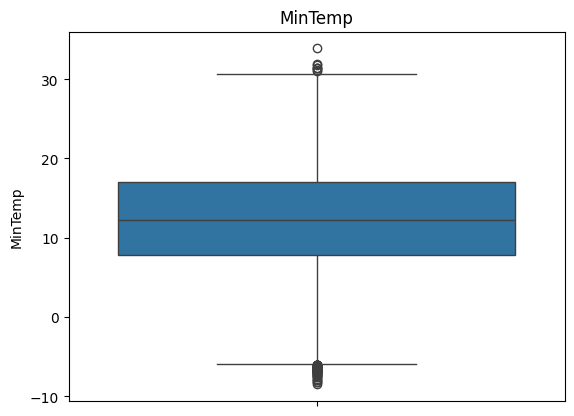

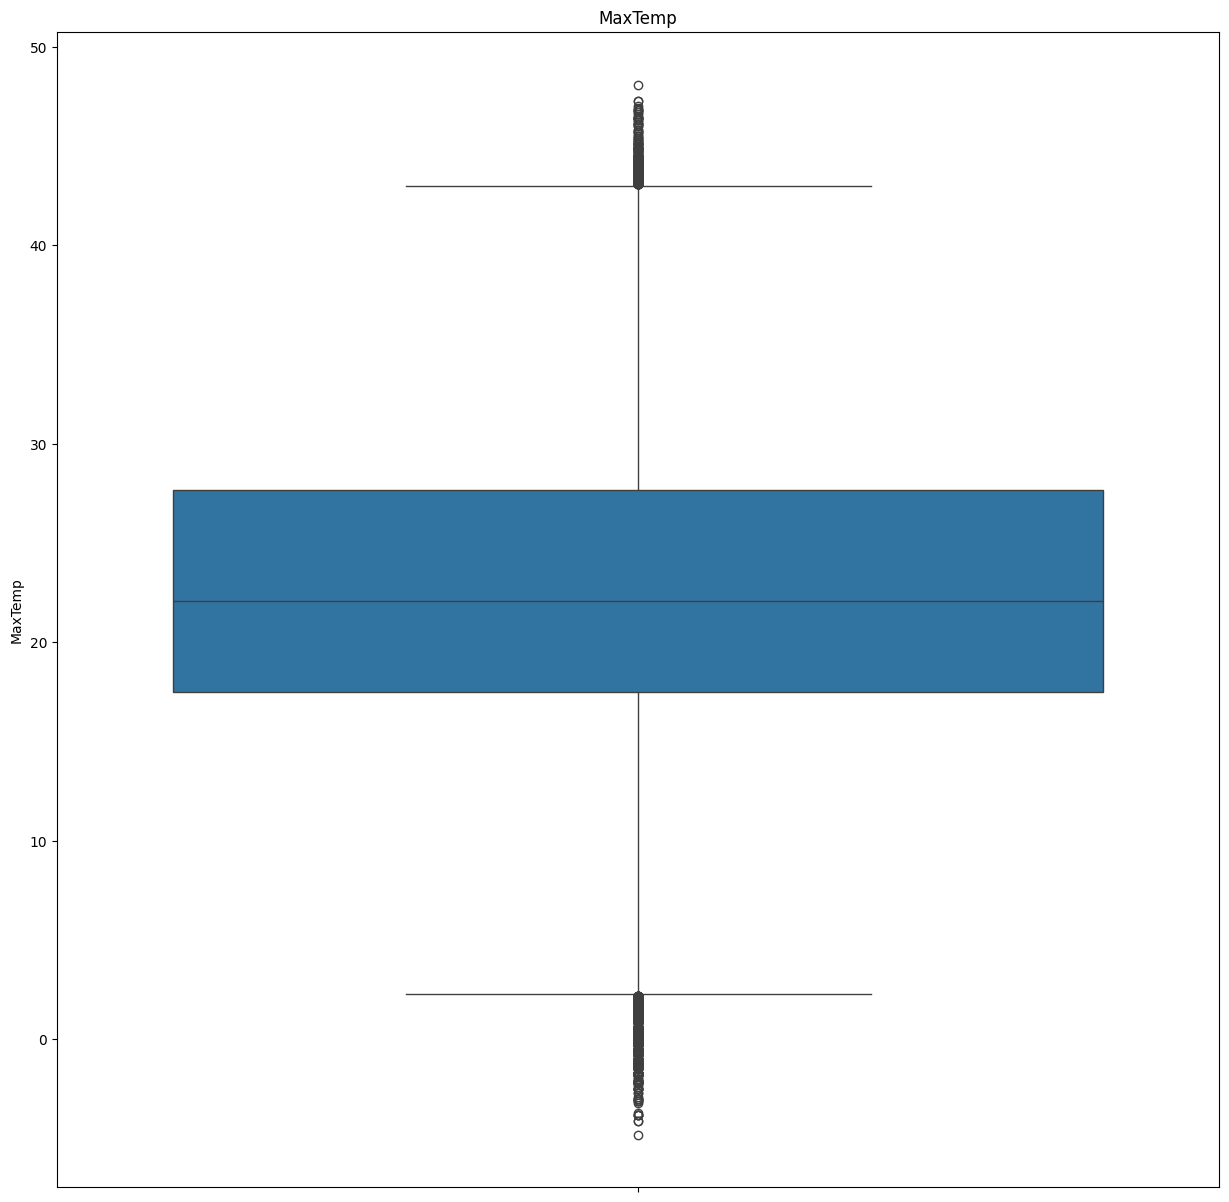

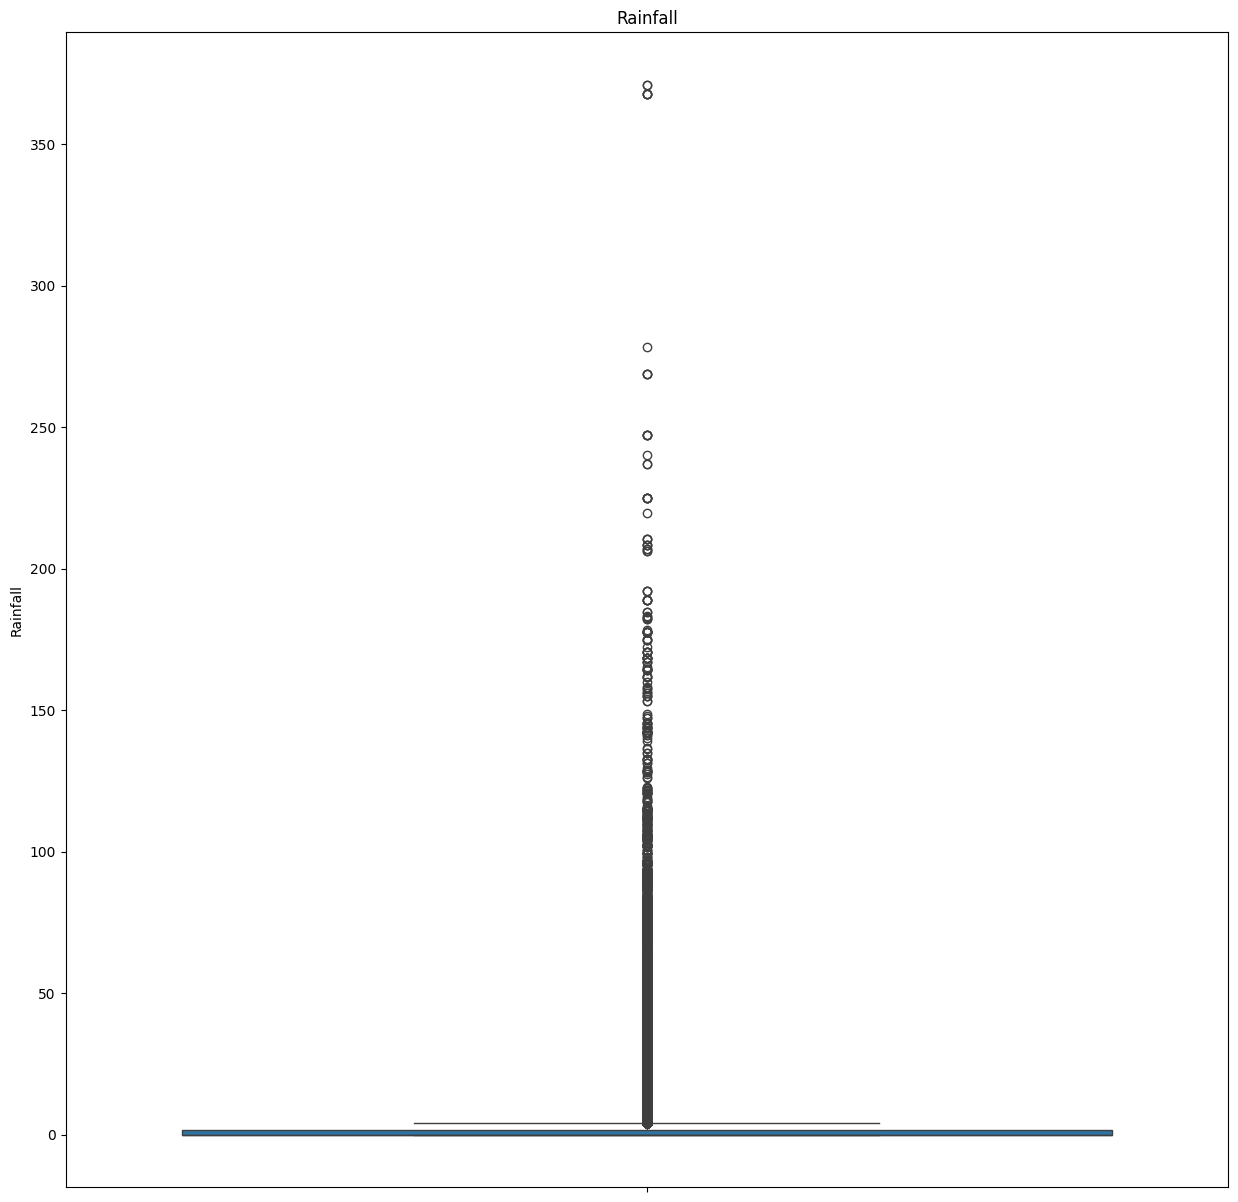

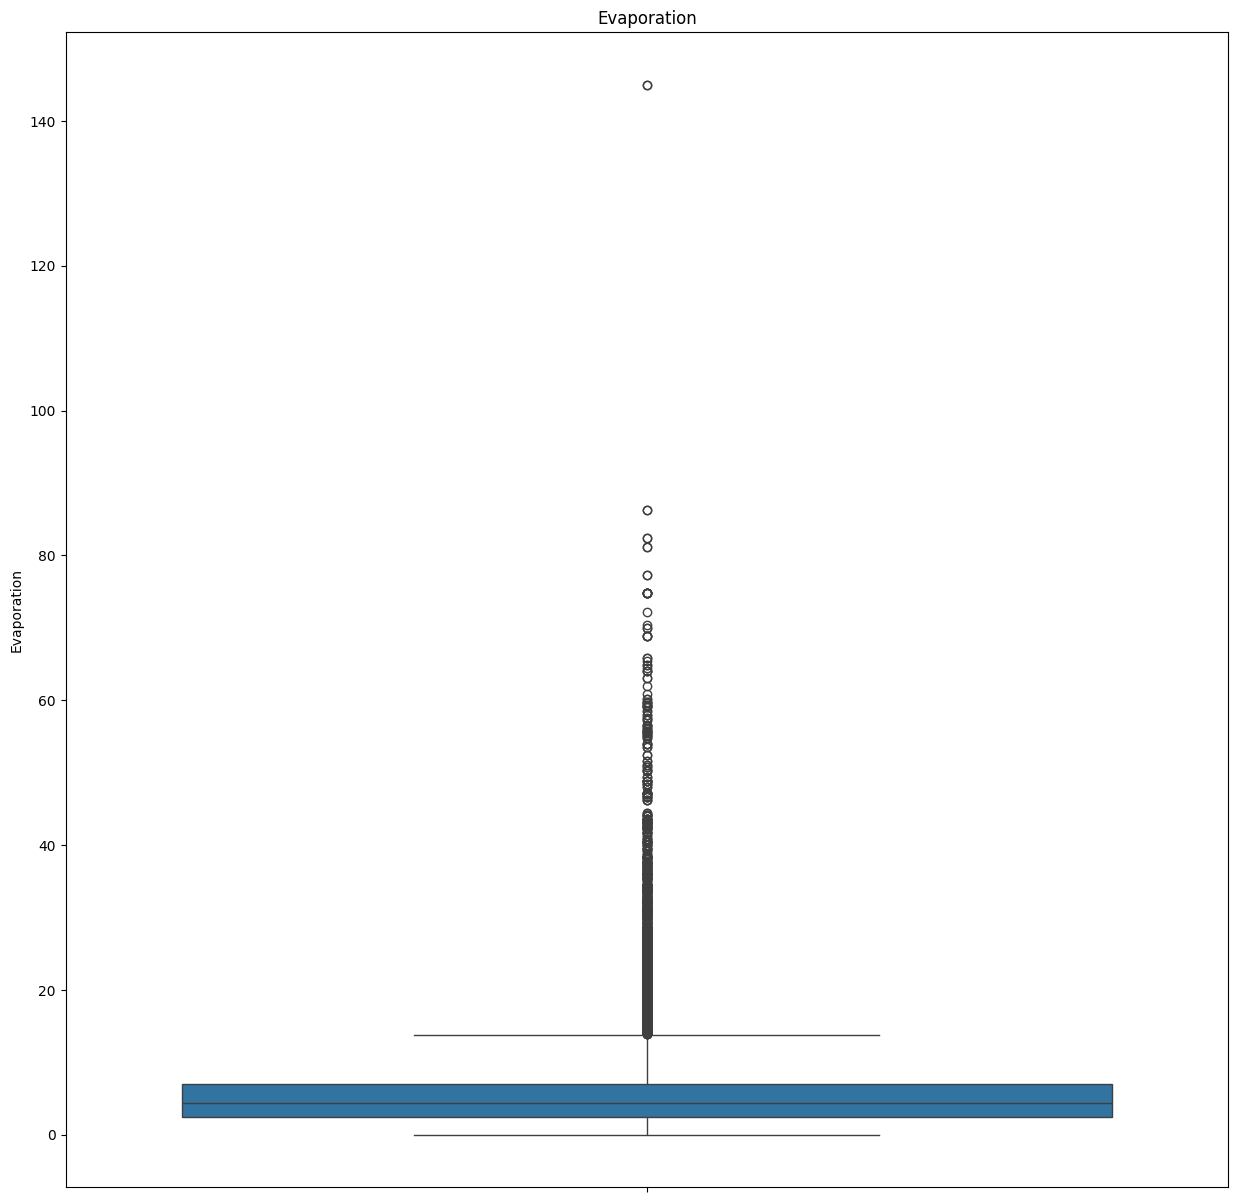

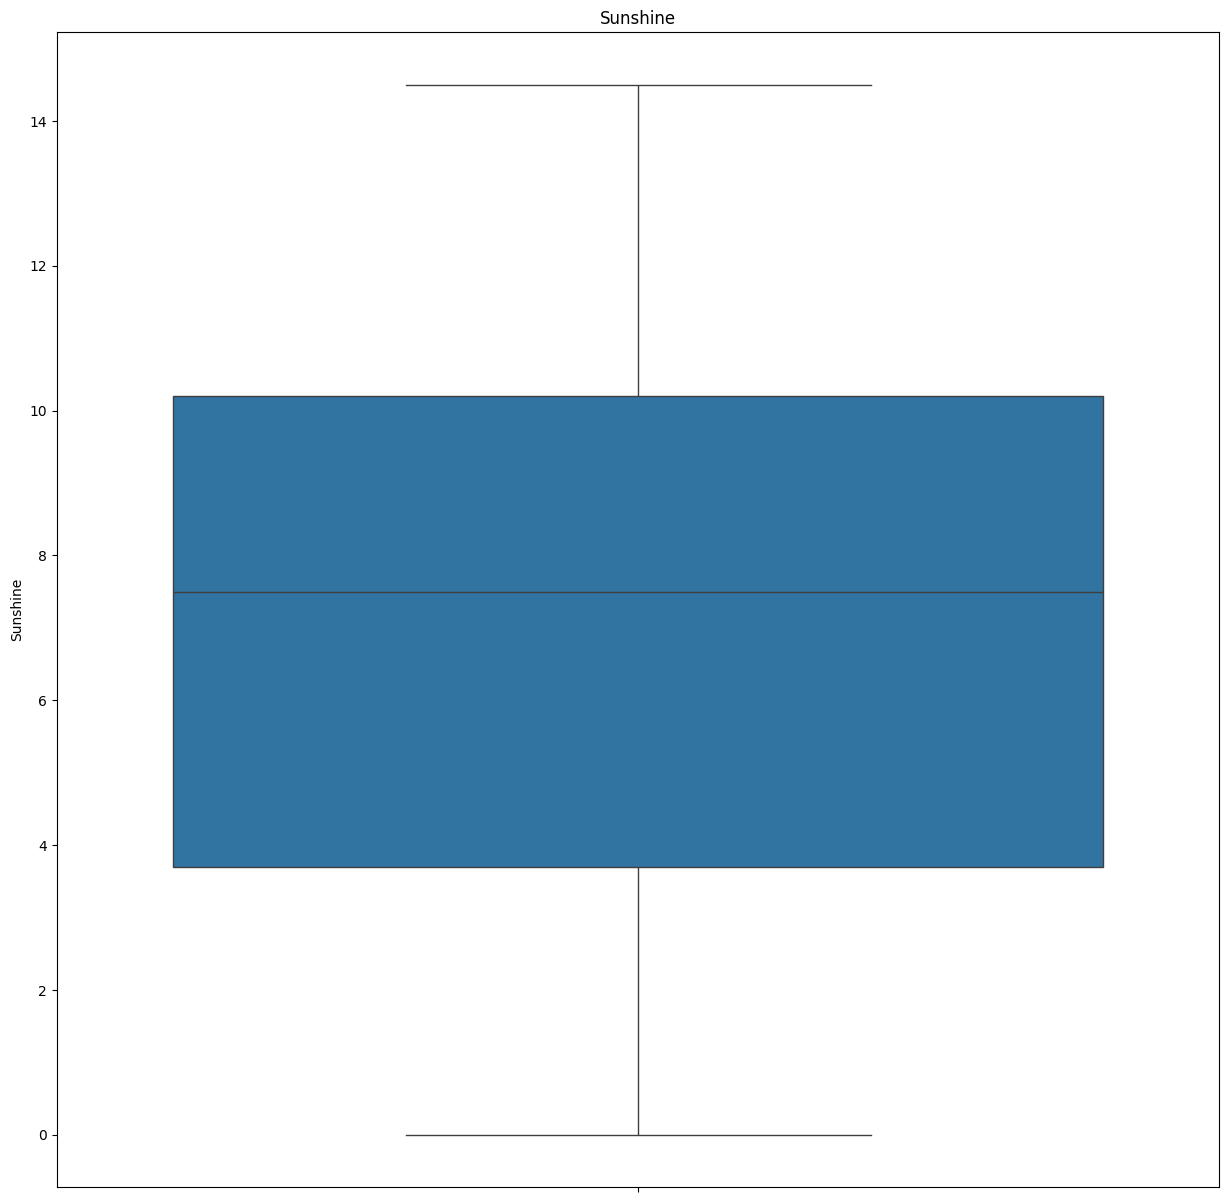

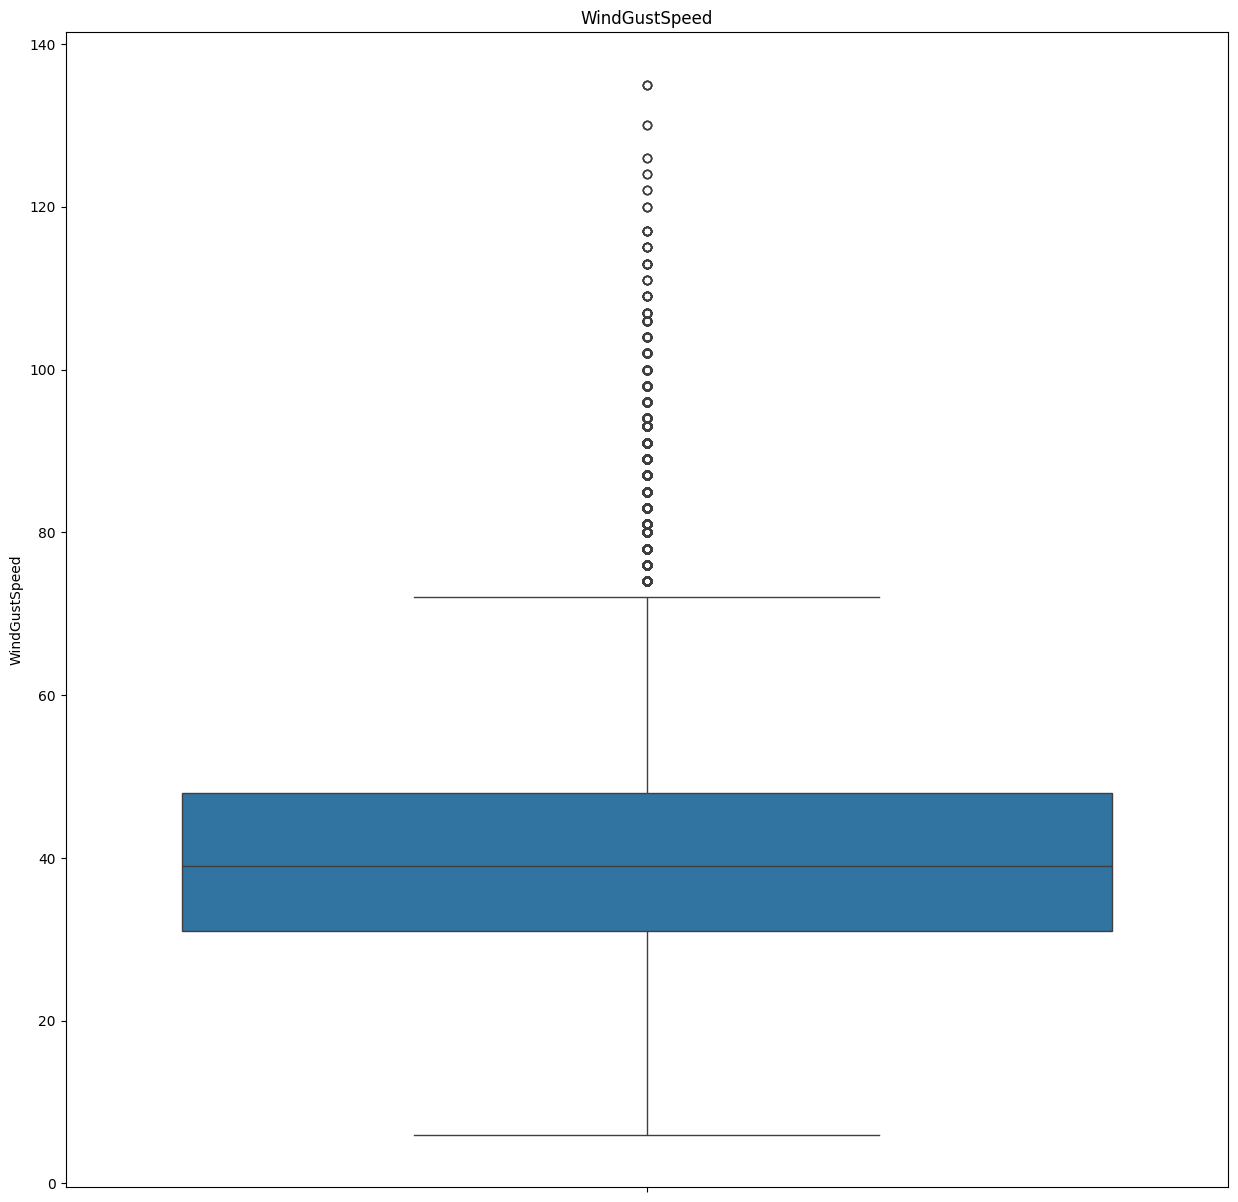

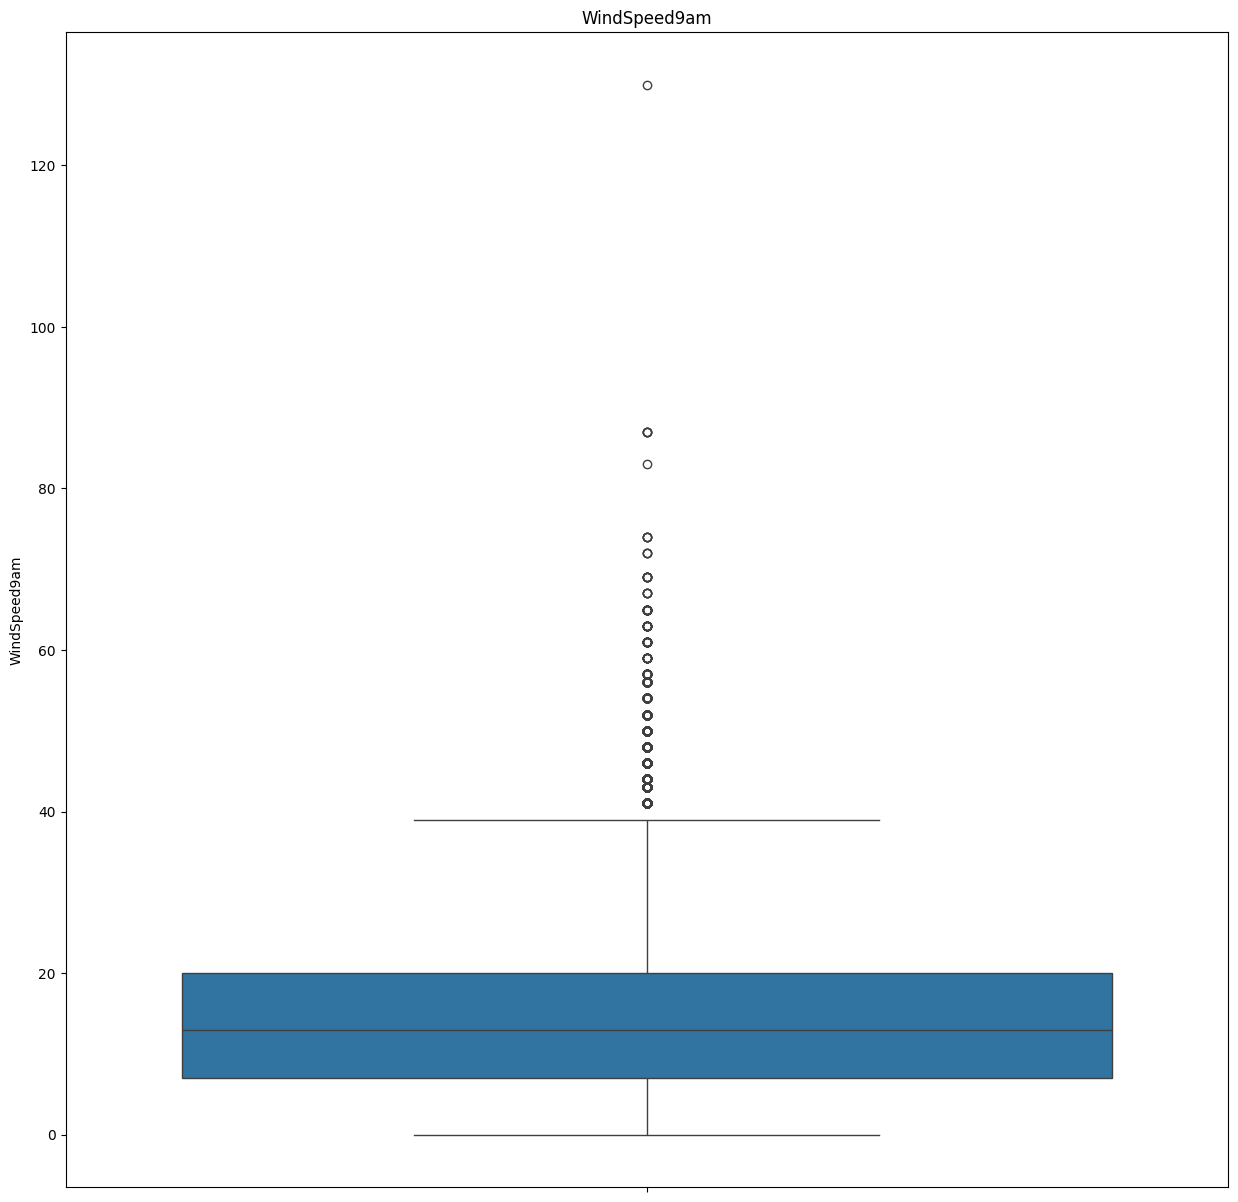

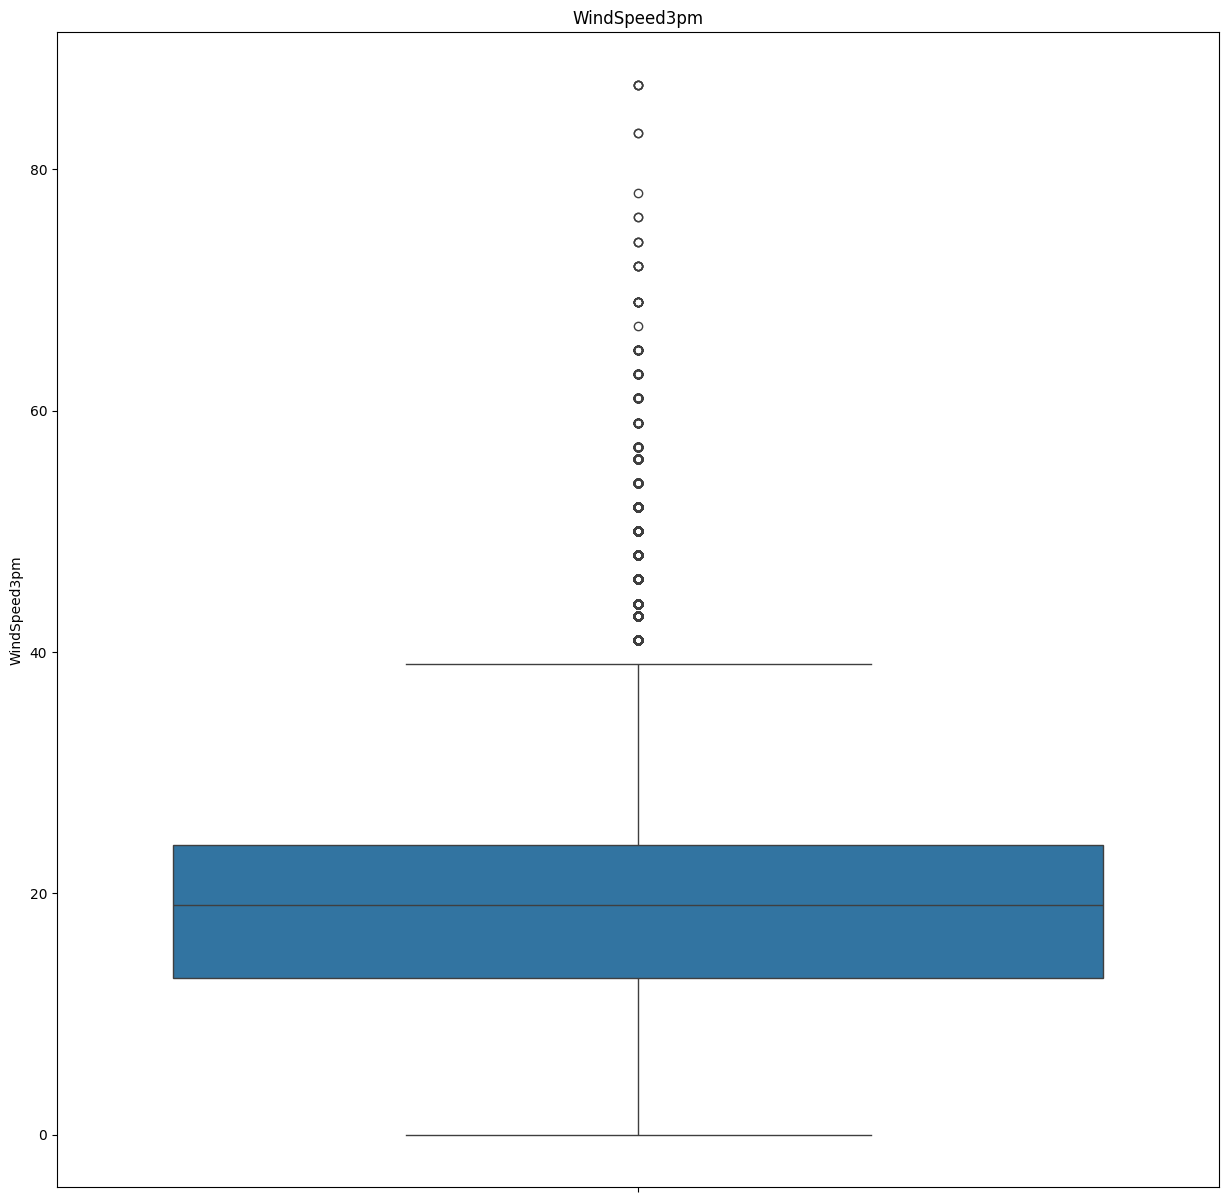

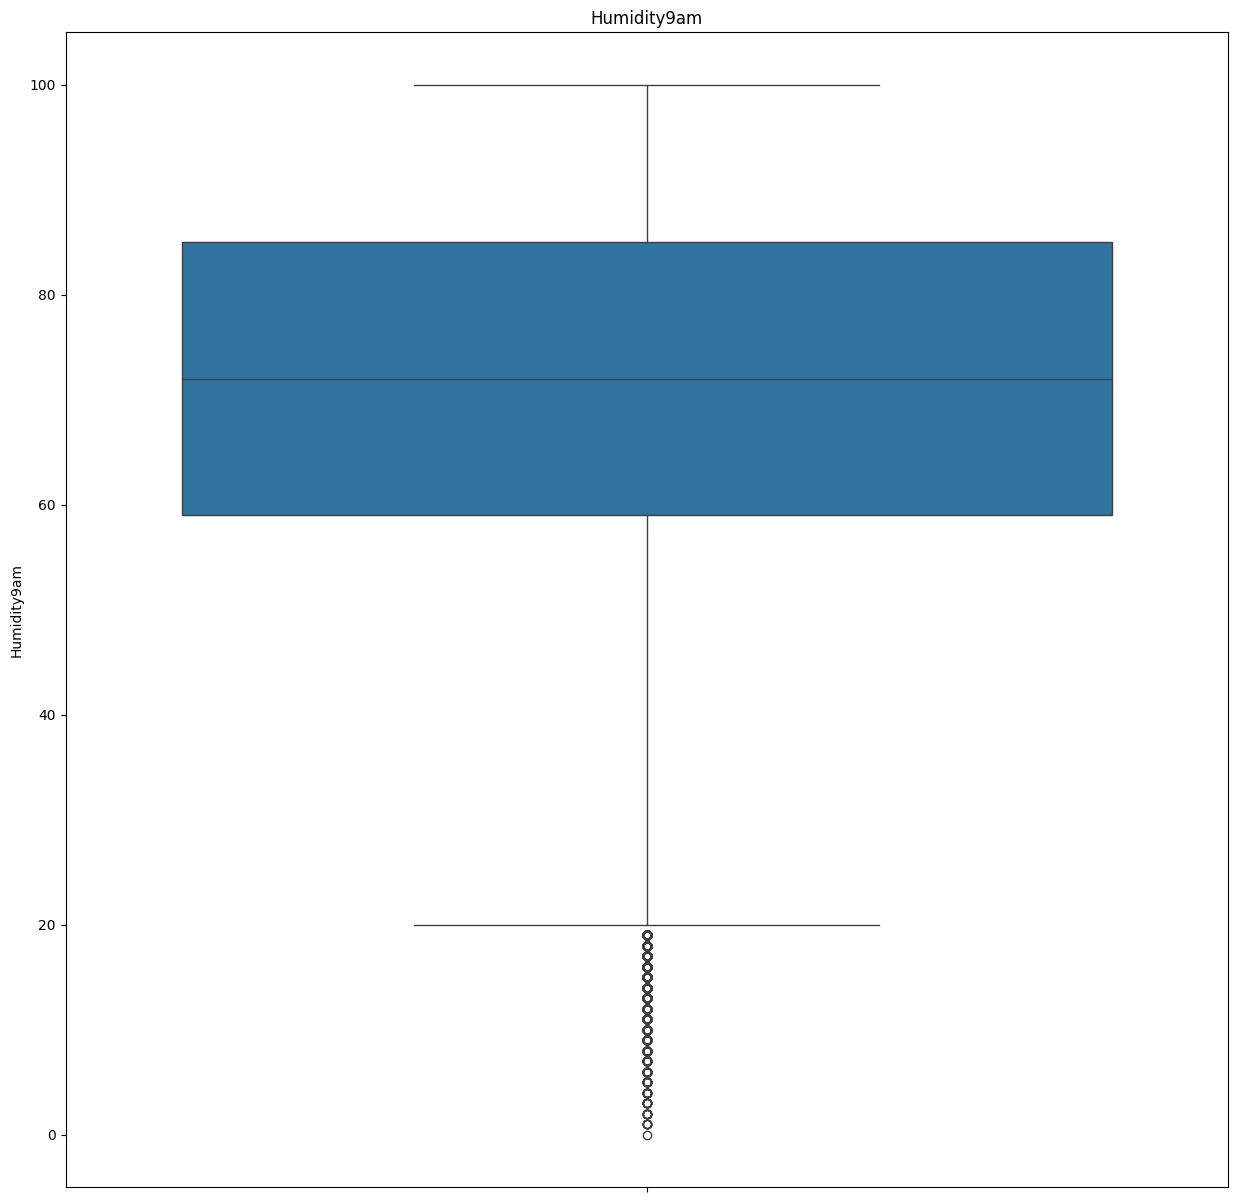

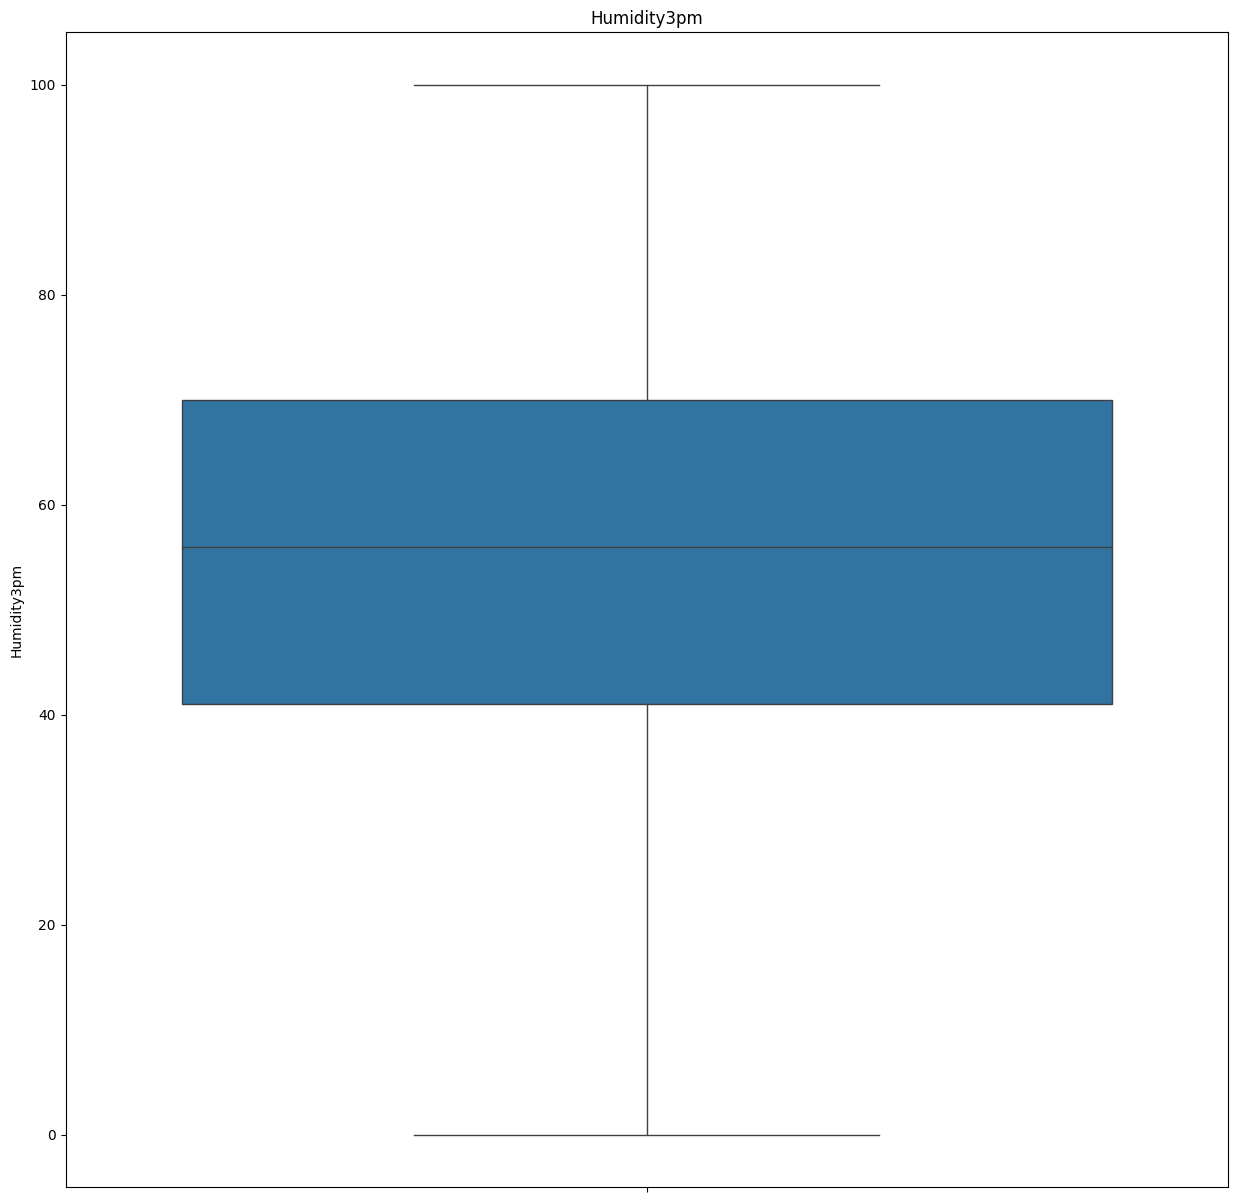

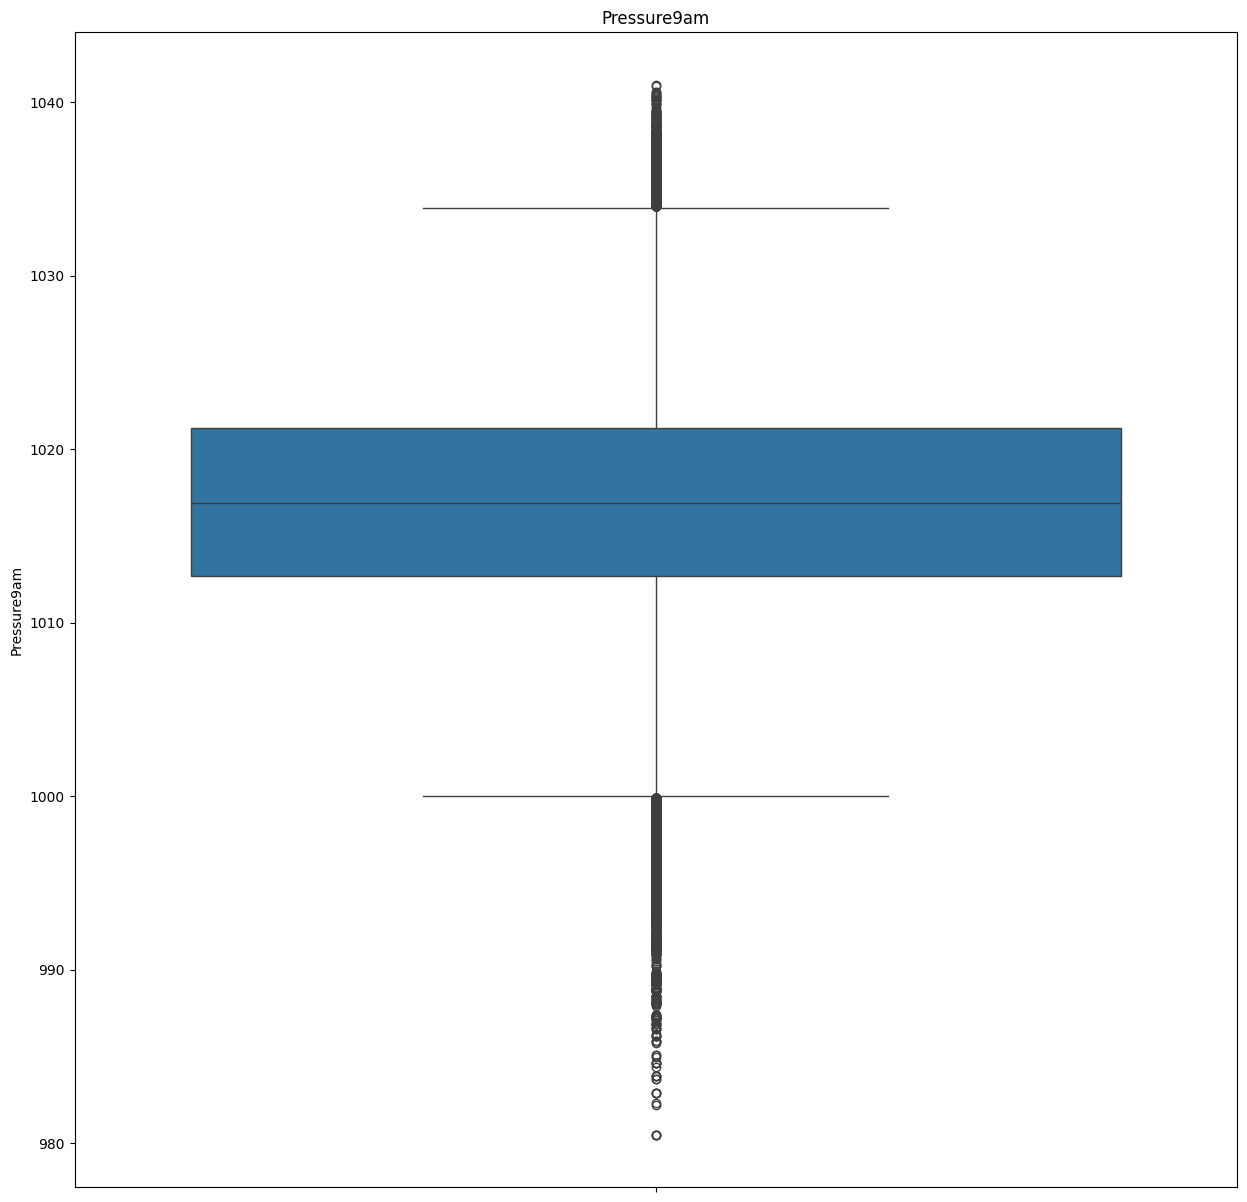

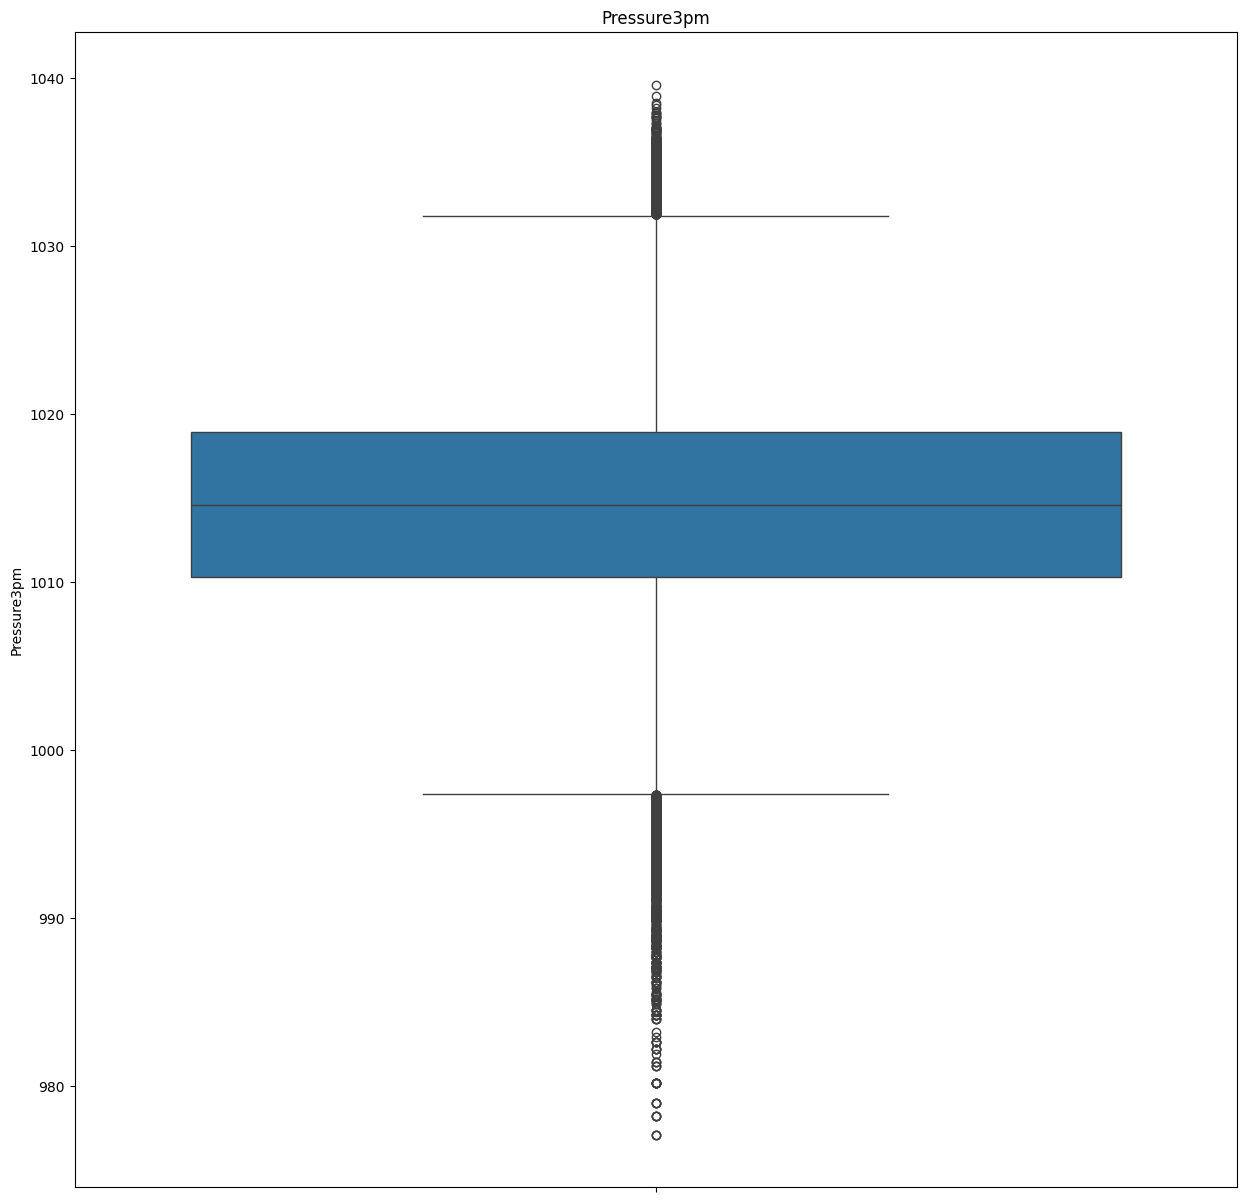

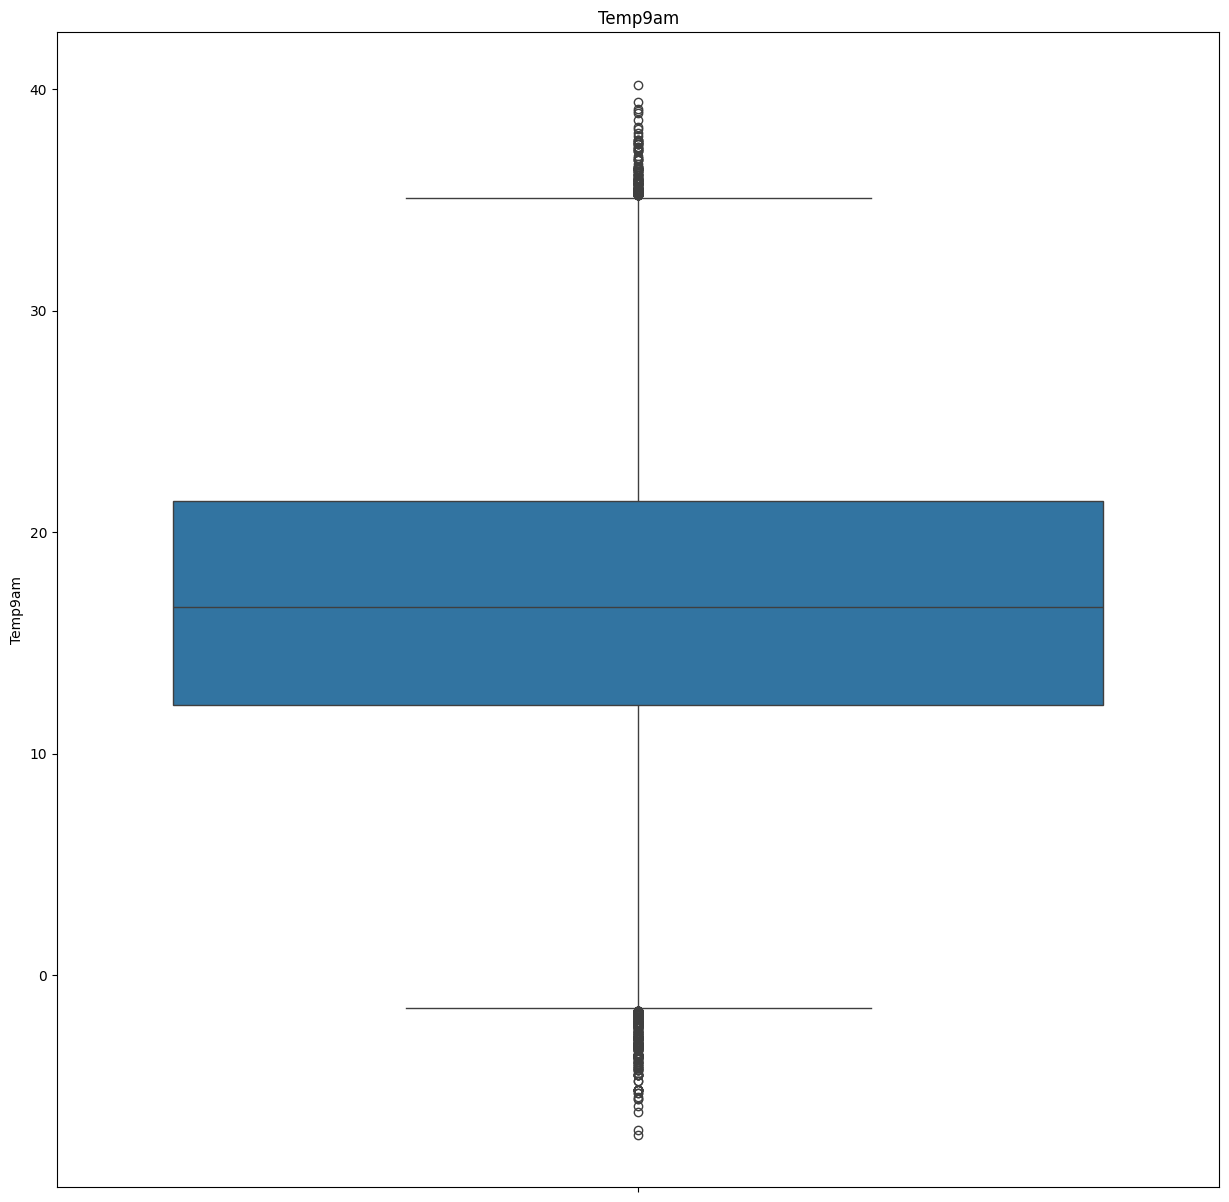

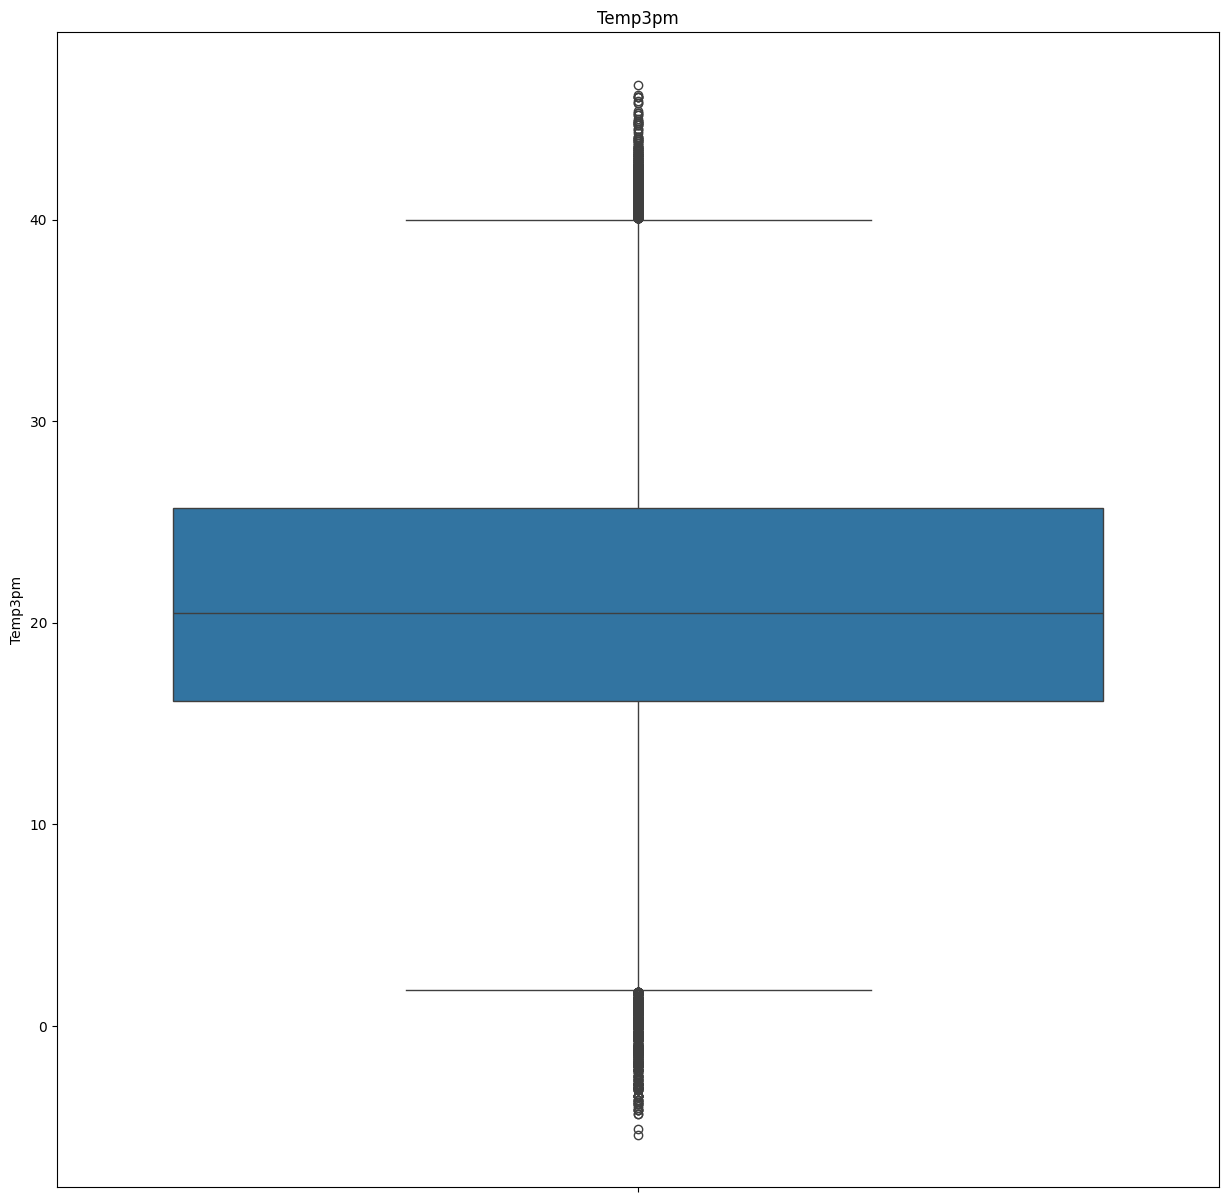

<Figure size 1500x1500 with 0 Axes>

In [99]:
# Outliers will be present in the continuous_feature
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The approach employed in the paper to address outliers involves utilizing the interquartile range method.

In [100]:
# Let's look at the continuous features we have
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [101]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.999999999999999 30.799999999999997


In [102]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [103]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.200000000000001 43.0


In [104]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [105]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.4000000000000004 4.0


In [106]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [107]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.5 13.899999999999999


In [108]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [109]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [110]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [111]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-12.5 39.5


In [112]:

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [113]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [114]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [115]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 124.0


In [116]:

df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [117]:

IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.95 1033.95


In [118]:

df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [119]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

997.3999999999999 1031.8


In [120]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [121]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.5999999999999996 35.199999999999996


In [122]:

df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [123]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.7000000000000046 40.099999999999994


In [124]:

df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

let's look at the new boxplot

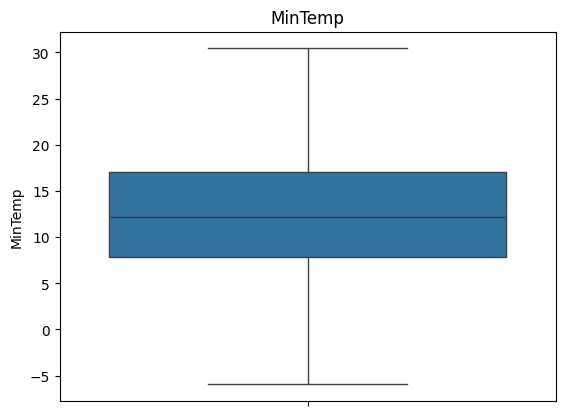

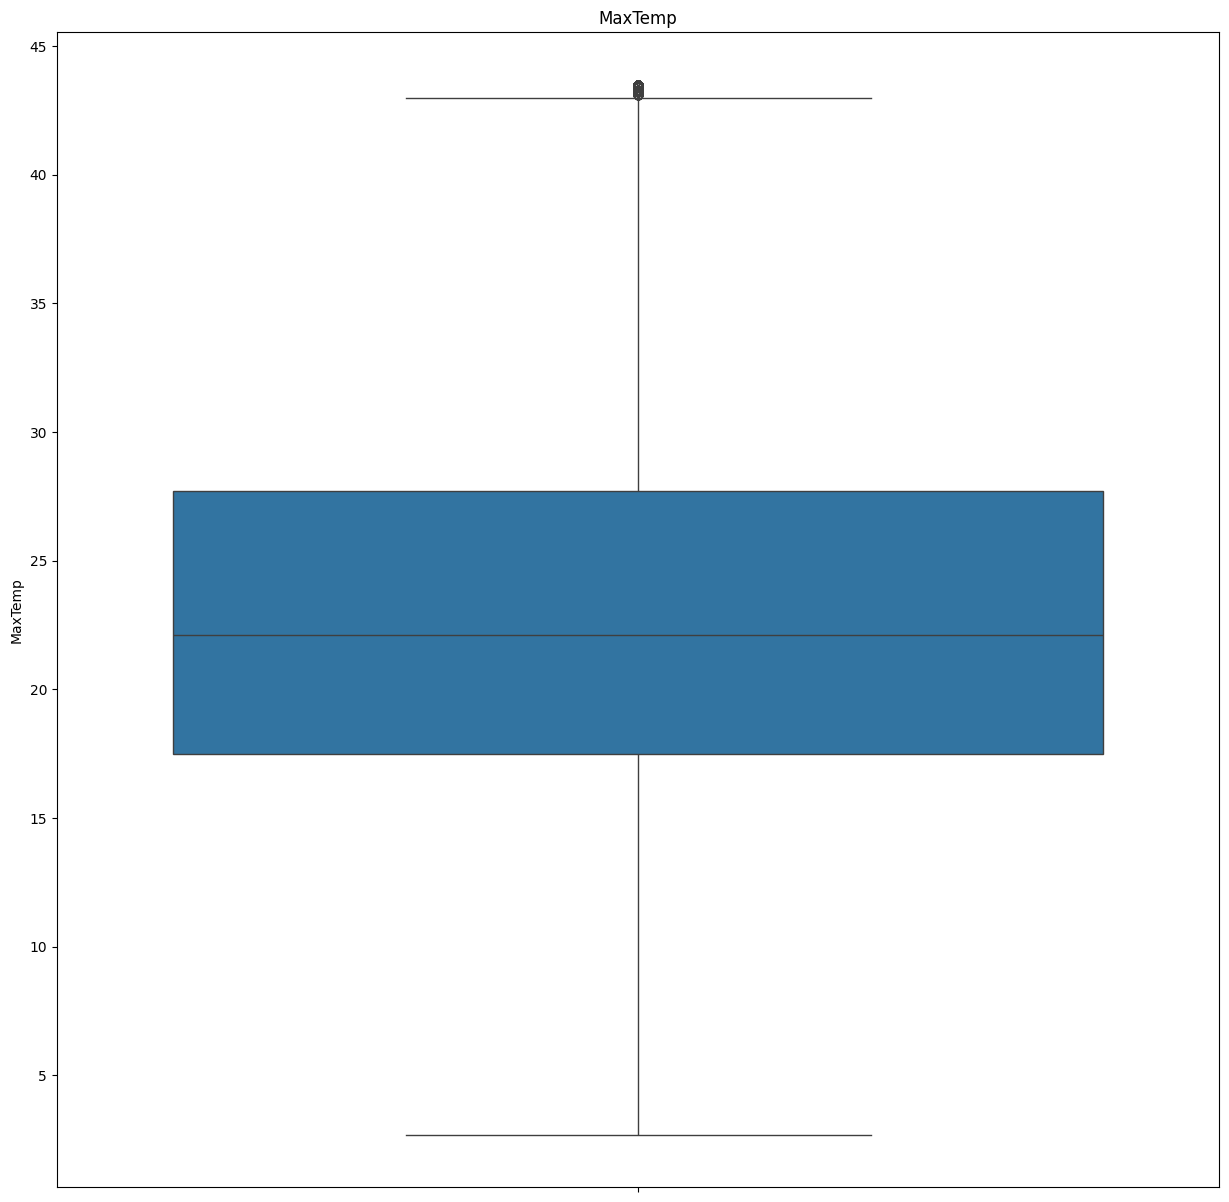

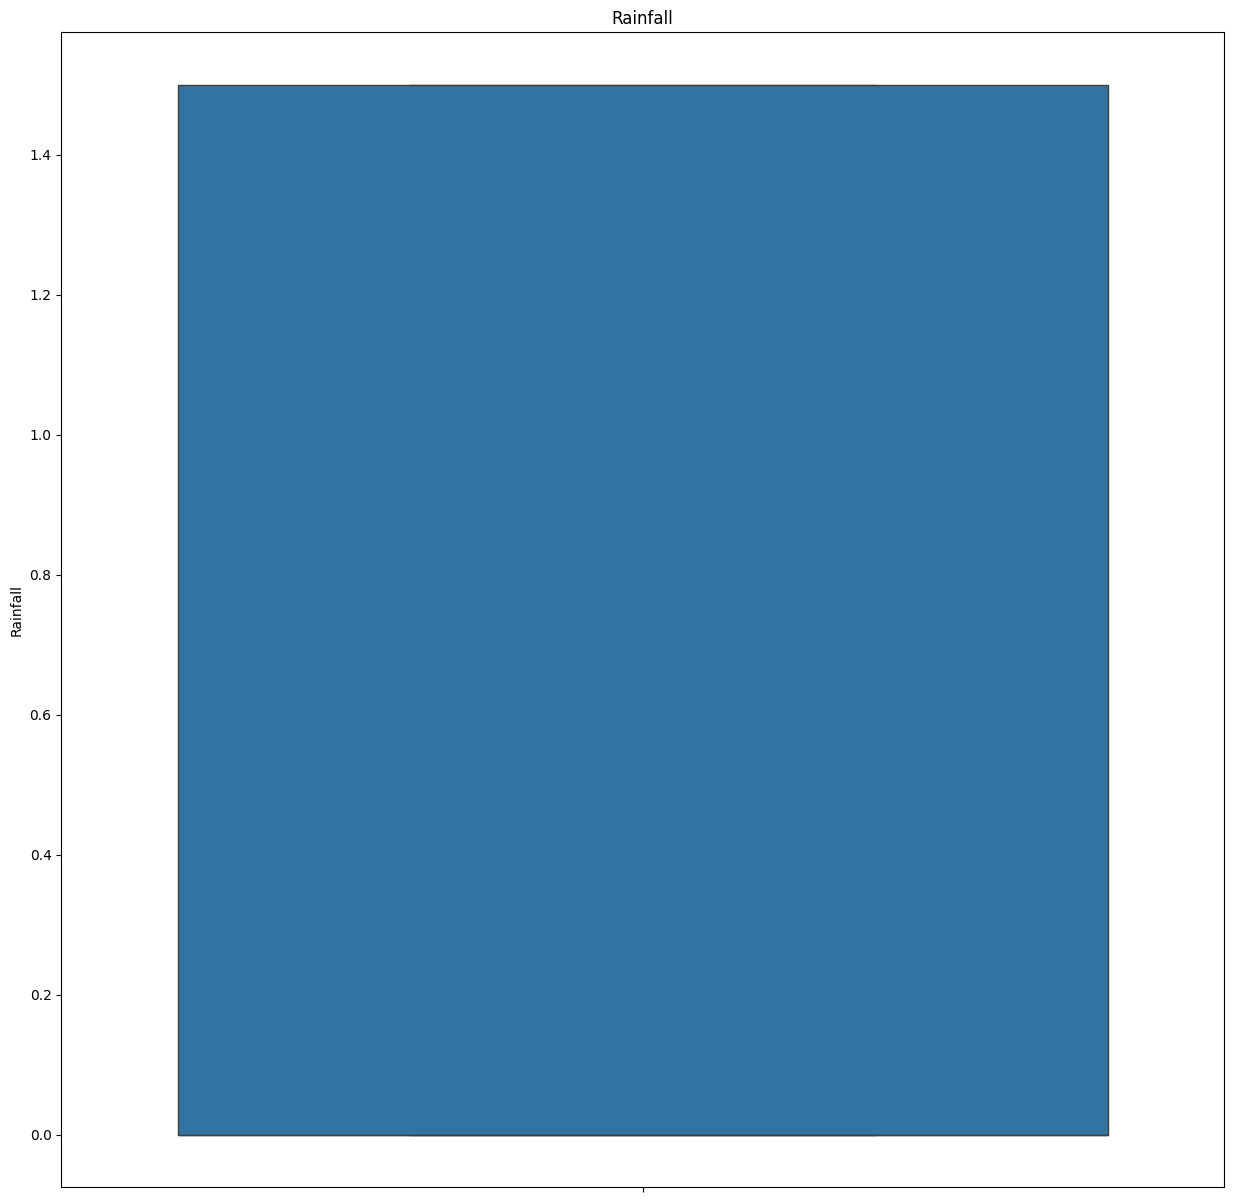

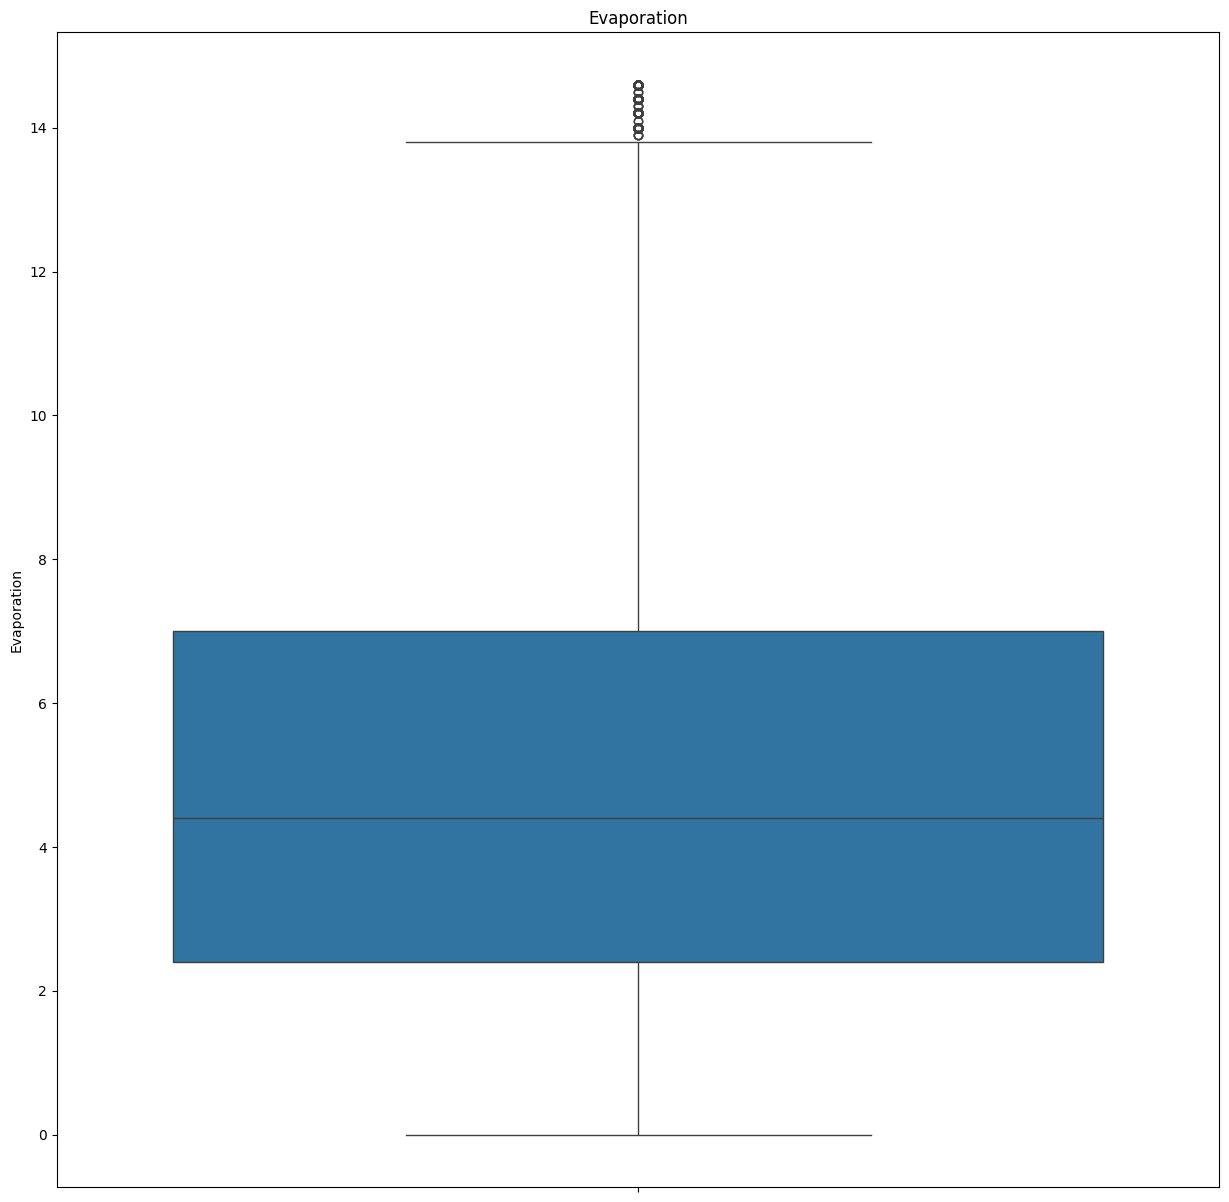

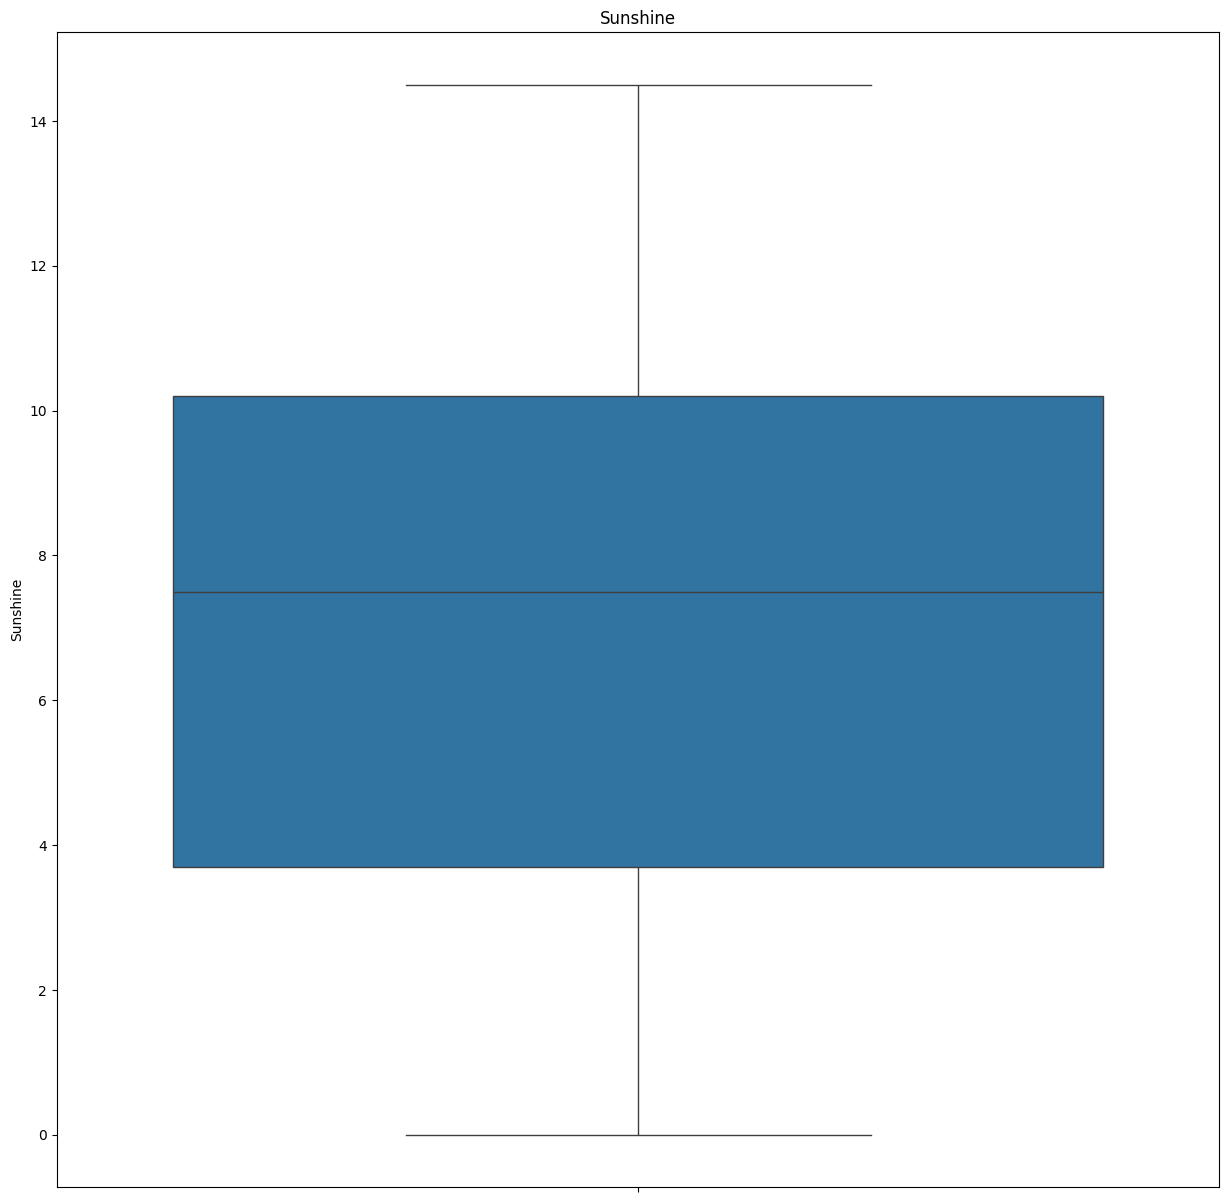

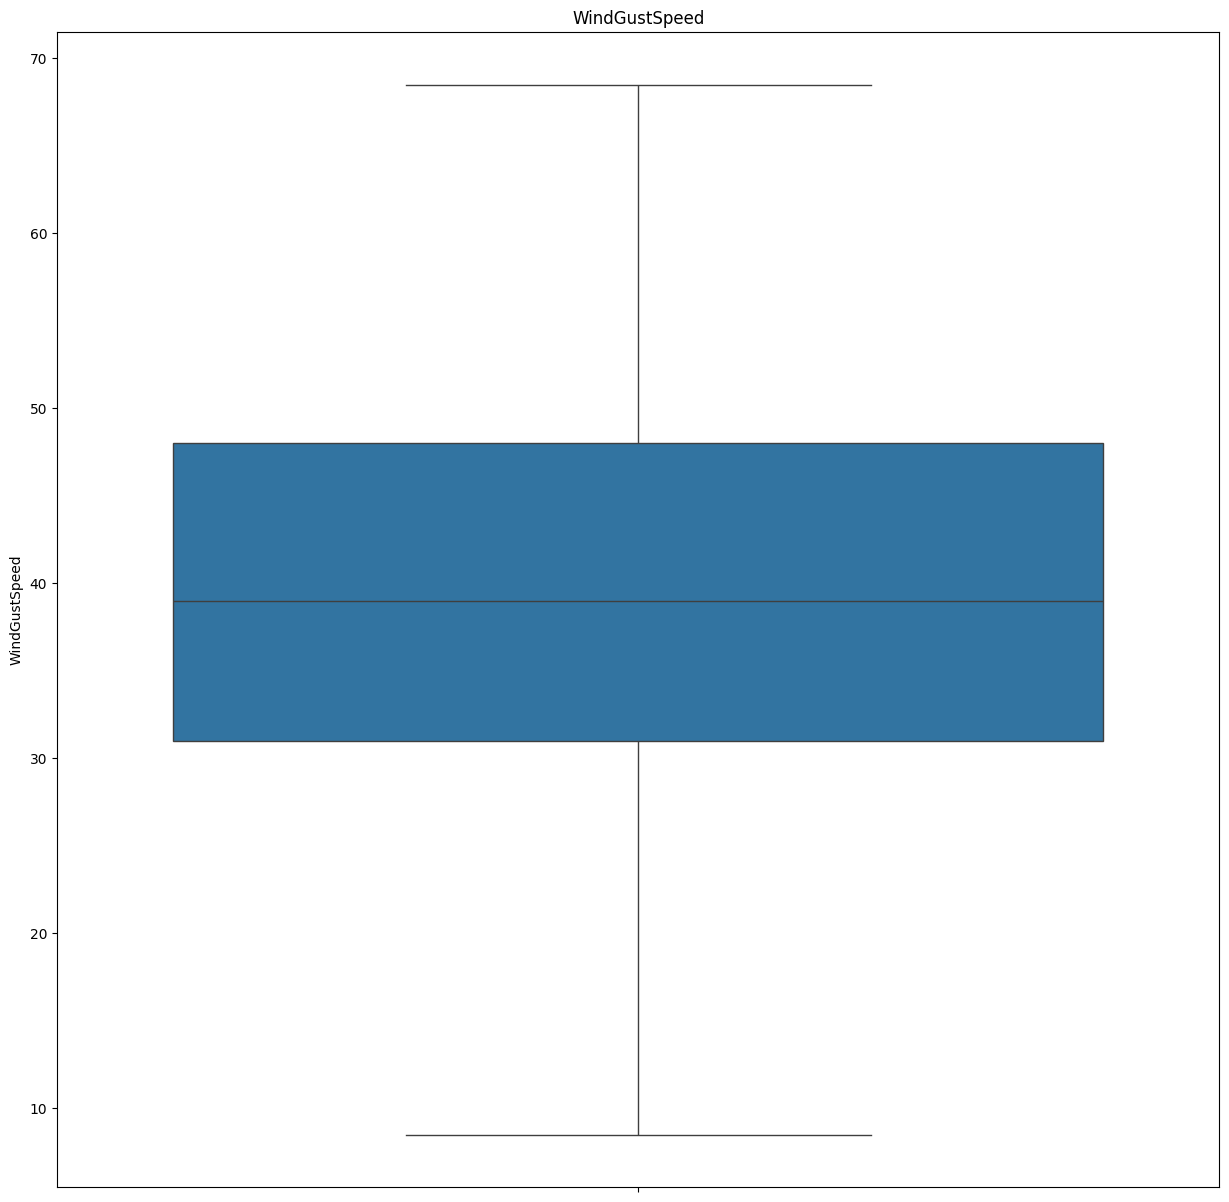

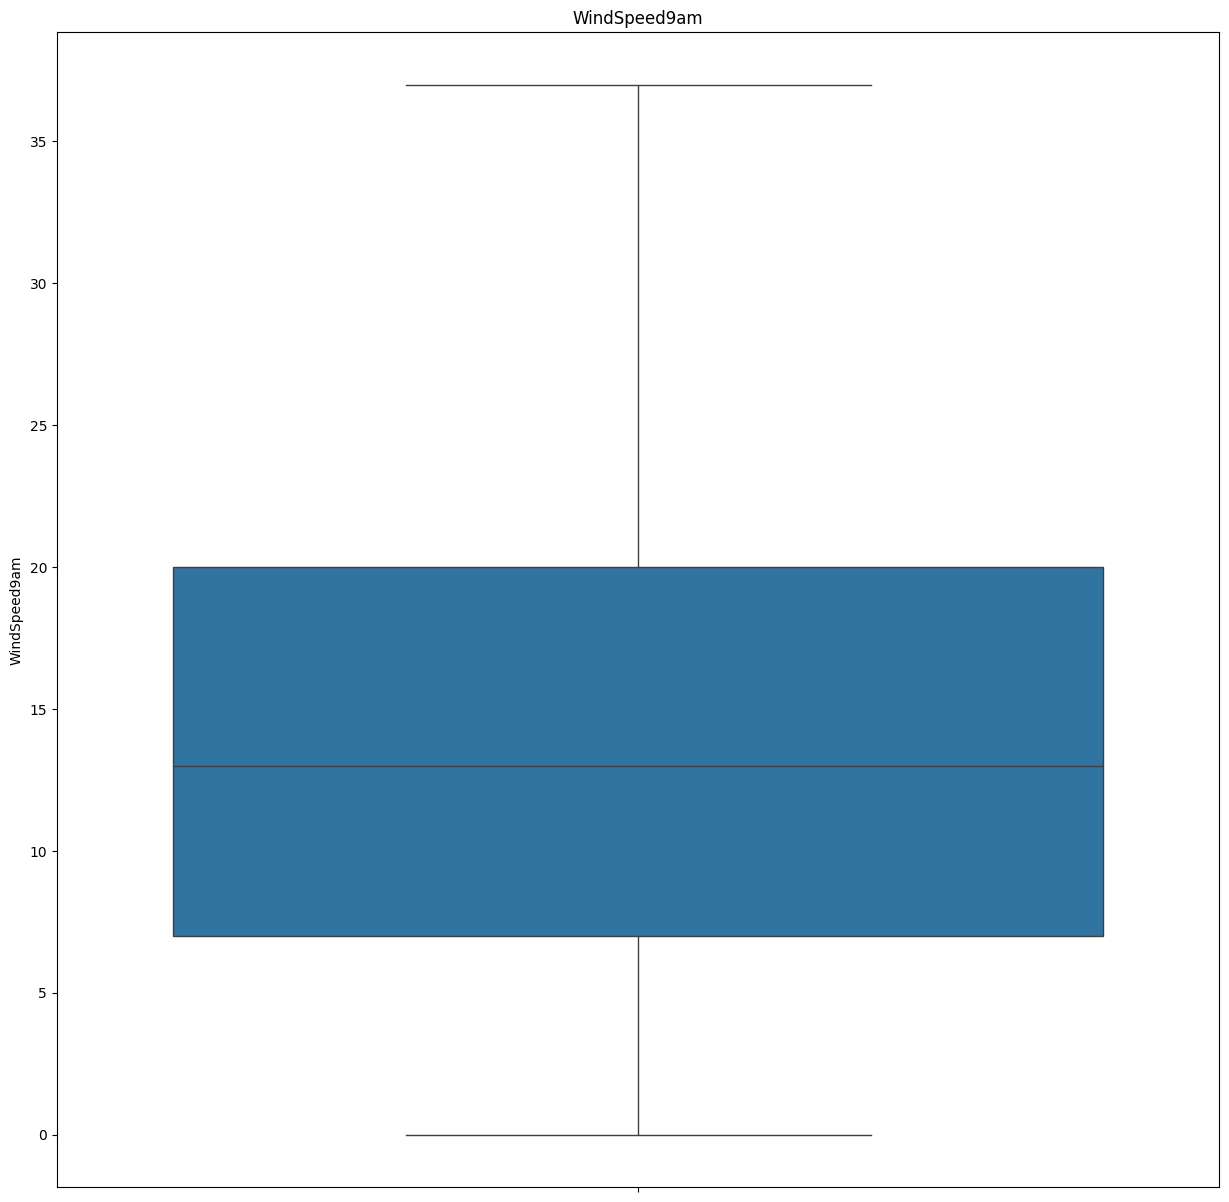

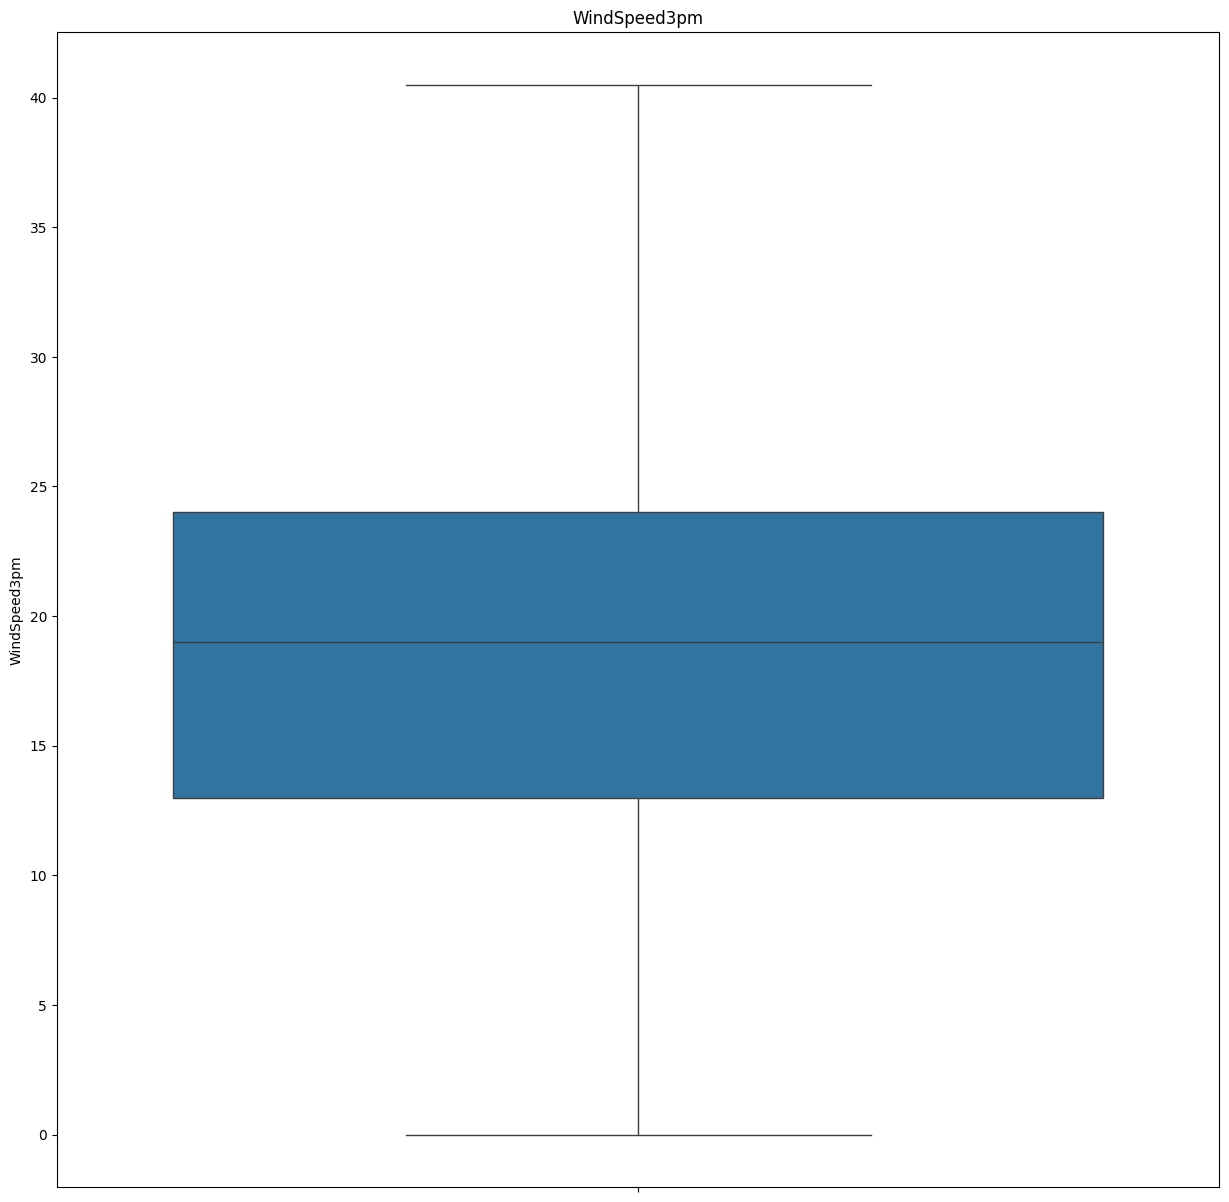

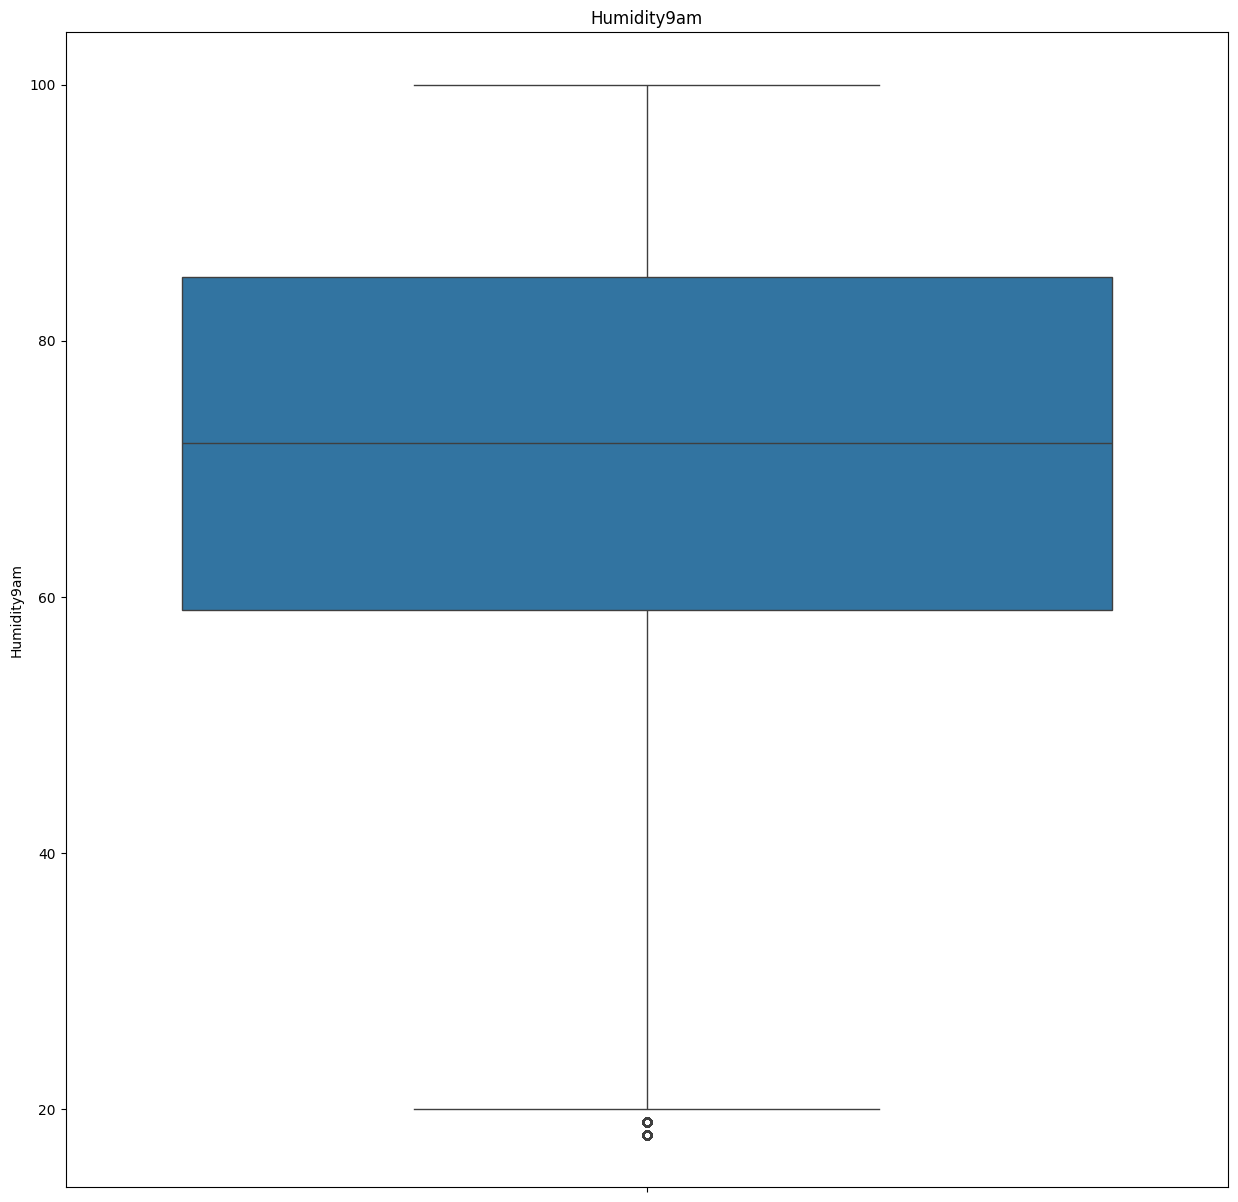

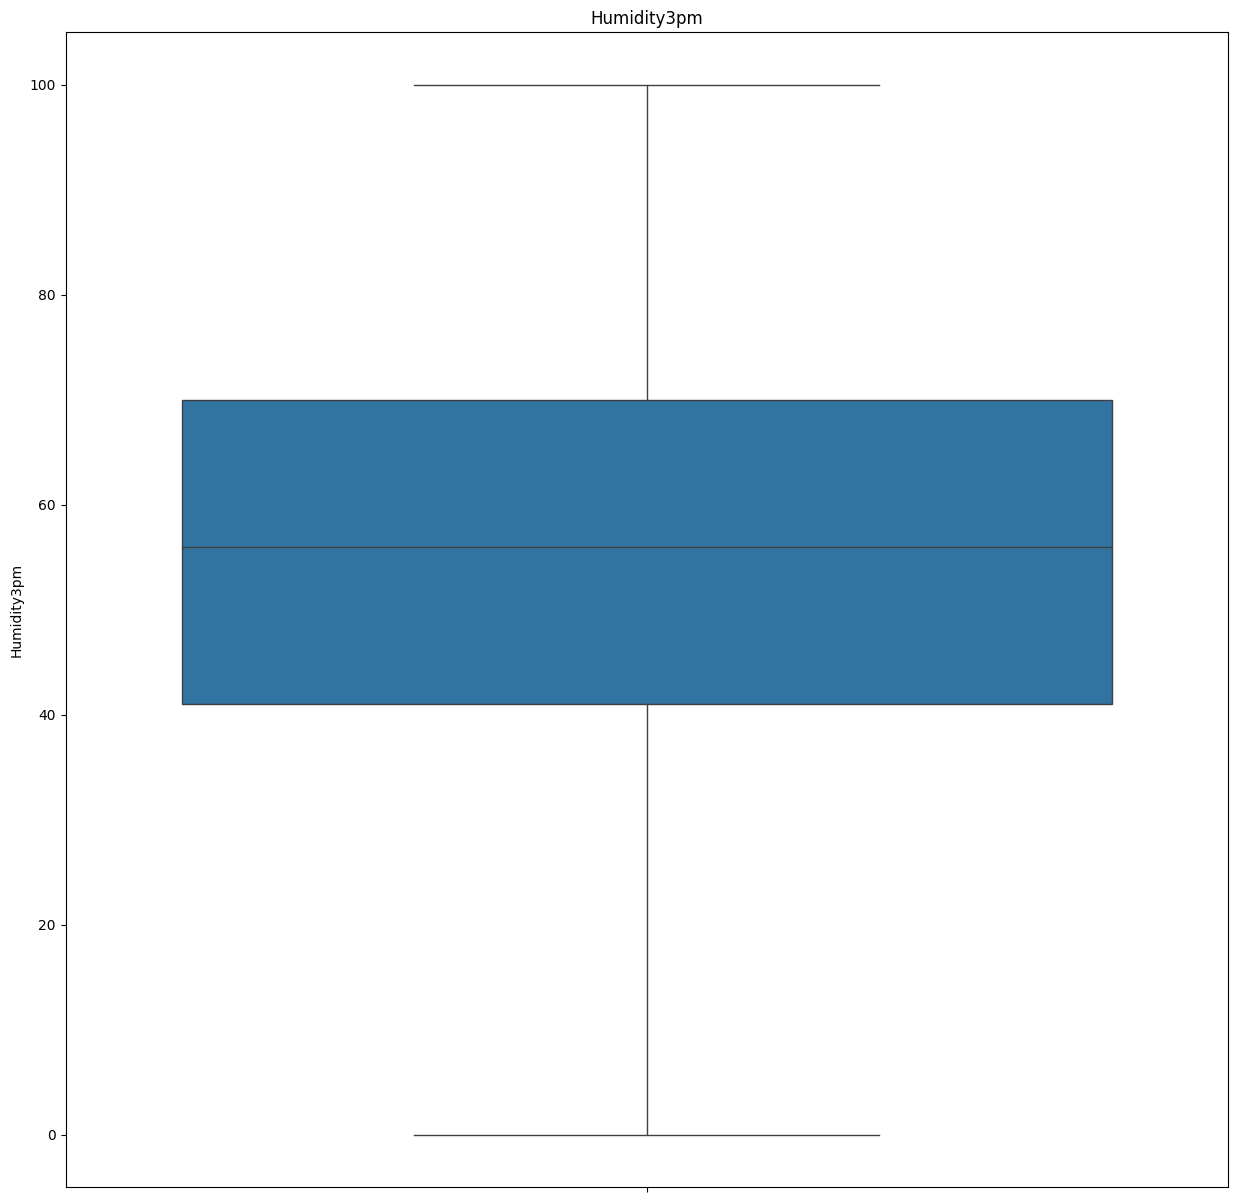

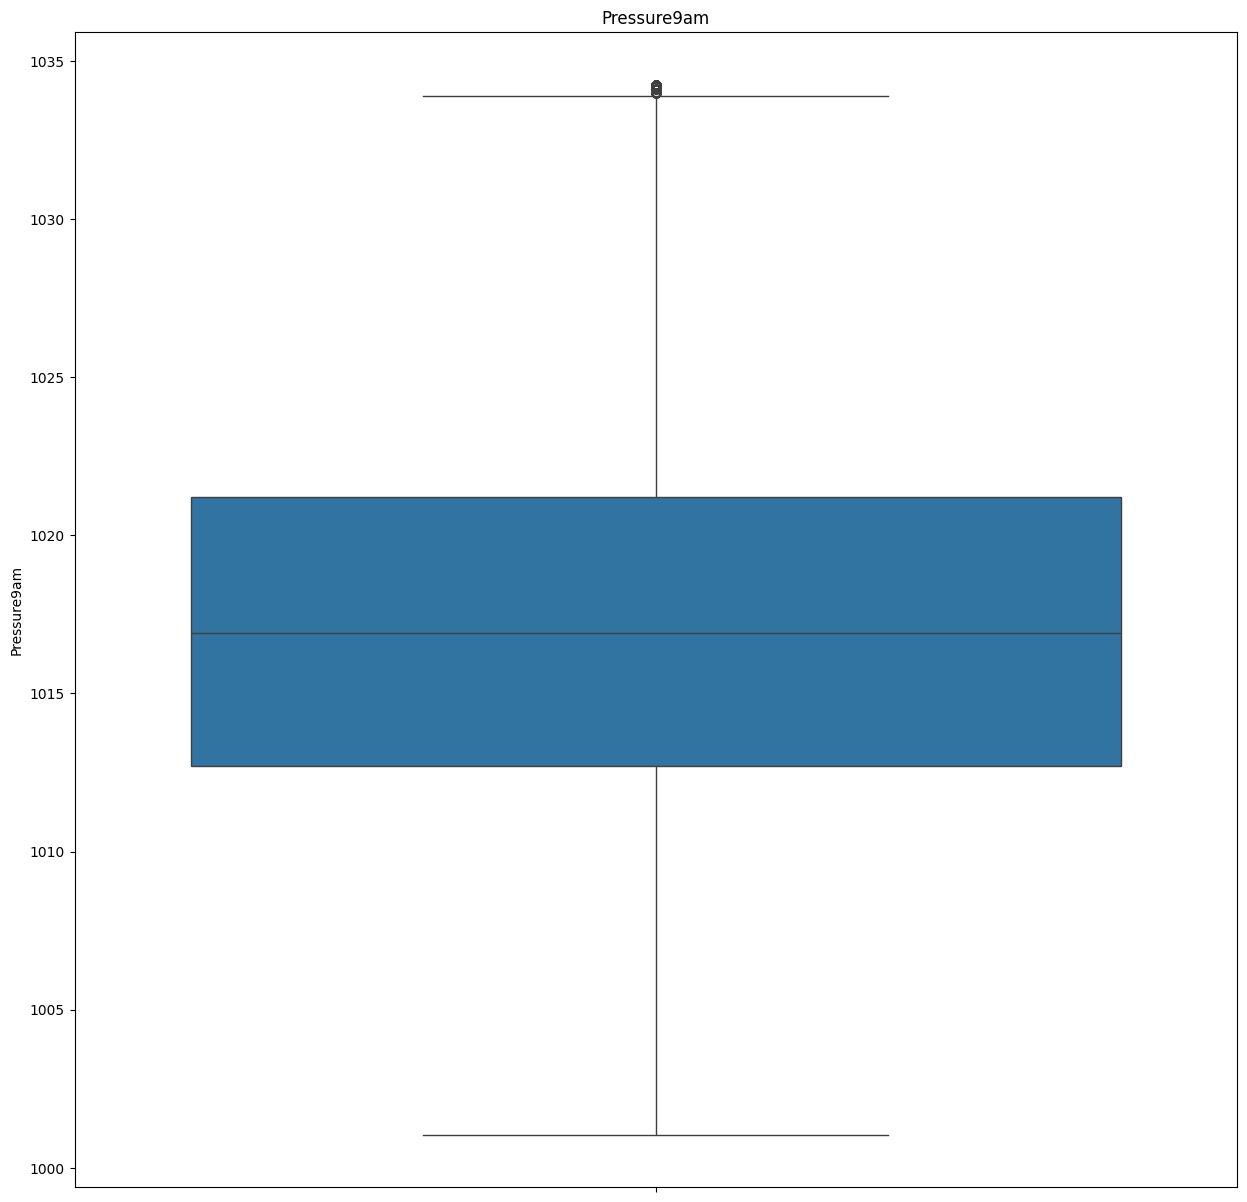

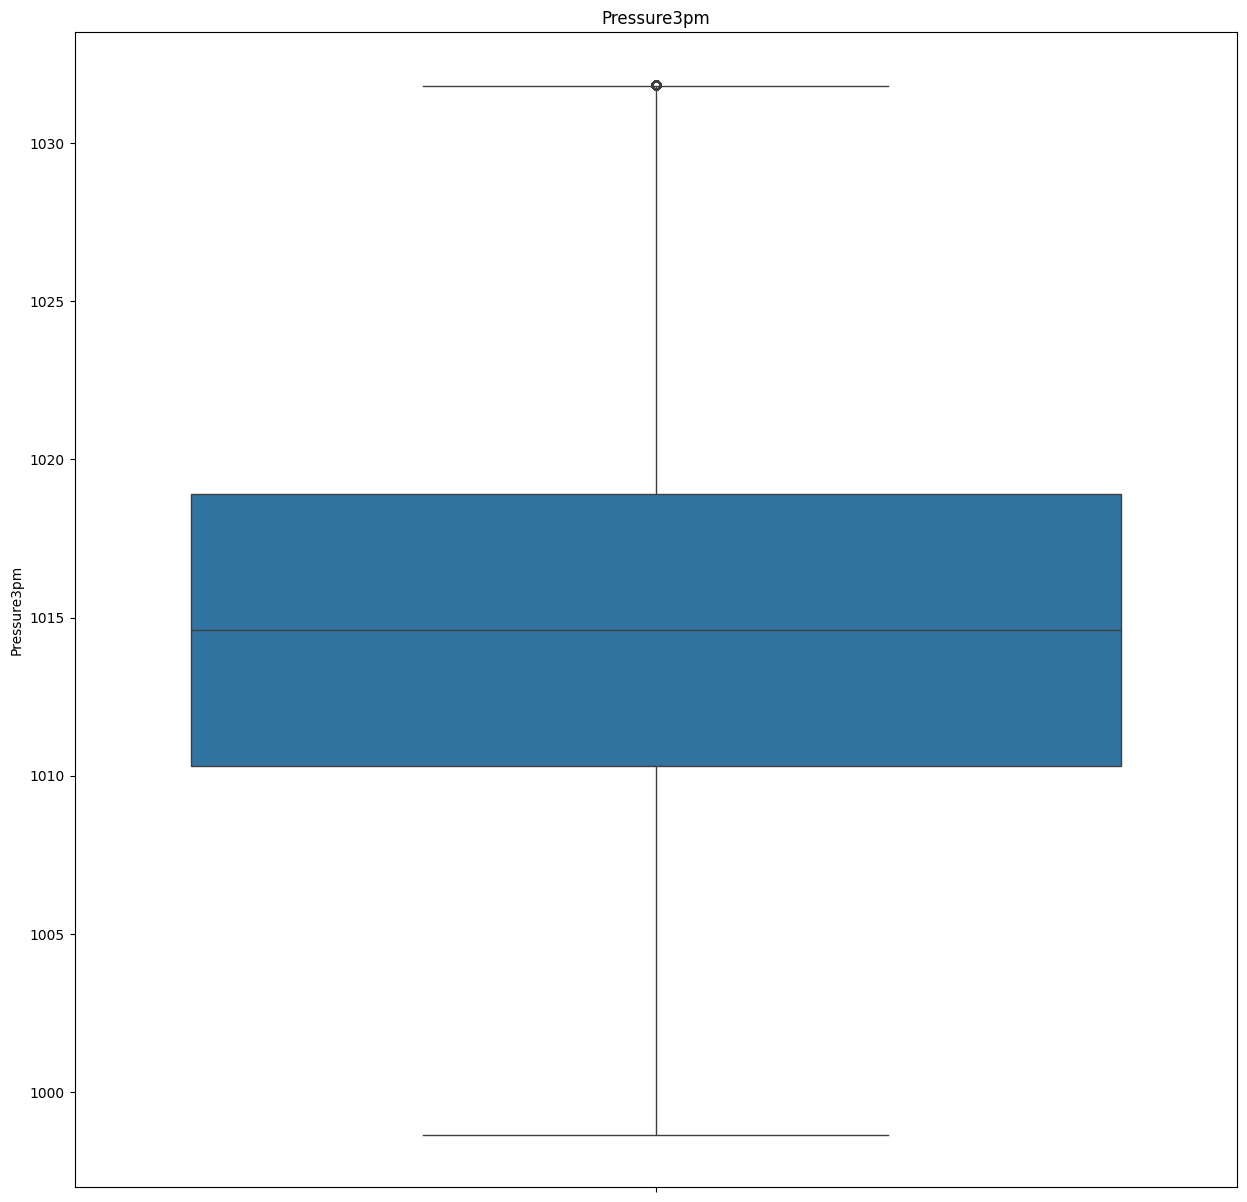

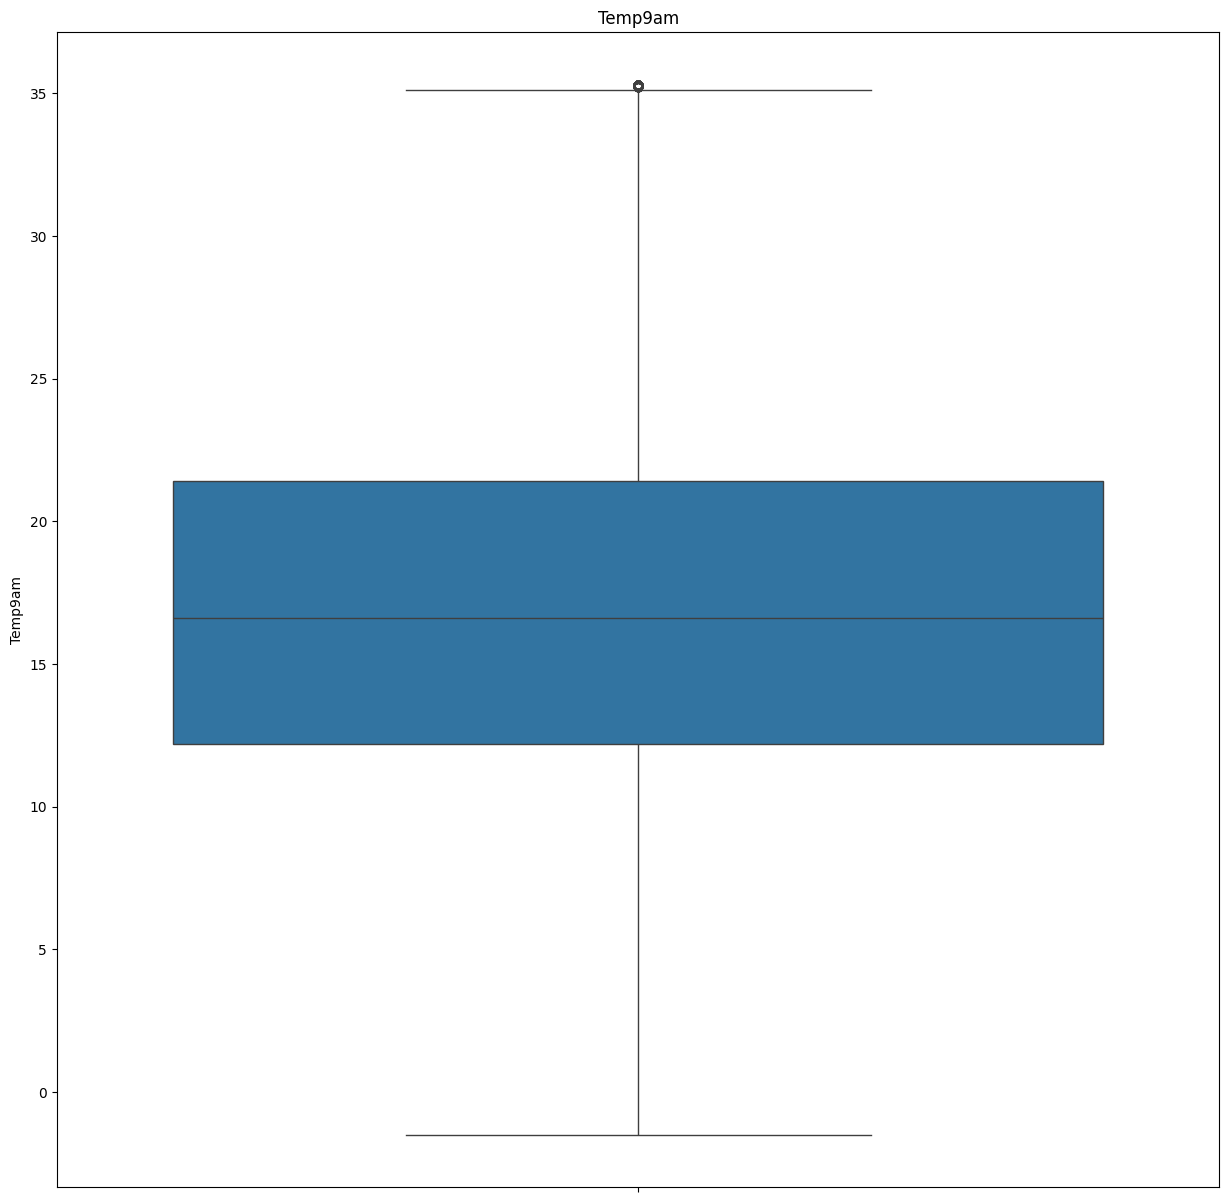

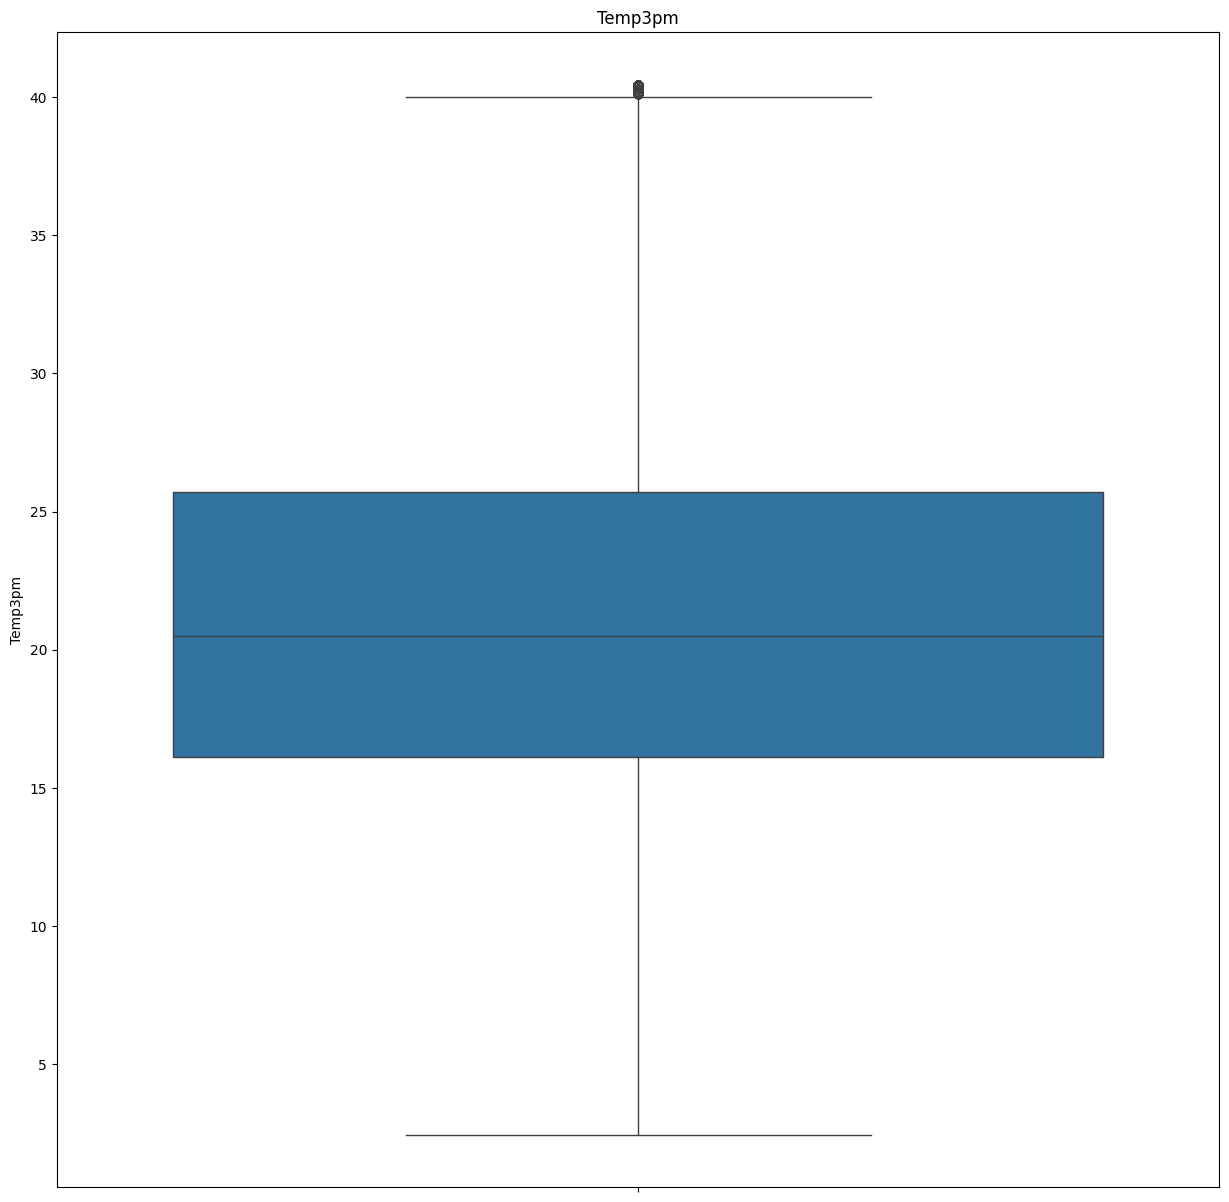

<Figure size 1500x1500 with 0 Axes>

In [125]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Seems like we've dealt with all the outliers ###
<hr>

## Data Visualization
This section we will visualize the cleaned data, all the graphs are plotted according to the base paper.

#### An overall description of the Data ####

In [126]:
df.describe().transpose()

count         mean        std      min     25%     50%  \
Location       183860.0    23.421821  13.713989     1.00    11.0    23.0   
MinTemp        183860.0    12.404575   6.379734    -5.95     7.8    12.2   
MaxTemp        183860.0    22.744768   7.091640     2.70    17.5    22.1   
Rainfall       183860.0     0.468936   0.650649     0.00     0.0     0.0   
Evaporation    183860.0     5.123140   3.361201     0.00     2.4     4.4   
Sunshine       183860.0     6.912992   3.917739     0.00     3.7     7.5   
WindGustDir    183860.0     7.150060   4.469309     0.00     4.0     7.0   
WindGustSpeed  183860.0    40.696573  12.643733     8.50    31.0    39.0   
WindDir9am     183860.0     6.781606   4.814275     0.00     2.0     7.0   
WindDir3pm     183860.0     7.443713   4.508028     0.00     4.0     8.0   
WindSpeed9am   183860.0    14.202845   8.686089     0.00     7.0    13.0   
WindSpeed3pm   183860.0    18.849317   8.649333     0.00    13.0    19.0   
Humidity9am    183860.0    70.963722  18.554359    18.00    59.0    72.0   
Humidity3pm    183860.0    55.404797  21.358711     0.00    41.0    56.0   
Pressure9am    183860.0  1016.962937   6.713141  1001.05  1012.7  1016.9   
Pressure3pm    183860.0  1014.629317   6.677601   998.65  1010.3  1014.6   
Cloud9am       183860.0     4.823338   2.831248     0.00     2.0     6.0   
Cloud3pm       183860.0     4.947253   2.676338     0.00     2.0     6.0   
Temp9am        183860.0    16.912154   6.436649    -1.49    12.2    16.6   
Temp3pm        183860.0    21.115550   6.843927     2.45    16.1    20.5   
Date_month     183860.0     6.408969   3.395684     1.00     3.0     6.0   

                  75%      max  
Location         35.0    49.00  
MinTemp          17.0    30.45  
MaxTemp          27.7    43.50  
Rainfall          1.5     1.50  
Evaporation       7.0    14.60  
Sunshine         10.2    14.50  
WindGustDir      11.0    15.00  
WindGustSpeed    48.0    68.50  
WindDir9am       11.0    15.00  
WindDir3pm       11.0    15.00  
WindSpeed9am     20.0    37.00  
WindSpeed3pm     24.0    40.50  
Humidity9am      85.0   100.00  
Humidity3pm      70.0   100.00  
Pressure9am    1021.2  1034.25  
Pressure3pm    1018.9  1031.85  
Cloud9am          7.0     9.00  
Cloud3pm          7.0     9.00  
Temp9am          21.4    35.30  
Temp3pm          25.7    40.45  
Date_month        9.0    12.00

#### Probability and Histogram Plot ####
Histogram is used to display the frequency or count of values within different bins or intervals.<br>
probability plot compares the quantiles of the observed data with the quantiles of a theoretical distribution.

In [127]:
import scipy.stats as stats

MinTemp


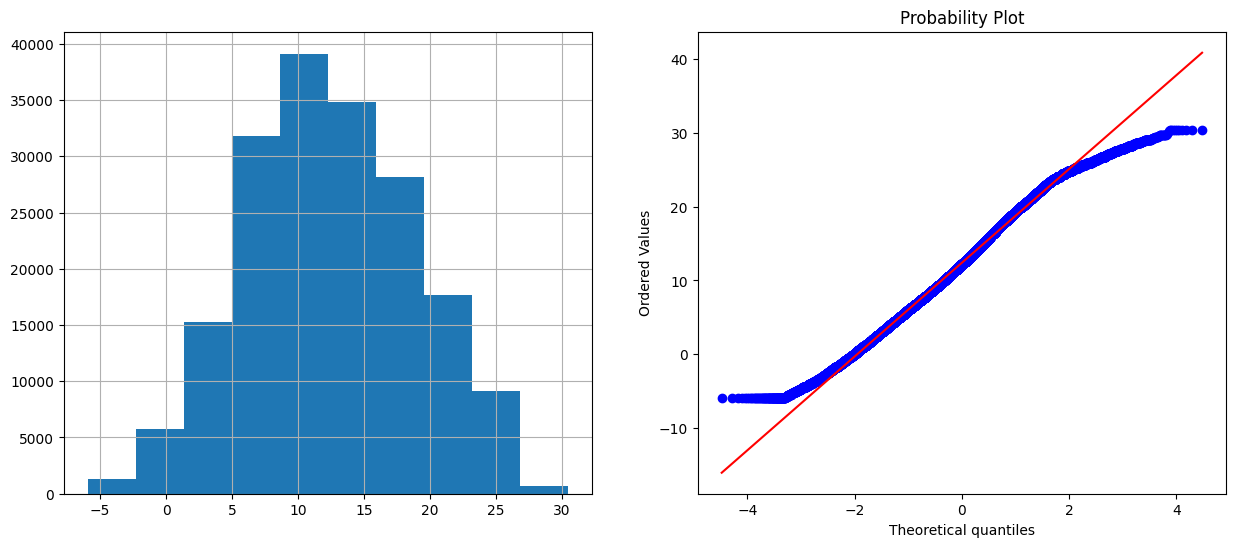

MaxTemp


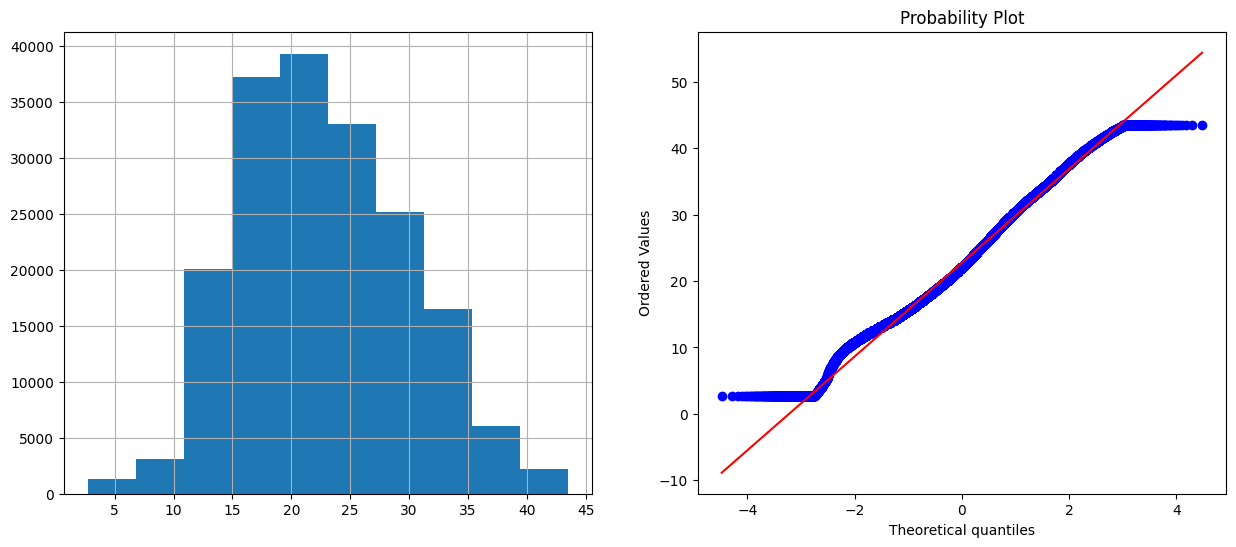

Rainfall


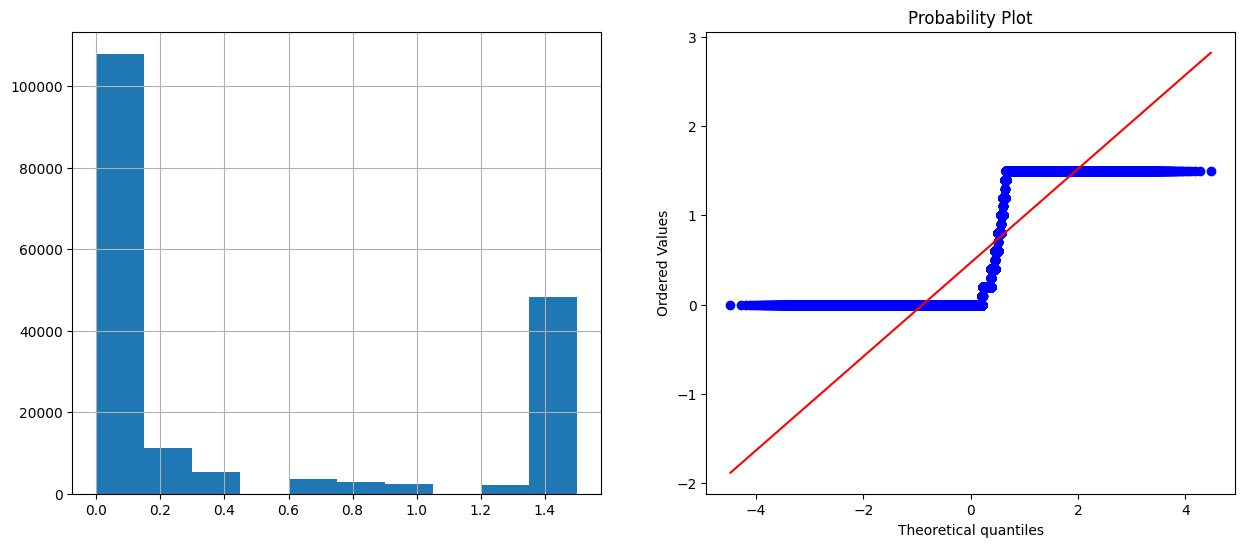

Evaporation


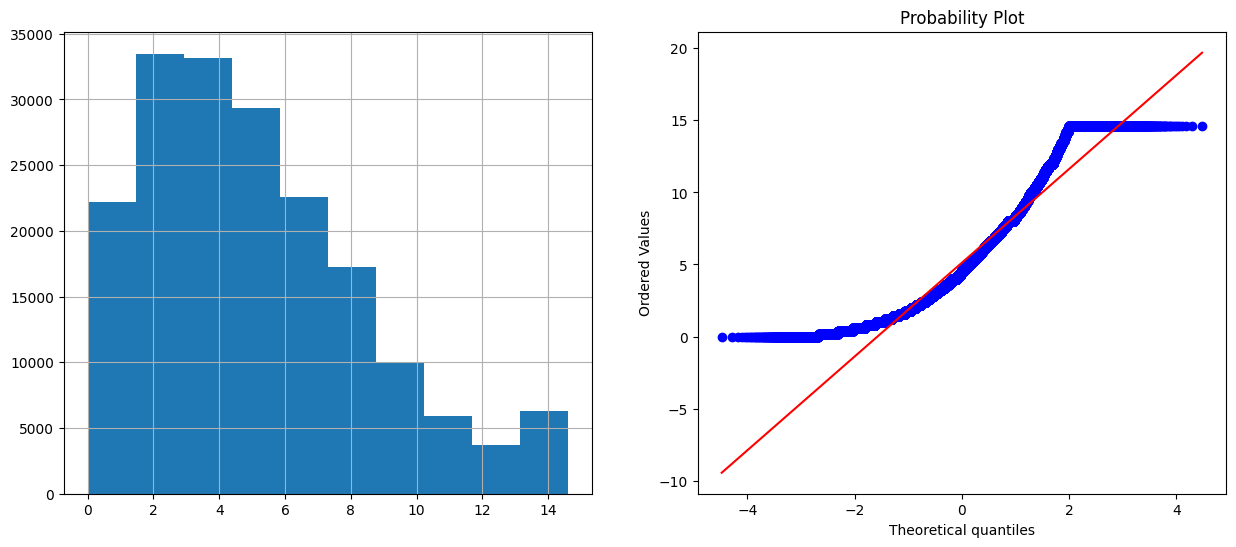

Sunshine


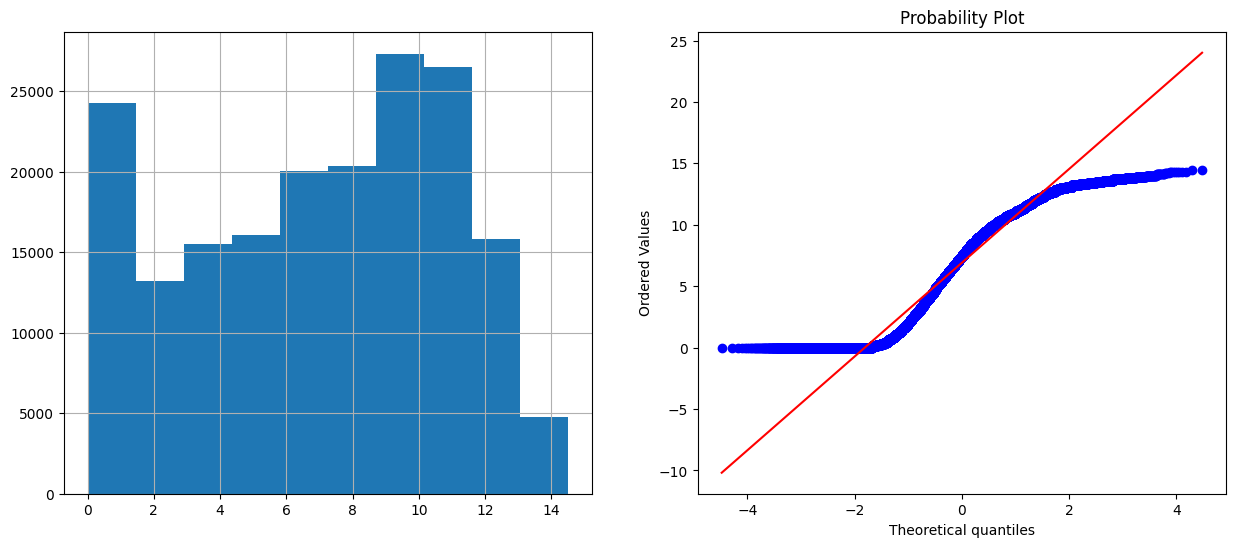

WindGustSpeed


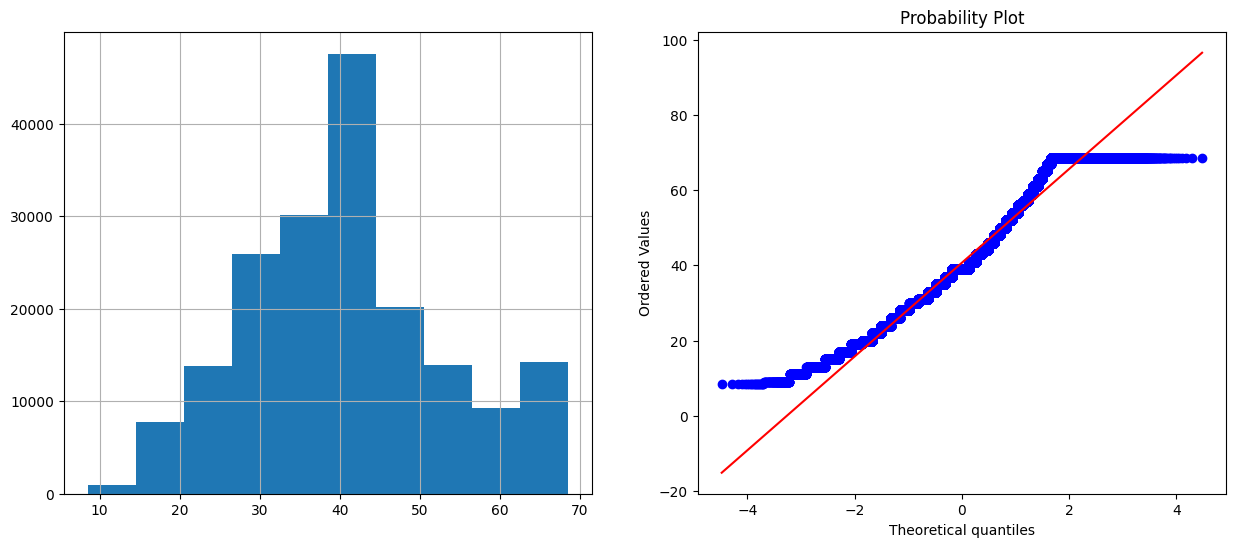

WindSpeed9am


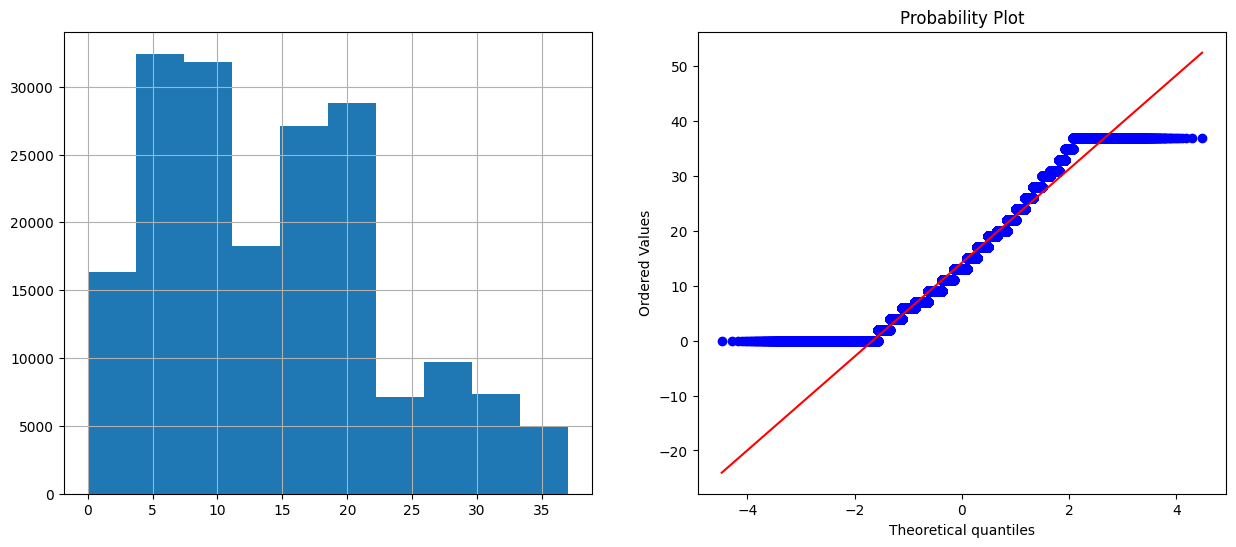

WindSpeed3pm


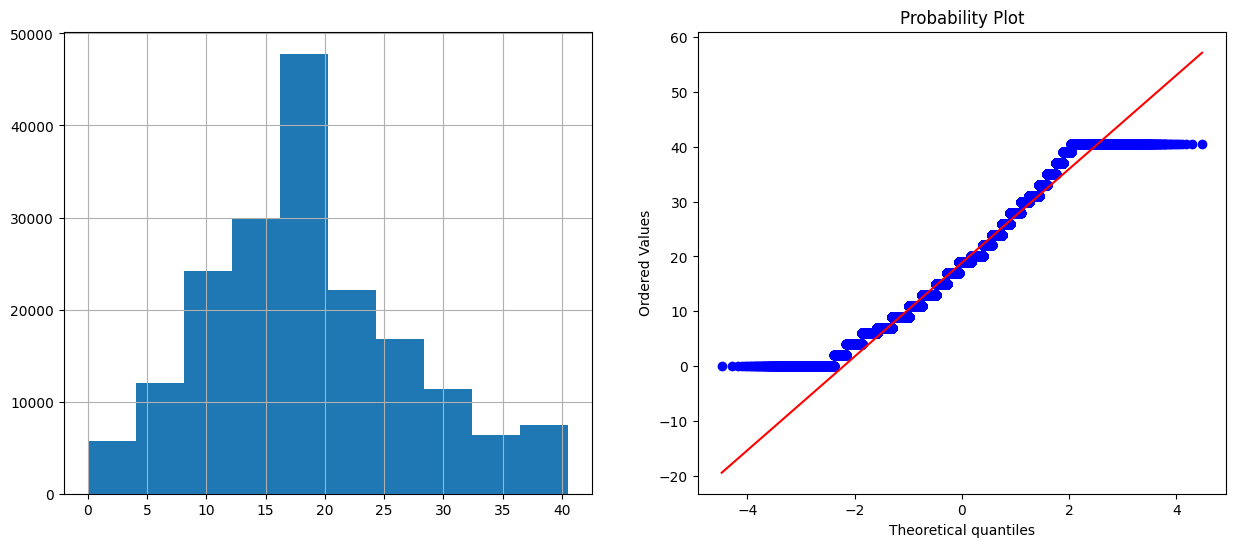

Humidity9am


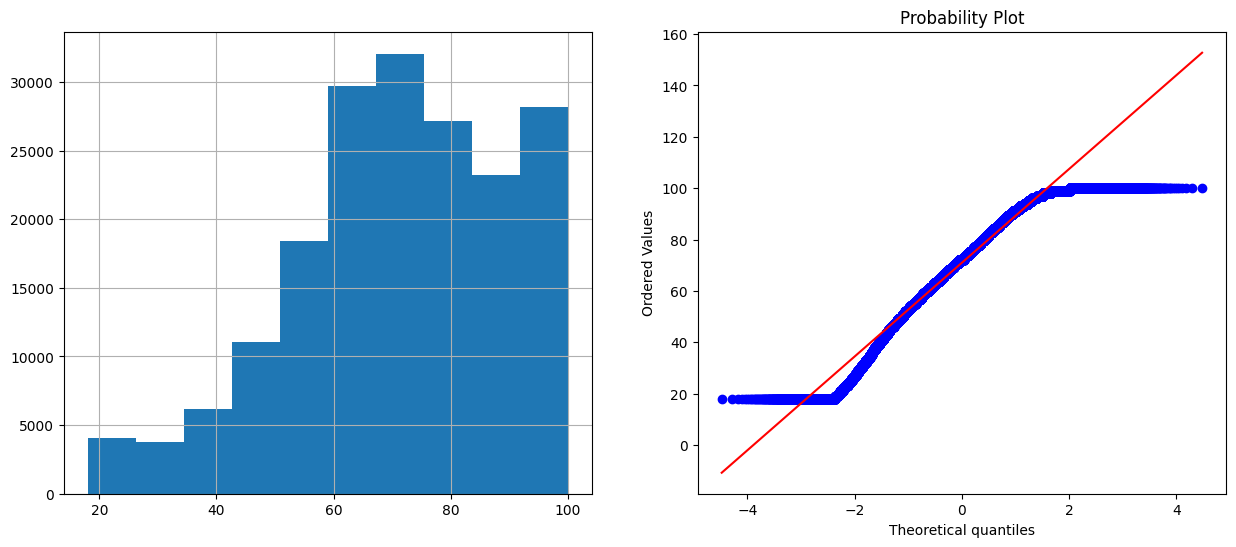

Humidity3pm


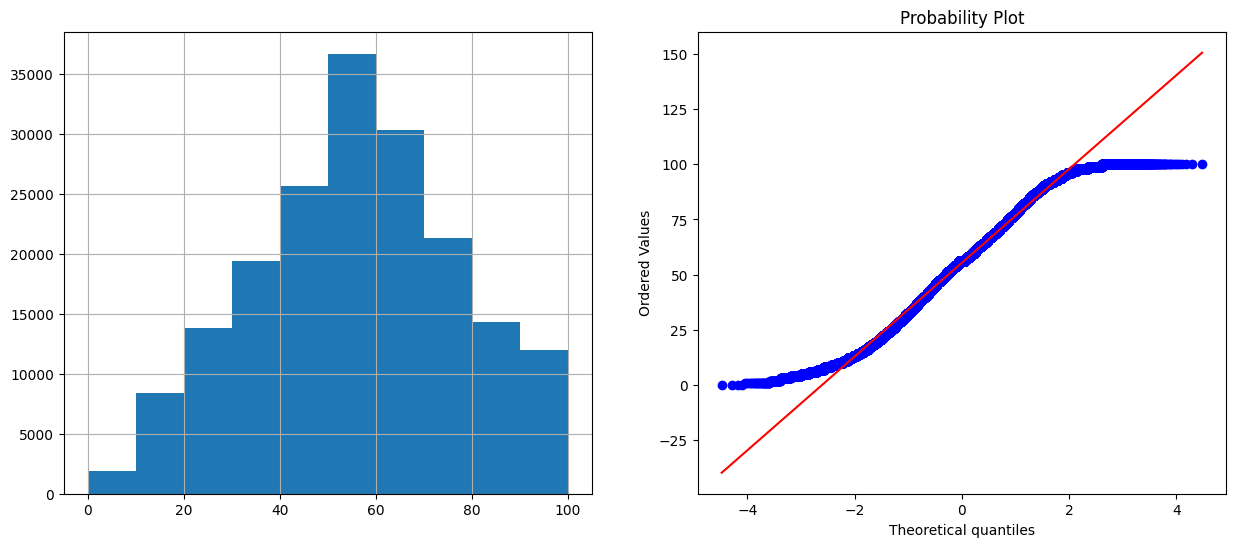

Pressure9am


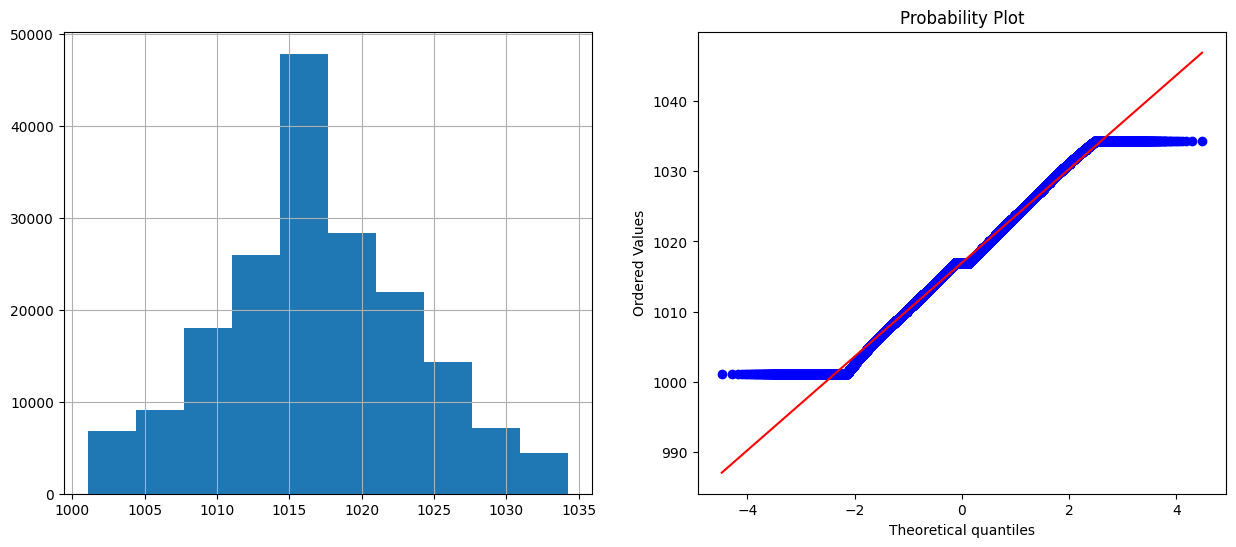

Pressure3pm


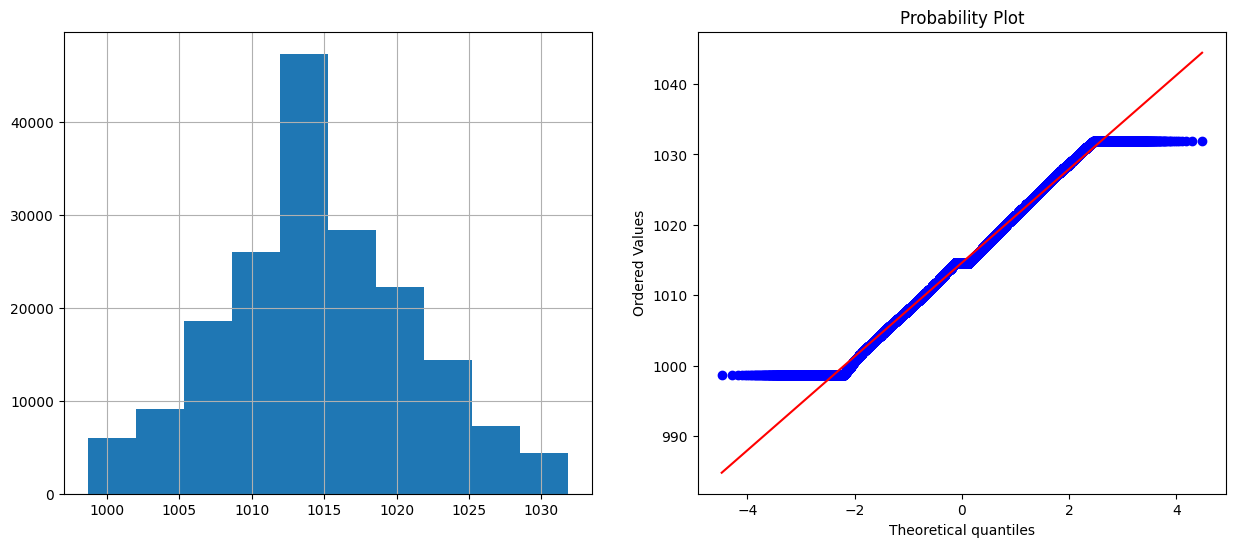

Temp9am


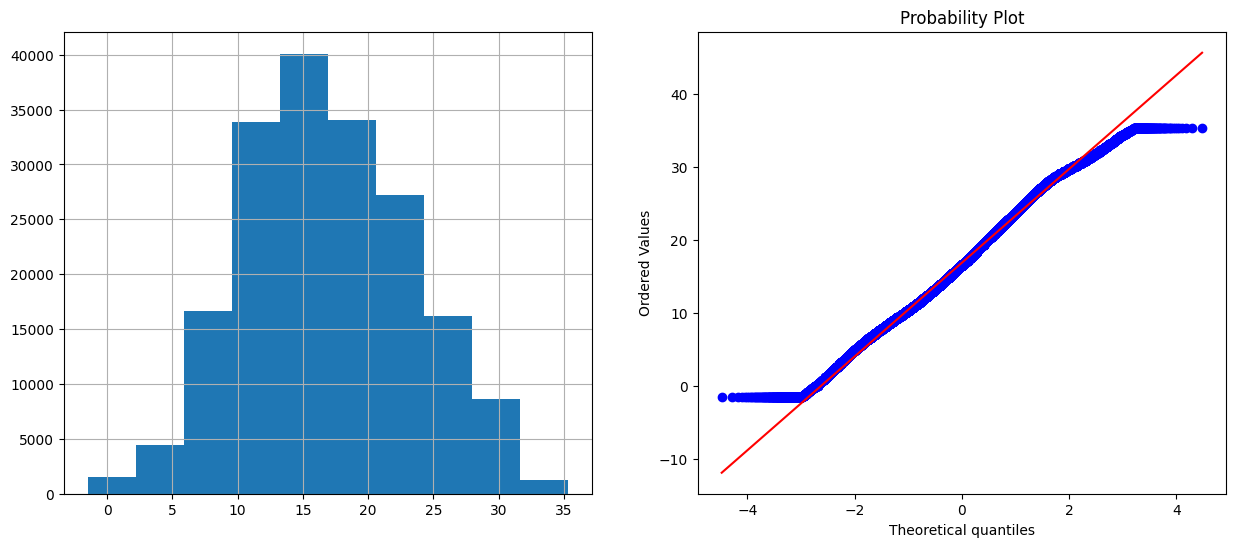

Temp3pm


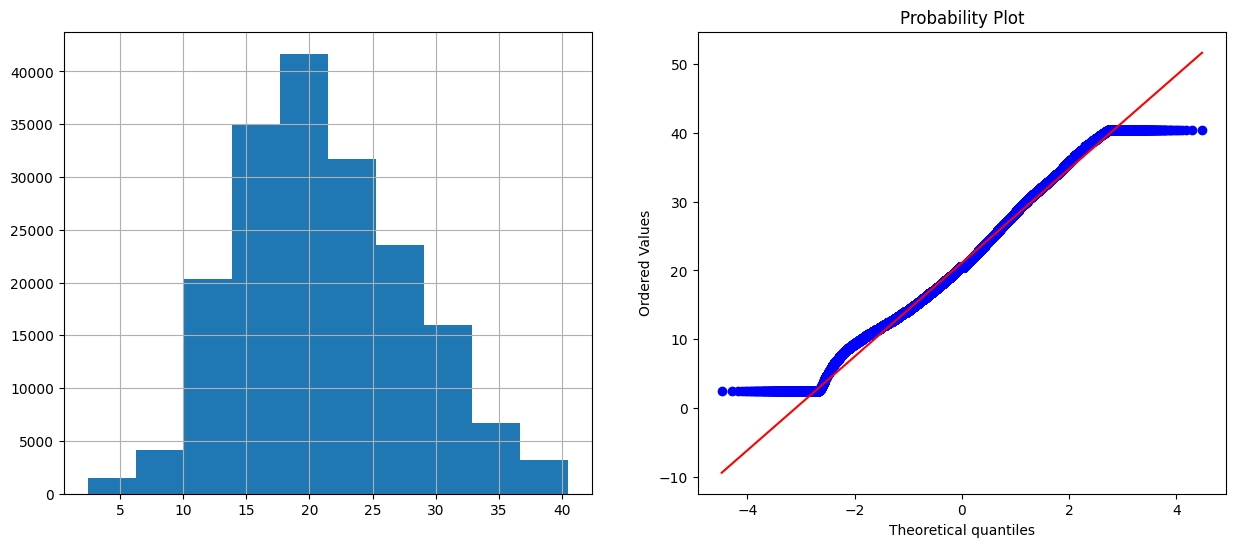

In [128]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#### Pie Chart ####

In [129]:
a = df['RainToday'].value_counts()
b = df['RainTomorrow'].value_counts()

(-1.0999982469814, 1.0999992522654634, -1.0999956054682827, 1.0999997907365848)

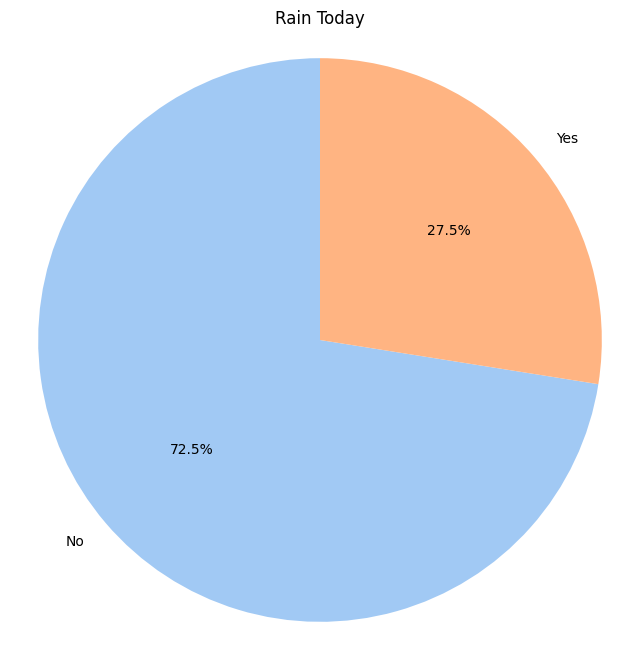

In [130]:
labels = ['No', 'Yes']
sizes = [a[False], a[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Today')
plt.axis('equal')


(-1.0999986288260537,
 1.0999919702240004,
 -1.0999990089472789,
 1.0999999528070132)

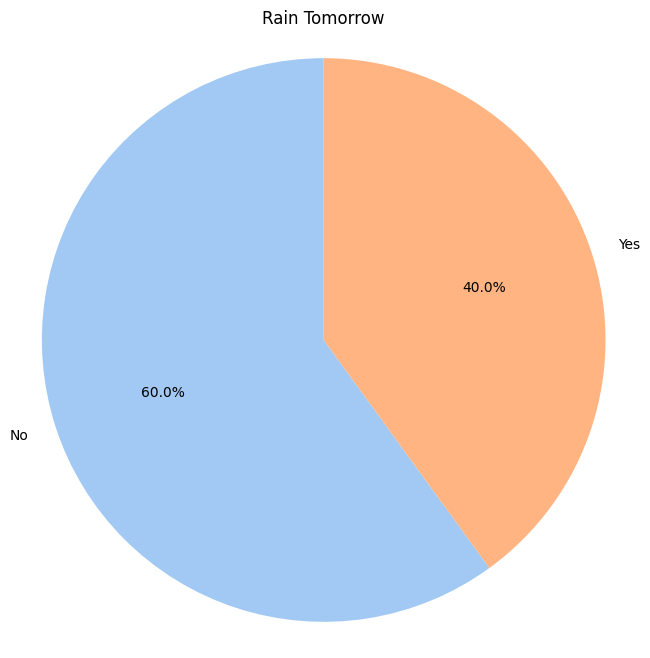

In [131]:
labels = ['No', 'Yes']
sizes = [b[False], b[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Tomorrow')
plt.axis('equal')


#### Bar Graph showing the count of Rain tomorrow

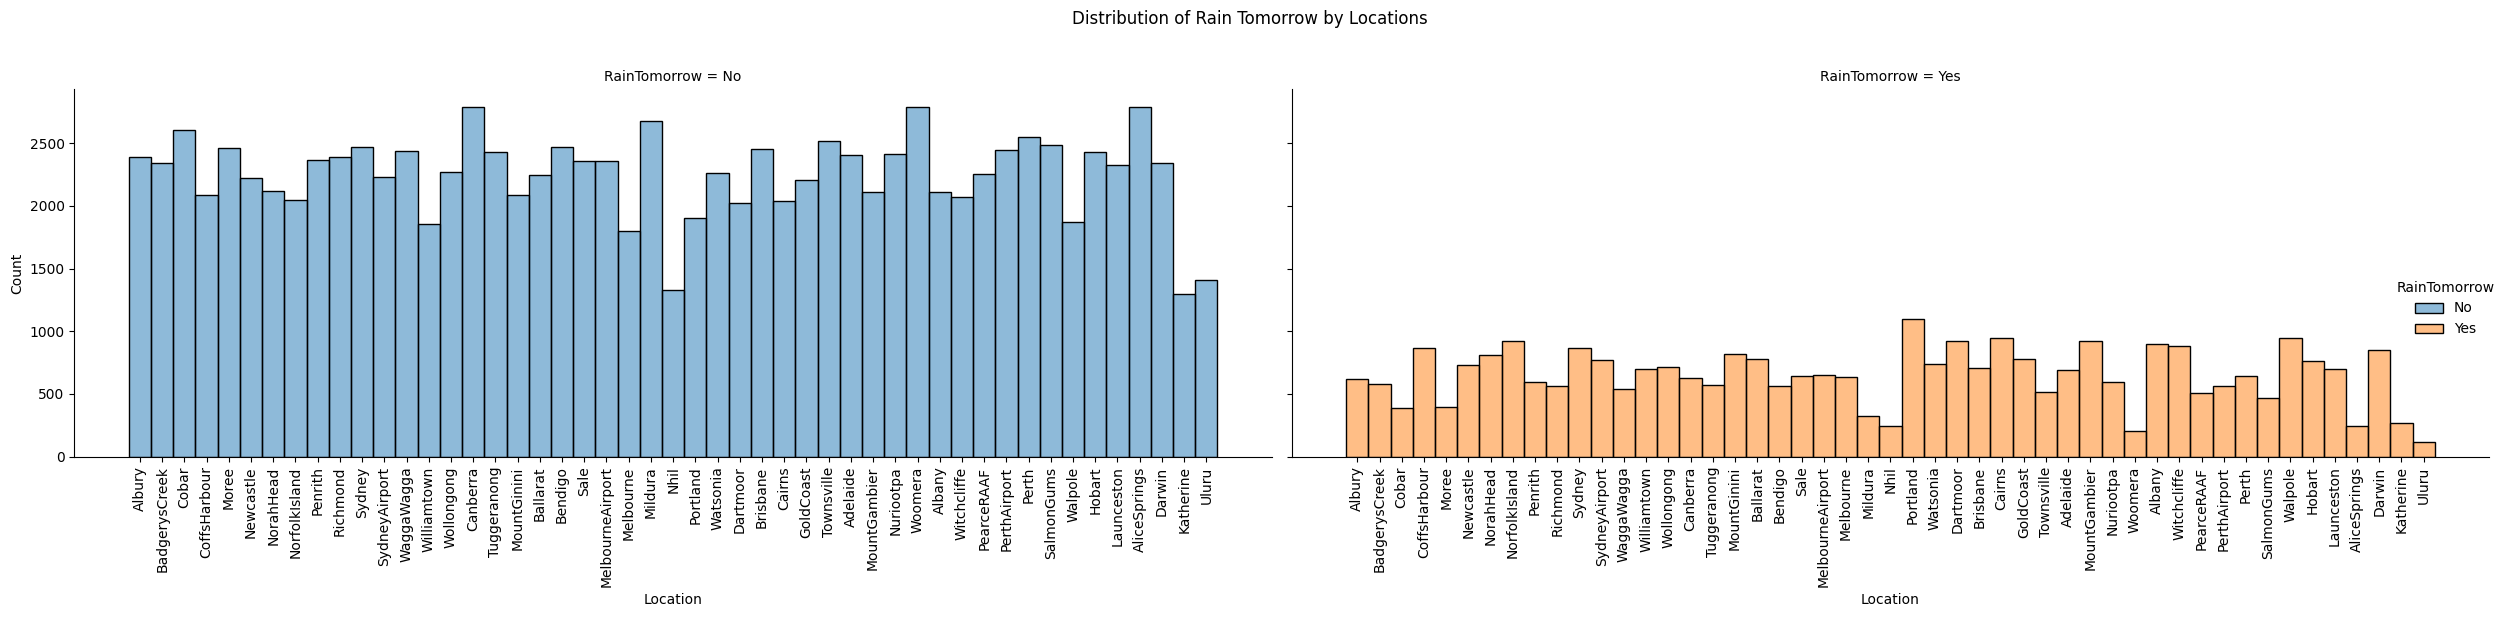

In [132]:
g = sns.displot(data=original_df, x='Location', hue='RainTomorrow', col='RainTomorrow', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Rain Tomorrow by Locations', y=1.02)
plt.tight_layout()

####  Pair plot the training dataset to determine the optimal collection of features for explaining a connection between two variables or for forming the most distinct clusters.

In [133]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        30     13.4     22.9       0.6          8.0      10.7          4.0   
1        30      7.4     25.1       0.0          5.6       7.5          2.0   
2        30     12.9     25.7       0.0          5.6      11.0          5.0   
3        30      9.2     28.0       0.0          1.2       8.2         11.0   
4        30     17.5     32.3       1.0          8.0       4.8          4.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0         5.0         3.0          20.0          24.0   
1           44.0         0.0         6.0           4.0          22.0   
2           46.0         5.0         6.0          19.0          26.0   
3           24.0        13.0        14.0          11.0           9.0   
4           41.0        12.0         0.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       7.0   
1         44.0         25.0       1010.6       1007.8       2.0       3.0   
2         38.0         30.0       1007.6       1008.7       8.0       2.0   
3         45.0         16.0       1017.6       1012.8       7.0       7.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Date_month  
0     16.9     21.8      False         False          12  
1     17.2     24.3      False         False          12  
2     21.0     23.2      False         False          12  
3     18.1     26.5      False         False          12  
4     17.8     29.7      False         False          12

In [134]:
df.to_csv("balancedData.csv", index=False)

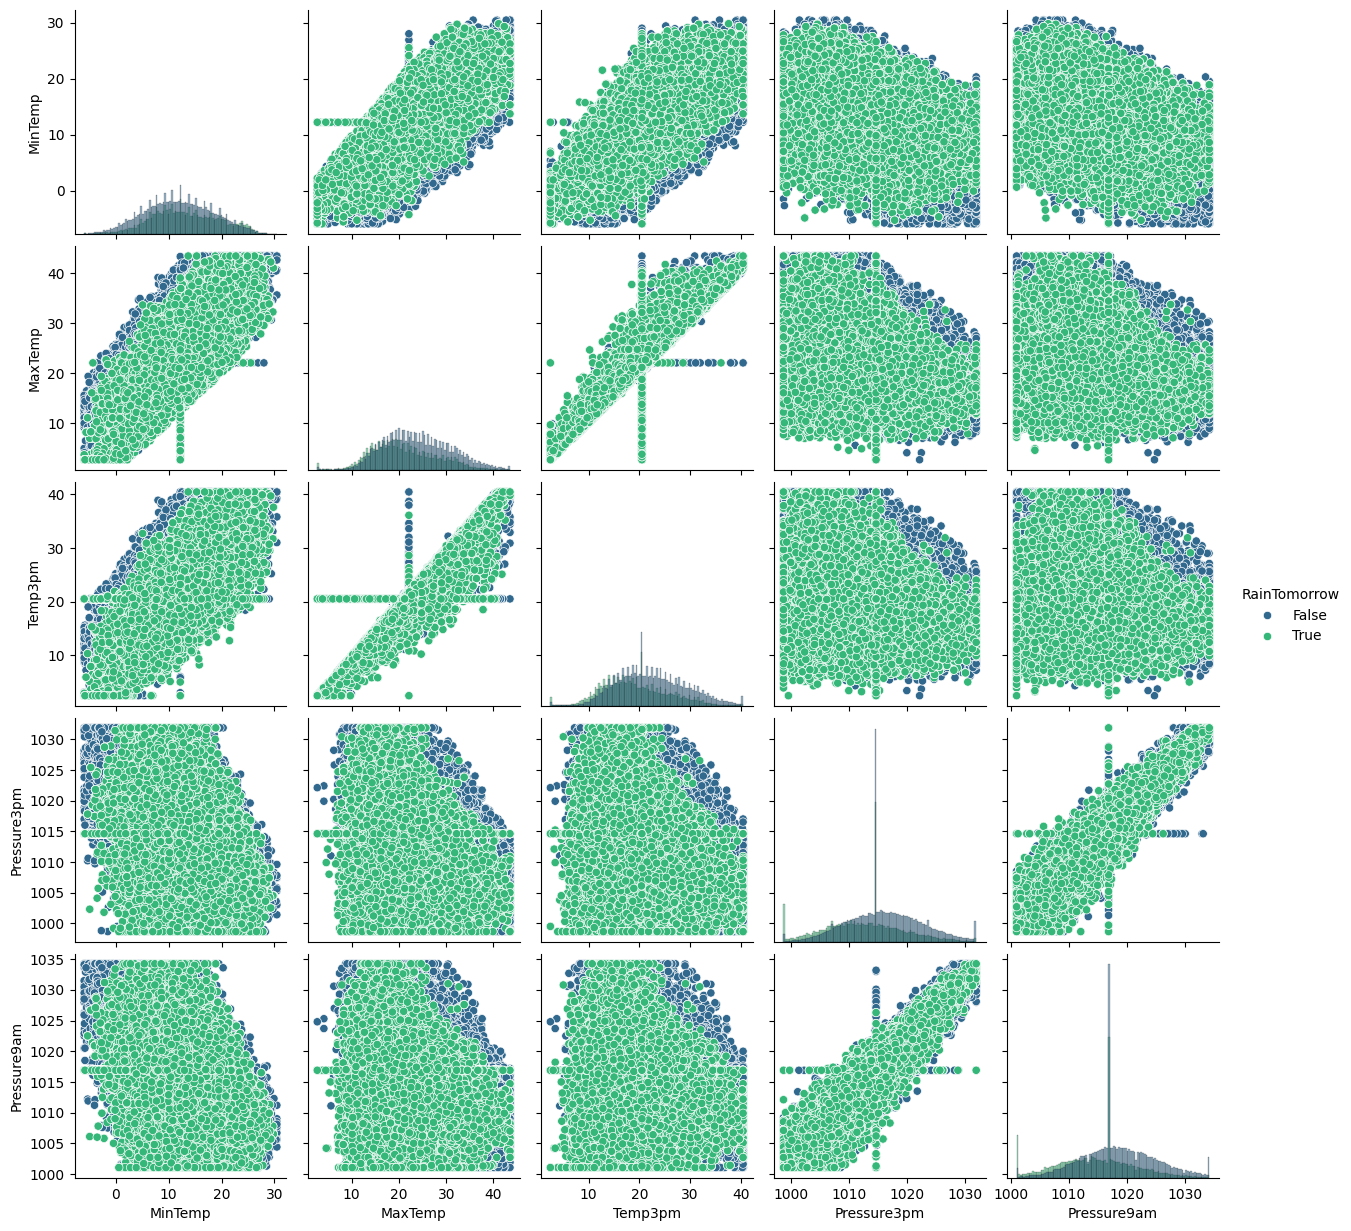

In [135]:
sns.pairplot(data=df[['MinTemp', 'MaxTemp', 'Temp3pm', 'Pressure3pm', 'Pressure9am', 'RainTomorrow']], hue='RainTomorrow',palette='viridis',diag_kind='hist')
# df.columns

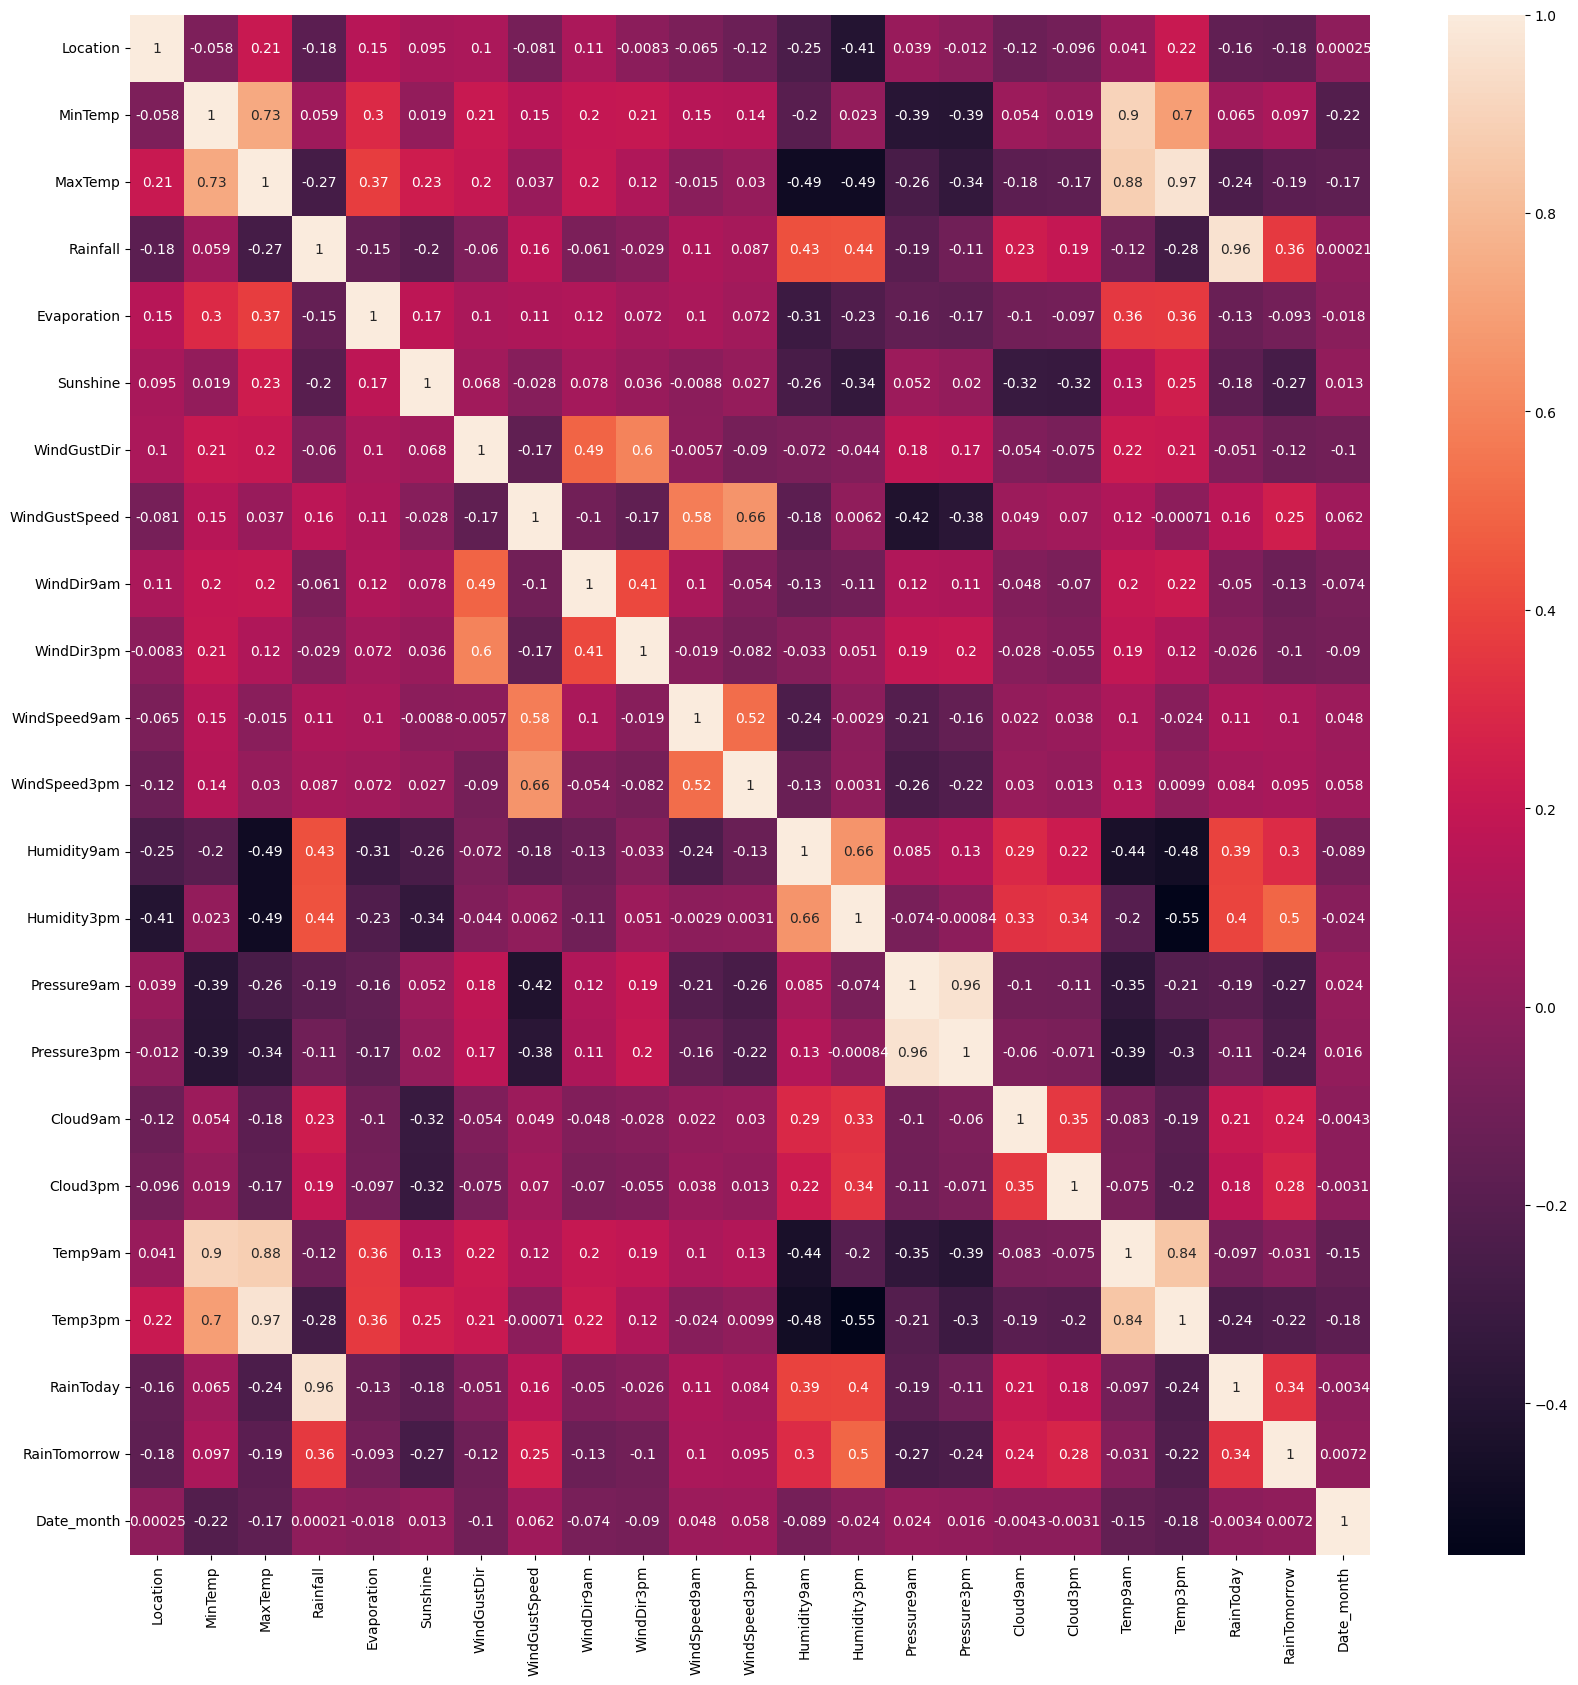

In [136]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)